# Download All Trump Campaing Speeches
In this notebook, I use the captions of the youtube videos of Donald Trump's campaign speeches to create a dataset of his speeches. The dataset contains the text of the speeches, the date they were given, and the location. The dataset is saved as a CSV file.


--------------------------------------------------------------------------------------------------------------------------------
Main data is called Master_DF and contains the urls, title, date, and the close caption text. 

--------------------------------------------------------------------------------------------------------------------------------
 

## Get the Youtube Video IDs
The first step is to go from the url for the playlist, to the url of all of his speeches. I will use selenium for this. 

Starting URL is: https://www.youtube.com/playlist?list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ

In [37]:
#set up scraper with selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException, WebDriverException


from random import randint
import pandas as pd
from fake_useragent import UserAgent
import time
from tqdm import tqdm  # Import tqdm for the progress bar

# Initialize tqdm for pandas
tqdm.pandas()

profile = webdriver.FirefoxProfile()
options = Options()         
#options.headless = True #comment out if you want to see the browser
ua = UserAgent()
#options.add_argument("--headless")
options.add_argument('--disable-infobars')
options.add_argument('--disable-extensions')
options.add_argument('--profile-directory=Default')
options.add_argument('--incognito')
options.add_argument('--disable-plugins-discovery')
options.add_argument('--start-maximized')
userAgent = ua.random
options.add_argument(f'user-agent={userAgent}')

In [38]:
def rnd_sleep(x,y):
	rndnr = randint(x,y)
	time.sleep(rndnr)

In [39]:
browser = webdriver.Firefox(options = options) 
wait = WebDriverWait(browser, 300) 

The geckodriver version (0.34.0) detected in PATH at /usr/local/bin/geckodriver might not be compatible with the detected firefox version (137.0.1); currently, geckodriver 0.36.0 is recommended for firefox 137.*, so it is advised to delete the driver in PATH and retry


In [40]:
url = 'https://www.youtube.com/playlist?list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ'

browser.get(url)

manually acccepted some terms and conditions here, and scrolled to the bottom of the page to load all the videos.

In [41]:
#get the video elements
#video = wait.until(lambda d: d.find_elements(By.XPATH, '//*[@id="video-title"]'))

videos = browser.find_elements(By.XPATH, '//div[@class=" style-scope ytd-playlist-video-list-renderer"]/ytd-playlist-video-renderer')
print(len(videos))

283


In [42]:
#get the video links, and titles
links = []
titles = []

for video in videos:
    link = video.find_element(By.XPATH, './/a[@id="video-title"]').get_attribute('href')
    title = video.find_element(By.XPATH, './/a[@id="video-title"]').get_attribute('title')
    links.append(link)
    titles.append(title)
    print(link)
    print(title)
    print('---')


https://www.youtube.com/watch?v=0npi0hevtKg&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=1&pp=iAQB
FULL SPEECH: Trump to Deliver Remarks at Iowa Caucus Rally in Clinton - 1/6/24
---
https://www.youtube.com/watch?v=DxTdbVGUz14&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=2&pp=iAQB
FULL SPEECH: Trump to Deliver Remarks at Iowa Caucus Rally in Newton - 1/6/24
---
https://www.youtube.com/watch?v=Cp76BvgKfZg&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=3&pp=iAQB
FULL SPEECH: Trump to speak at IA Commit to Caucus Rally in Mason City - 1/5/24
---
https://www.youtube.com/watch?v=dw3ZDAAy_Y0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=4&pp=iAQB
FULL SPEECH: Trump to speak at IA Commit to Caucus Rally in Sioux Center - 1/5/24
---
https://www.youtube.com/watch?v=hxX4Fnsrke0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=5&pp=iAQB
LIVE REPLAY: Trump Delivers Remarks at Caucus Rally in Indianola, Iowa - 1/14/24
---
https://www.youtube.com/watch?v=v1BBGNKvqBs&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFx

In [43]:
browser.quit()

In [44]:
#make a pandas df with the links and titles
df = pd.DataFrame({'link': links, 'title': titles})
df.head()

,link,title
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...


In [45]:
#add date (its the numbers after -)
def get_date(link):
    try:
        date = link.split('-')[-1]
        return date
    except:
        return None
df['date'] = df['title'].progress_apply(get_date)

df.head()

100%|██████████| 283/283 [00:00<00:00, 522212.07it/s]


,link,title,date
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24


In [46]:
#check if it has multiple people

df['multiple'] = df['title'].progress_apply(lambda x: 1 if ' and ' in x.lower() else 0)
df.head(n = 10)

100%|██████████| 283/283 [00:00<00:00, 379350.60it/s]


,link,title,date,multiple
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0
5,https://www.youtube.com/watch?v=v1BBGNKvqBs&li...,LIVE REPLAY: Team Trump Telerally Featuring Pr...,1/13/24,1
6,https://www.youtube.com/watch?v=ZKQh32j9Hxg&li...,FULL SPEECH: Team Trump Telerally Featuring Pr...,1/13/24,1
7,https://www.youtube.com/watch?v=cOxU33lMmO0&li...,FULL SPEECH: Trump Delivers Remarks at Caucus ...,1/14/24,0
8,https://www.youtube.com/watch?v=pYL3gjp9FC8&li...,FULL SPEECH: Election Night in Iowa LIVE with ...,1/15/24,0
9,https://www.youtube.com/watch?v=Jw7ixB_oxmo&li...,FULL SPEECH: Trump to Deliver Remarks in Atkin...,1/16/24,0


In [47]:
#get video id from link
from urllib.parse import urlparse, parse_qs

def extract_youtube_id(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    return query_params.get('v', [None])[0]  # Returns the video ID or None
df['video_id'] = df['link'].progress_apply(extract_youtube_id)
df.head(n = 10)

100%|██████████| 283/283 [00:00<00:00, 74611.10it/s]


,link,title,date,multiple,video_id
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0
5,https://www.youtube.com/watch?v=v1BBGNKvqBs&li...,LIVE REPLAY: Team Trump Telerally Featuring Pr...,1/13/24,1,v1BBGNKvqBs
6,https://www.youtube.com/watch?v=ZKQh32j9Hxg&li...,FULL SPEECH: Team Trump Telerally Featuring Pr...,1/13/24,1,ZKQh32j9Hxg
7,https://www.youtube.com/watch?v=cOxU33lMmO0&li...,FULL SPEECH: Trump Delivers Remarks at Caucus ...,1/14/24,0,cOxU33lMmO0
8,https://www.youtube.com/watch?v=pYL3gjp9FC8&li...,FULL SPEECH: Election Night in Iowa LIVE with ...,1/15/24,0,pYL3gjp9FC8
9,https://www.youtube.com/watch?v=Jw7ixB_oxmo&li...,FULL SPEECH: Trump to Deliver Remarks in Atkin...,1/16/24,0,Jw7ixB_oxmo


## Get full text via close caption

In [51]:
from youtube_transcript_api import YouTubeTranscriptApi
df['cc_transcript'] = df['video_id'].apply(lambda x: YouTubeTranscriptApi.get_transcript(x))
df.head()

,link,title,date,multiple,video_id,cc_transcript
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'text': '[Music]', 'start': 0.1, 'duration':..."
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,[{'text': 'please welcome the next president o...
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,[{'text': 'please welcome the next president o...
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,[{'text': 'please welcome the next president o...
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'text': 'happy Sunday we are live here in', ..."


In [52]:
#save the output, one as a csv, but also as a feather, parquet
df.to_csv('Master_DF.csv', index = False)
df.to_feather('Master_DF.feather')
df.to_parquet('Master_DF.parquet')

## Clean up text

In [70]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M..."
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl..."
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '..."
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl..."
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h..."


In [71]:
#look at first example
example = df['cc_transcript'].iloc[0]
example

array([{'duration': 15.41, 'start': 0.1, 'text': '[Music]'},
       {'duration': 4.38, 'start': 12.08, 'text': '[Applause]'},
       {'duration': 6.689, 'start': 15.51, 'text': '[Music]'}, ...,
       {'duration': 12.4, 'start': 4045.29, 'text': '[Music]'},
       {'duration': 3.07, 'start': 4054.62, 'text': '[Applause]'},
       {'duration': 2.96, 'start': 4061.96, 'text': 'oh'}], dtype=object)

In [72]:
text = ""
for line in example:
    text += line["text"] + " "

print(text)

[Music] [Applause] [Music] [Applause] we each this [Music] [Applause] [Music] [Applause] [Music] [Applause] [Music] [Applause] down [Music] [Applause] [Music] americ [Music] [Applause] [Music] God [Applause] bless [Music] I [Music] [Applause] wow hello [Applause] everybody well thank you very much I want to tell you that was a hell of a trip I just took that was really tough we had a great time and one of your very nice districts you know where I'm talking about and I was told between the weather and we decided brilliantly to rent a small plane because it could save you about 15 minutes if you drove and we did we rented a small we land with the big one we got into a small one cuz the runways were a little small for the other one and to save 15 minutes it took us a couple of hours because the small plane didn't work somebody in Iowa had a plane that was for rent and we said let's take that play we'll save a couple of minutes but you know my people were great they said look the people of

In [73]:
def get_text(transcript):
    text = ""
    for line in transcript:
        text += line["text"] + " "
    return text
df['text_cc'] = df['cc_transcript'].progress_apply(get_text)
df.head()

100%|██████████| 283/283 [00:00<00:00, 4416.16it/s]


,link,title,date,multiple,video_id,cc_transcript,text_cc
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...


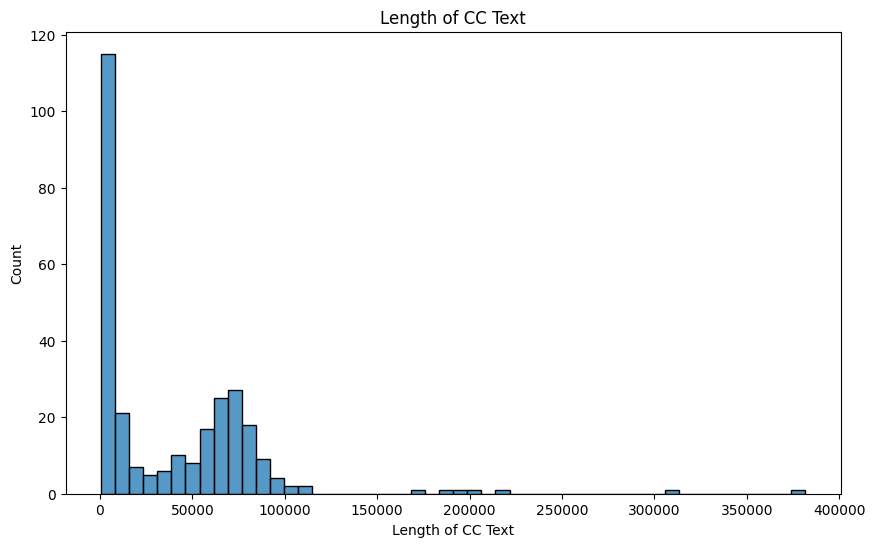

In [62]:
#make a histogram of the length of the text_cc
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['text_cc'].str.len(), bins=50)
plt.title('Length of CC Text')
plt.xlabel('Length of CC Text')
plt.ylabel('Count')
plt.show()

In [74]:
#make text length variable
df['text_length'] = df['text_cc'].str.len()
df['text_length'].describe()

count       283.000000
mean      39870.187279
std       46699.511850
min         502.000000
25%        3903.500000
50%       20651.000000
75%       68876.500000
max      381740.000000
Name: text_length, dtype: float64

In [66]:
#print the shortest text_cc
shortest = df.loc[df['text_length'] == df['text_length'].min()]
print(shortest['text_cc'].values[0])
print(shortest['link'].values[0])

print(shortest['text_length'].values[0])

honor to meet so many amazing people in New Hampshire as we traveled all around your beautiful state and what we saw was that that all of you are so engaged you're so thoughtful you're so you are so deeply caring about the future of this country and we know that's why you're here tonight because you care about our future so first of all I just want to say on behalf of us gratitude to all of you you matter you're important and you're going to send a big message tomorrow so thank you for being here 
https://www.youtube.com/watch?v=06U0r-MdlO0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=20&pp=iAQB0gcJCX4JAYcqIYzv
502


In [67]:
for index, row in df[df['text_length'] < 1000].iterrows():
    print(row['title'])
    print(row['link'])
    print(row['text_length'])
    print('---')

Former presidential candidate Doug Burgum takes the stage in support of President Trump
https://www.youtube.com/watch?v=06U0r-MdlO0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=20&pp=iAQB0gcJCX4JAYcqIYzv
502
---
FULL SPEECH: U.S. Sen. of SC Tim Scott Shares Stage With President Trump - 1/22/24
https://www.youtube.com/watch?v=g9MXqlhPQ1Y&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=21&pp=iAQB0gcJCX4JAYcqIYzv
517
---
Grand Rapids Trump/Vance rally pre-show kicks off with MI-07 congressional candidate Tom Barrett
https://www.youtube.com/watch?v=mbvQxNgCBOw&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=73&pp=iAQB
619
---
Congressman Jack Bergman addresses crowd at Trump/Vance rally in Grand Rapids, MI
https://www.youtube.com/watch?v=uYGJ79uWVTA&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=74&pp=iAQB
745
---
Congressman Bill Huizenga speaks at first Trump/Vance rally in Grand Rapids, Michigan
https://www.youtube.com/watch?v=C-y3-hOIkeY&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=75&pp=

In [75]:
#save the output, one as a csv, but also as a feather, parquet
df.to_csv('Master_DF.csv', index = False)
df.to_feather('Master_DF.feather')
df.to_parquet('Master_DF.parquet')

### Add token data
Add the text_length as the number of tokens


In [13]:
#use open ai tokenizer
import tiktoken
#encoding should be o200k_base
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [133]:
df = pd.read_feather('Master_DF.feather')
df['text_length'] = df['text_cc'].progress_apply(lambda x: num_tokens_from_string(x, 'o200k_base'))
df.head()

100%|██████████| 283/283 [00:03<00:00, 81.13it/s] 


,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event


In [134]:
#save the output, one as a csv, but also as a feather, parquet
df.to_csv('Master_DF.csv', index = False)
df.to_feather('Master_DF.feather')
df.to_parquet('Master_DF.parquet')

### Make date data


In [149]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event


In [154]:
#turn to date, has format M (can be 1 or 2 digits) D (can be 1 or 2 digits) Y (2 digits)
# Clean up leading/trailing whitespace
df['date_clean'] = df['date'].astype(str).str.strip()
# Now convert
df['datetime'] = pd.to_datetime(df['date_clean'], format='%m/%d/%y', errors='coerce')
#drop date_clean
df.drop(columns = ['date_clean'], inplace = True)
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event,2024-01-06
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event,2024-01-06
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event,2024-01-05
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event,2024-01-05
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14


In [155]:
save_output()

# Get Text Features
Now, I will use an LLM to extract features from the text
 - Type of event, location, was it a trump speech, any other speeker
 - What types of campaign promises did he make

In [22]:
import pandas as pd
import numpy as np
import os
import re
import json
import time
from openai import OpenAI
from dotenv import load_dotenv
from tqdm.auto import tqdm


# Configure tqdm for pandas
tqdm.pandas()

# Load environment variables from .env file
load_dotenv()

True

In [23]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event,2024-01-06
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event,2024-01-06
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event,2024-01-05
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event,2024-01-05
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14


## Set Up

In [24]:

# Access your API key
openai_api_key = os.getenv("OpenAI_Key_CSS")

# Initialize OpenAI client
client = OpenAI(api_key=openai_api_key)

In [25]:
# Function for API calls to OpenAI models
def ask_gpt(prompt, model="gpt-4o", max_tokens=4096, response_format=None, temperature=1, top_p=0):
    """
    Send a prompt to OpenAI API and get a response
    
    Parameters:
    prompt (str): The prompt to send to the model
    model (str): The model to use
    max_tokens (int): Maximum tokens in the response
    response_format (dict, optional): Format for the response (e.g., JSON)
    temperature (float): Temperature for sampling
    top_p (float): Top p for nucleus sampling
    
    Returns:
    str: Model response
    """
    prompt_messages = [
        {
            "role": "user",
            "content": prompt
        }
    ]

    # Only include response_format if it's not None
    kwargs = {
        "model": model,
        "messages": prompt_messages,
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": top_p
    }

    if response_format is not None:
        kwargs["response_format"] = response_format

    try:
        completion = client.chat.completions.create(**kwargs)
        return completion.choices[0].message.content
    except Exception as e:
        print(f"Error with OpenAI API call: {e}")
        return None

In [26]:
def save_output(name = 'Master_DF'):
    """
    Save the DataFrame to CSV, Feather, and Parquet formats.
    
    Parameters:
    name (str): Base name for the output files
    """
    df.to_csv(f'{name}.csv', index=False)
    df.to_feather(f'{name}.feather')
    df.to_parquet(f'{name}.parquet')

## Get standardized info from title
Here, I will use the title to figure out which videos are truley Trump Campaign speeches. 
The prompt should identify the following things
- Is it a Trump Speech
- Are there other people also speaking
- What is the location
- What is the event type? Campaing Rally or something else

In [86]:
prompt_title = '''  
You are a helpful assistant tasked with extracting information from a youtube title. 
You will be given a youtube title, and your job is to figure out whether it is a Trump speech, if there are any other speakers, what the location of the event is, and what the event type is. 

###Title###
{title}

###Instructions###
1. trump_speech: A binary indicator whether the video is a Trump speech (1) or not (0). Beware, it can be a Trump campaing event, yet not a Trump Speech. Code this as yes, if Trump is giving a speech, even if someone else is also giving a speech. However, it is not enough that someone is on the stage with Trump, or that someone is portrayed as giving an event together with Trump, the title must indicate that Trump himself will speak. 
2. other_speaker: A text variable that indicates the name of the other speaker. If there is no other speaker, answer with "None".
3. location: A text variable that indicates the location of the event. If there is no location, answer with "None".
4. event_type: A text variable that indicates the type of event. If it is a Campaing Rally, code it as "Campaing Event", otherwise give the best name you can come up with. 

Return only the answer to those questions in a json format, with the keys "trump_speech", "other_speaker", "location", and "event_type".

'''.strip()

In [87]:
response_format_title = {
    'type': 'json_schema',
    'json_schema': {
        'name': 'youtube_title_info',
        'description': 'Extracts structured information from a YouTube video title related to Trump events',
        'schema': {
            'type': 'object',
            'properties': {
                'trump_speech': {
                    'type': 'integer',
                    'enum': [0, 1],
                    'description': 'Binary indicator of whether the video is a Trump speech (1) or not (0)'
                },
                'other_speaker': {
                    'type': 'string',
                    'description': 'Name of another speaker in the video, or "None" if there is no other speaker'
                },
                'location': {
                    'type': 'string',
                    'description': 'Location of the event, or "None" if not mentioned'
                },
                'event_type': {
                    'type': 'string',
                    'description': 'Type of event (e.g., "Campaign Event", "Press Conference", etc.)'
                }
            },
            'required': ['trump_speech', 'other_speaker', 'location', 'event_type']
        }
    }
}

In [82]:
#get a  subset to test it on, very short and very long text (bottom and top 5 speeches)
sample_df = df[df['text_length'] < 1000].sample(5, random_state = 42)
sample_df = pd.concat([sample_df, df[df['text_length'] > 10000].sample(5, random_state = 42)])
sample_df.head(10)

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length
19,https://www.youtube.com/watch?v=06U0r-MdlO0&li...,Former presidential candidate Doug Burgum take...,Former presidential candidate Doug Burgum take...,0,06U0r-MdlO0,"[{'duration': 3.76, 'start': 0.04, 'text': 'ho...",honor to meet so many amazing people in New Ha...,502
20,https://www.youtube.com/watch?v=g9MXqlhPQ1Y&li...,FULL SPEECH: U.S. Sen. of SC Tim Scott Shares ...,1/22/24,0,g9MXqlhPQ1Y,"[{'duration': 3.319, 'start': 0.12, 'text': 'T...",Tim Scott South Carolina all right all right a...,517
75,https://www.youtube.com/watch?v=ZbUZ4ZYd4Zs&li...,JD Vance thanks MASSIVE Michigan crowd for the...,JD Vance thanks MASSIVE Michigan crowd for the...,0,ZbUZ4ZYd4Zs,"[{'duration': 2.839, 'start': 0.08, 'text': 'I...",I want to thank you from the bottom of my hear...,509
72,https://www.youtube.com/watch?v=mbvQxNgCBOw&li...,Grand Rapids Trump/Vance rally pre-show kicks ...,07 congressional candidate Tom Barrett,0,mbvQxNgCBOw,"[{'duration': 4.72, 'start': 0.28, 'text': 'I'...",I'm an Iraq war veteran and uh running for con...,619
74,https://www.youtube.com/watch?v=C-y3-hOIkeY&li...,Congressman Bill Huizenga speaks at first Trum...,Congressman Bill Huizenga speaks at first Trum...,0,C-y3-hOIkeY,"[{'duration': 3.839, 'start': 0.04, 'text': 's...",so you may be asking yourself well at least th...,531
255,https://www.youtube.com/watch?v=0P4tqfo4DY0&li...,FULL SPEECH: President Trump Holds a Rally in ...,10/24/24,0,0P4tqfo4DY0,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,40397
216,https://www.youtube.com/watch?v=HEoY_JapW5I&li...,FULL SPEECH: President Trump Participates in a...,10/7/24,0,HEoY_JapW5I,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,18130
251,https://www.youtube.com/watch?v=3W-VcnyUe9A&li...,FULL SPEECH: President Trump Speaks at a Latin...,10/22/24,0,3W-VcnyUe9A,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,58755
62,https://www.youtube.com/watch?v=Osf0GndSCs0&li...,LIVE REPLAY: President Trump Delivers Remarks ...,6/18/24,0,Osf0GndSCs0,"[{'duration': 3.0, 'start': 28.96, 'text': 'e'...",e e e e e e good Tuesday Morning America so go...,381740
151,https://www.youtube.com/watch?v=jFf5bsgmM3o&li...,FULL SPEECH: President Trump Holds a Rally in ...,9/18/24,0,jFf5bsgmM3o,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,66013


In [88]:
sample_df['response_title'] = sample_df['title'].progress_apply(lambda x: ask_gpt(prompt_title.format(title = x), model = "gpt-4o", response_format = response_format_title))

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


In [90]:
for index, row in sample_df.iterrows():
    print(row['title'])
    print(row['response_title'])
    print('---')

Former presidential candidate Doug Burgum takes the stage in support of President Trump
{"trump_speech":0,"other_speaker":"Doug Burgum","location":"None","event_type":"Support Event"}
---
FULL SPEECH: U.S. Sen. of SC Tim Scott Shares Stage With President Trump - 1/22/24
{"trump_speech":0,"other_speaker":"Tim Scott","location":"None","event_type":"None"}
---
JD Vance thanks MASSIVE Michigan crowd for their support during first ever Trump/Vance rally
{"trump_speech":0,"other_speaker":"JD Vance","location":"Michigan","event_type":"Campaign Event"}
---
Grand Rapids Trump/Vance rally pre-show kicks off with MI-07 congressional candidate Tom Barrett
{"trump_speech":0,"other_speaker":"Tom Barrett","location":"Grand Rapids","event_type":"Campaign Event"}
---
Congressman Bill Huizenga speaks at first Trump/Vance rally in Grand Rapids, Michigan
{"trump_speech":0,"other_speaker":"Congressman Bill Huizenga","location":"Grand Rapids, Michigan","event_type":"Campaign Event"}
---
FULL SPEECH: Preside

Seems to work well, so lets scale it up

In [91]:
df['response_title'] = df['title'].progress_apply(lambda x: ask_gpt(prompt_title.format(title = x), model = "gpt-4o", response_format = response_format_title))

100%|██████████| 283/283 [05:38<00:00,  1.20s/it]


In [180]:
#turn response to var
def unpack_response(row, varname = 'response_title'):
    try:
        response_dict = json.loads(row[varname])
        return pd.Series(response_dict)
    except (TypeError, json.JSONDecodeError):
        return pd.Series()

df = pd.concat([df, df.progress_apply(unpack_response, axis=1)], axis=1)

df.head()

100%|██████████| 283/283 [00:00<00:00, 11194.62it/s]


,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime,trump_speech,other_speaker,location,event_type
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event,2024-01-06,1,None,"Clinton, Iowa",Campaign Event
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event,2024-01-06,1,None,"Newton, Iowa",Campaign Event
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event,2024-01-05,1,None,Mason City,Campaign Event
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event,2024-01-05,1,None,Sioux Center,Campaign Event
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14,1,None,"Indianola, Iowa",Campaign Event


In [109]:
#inspect the data

df[['title', 'link', 'trump_speech', 'other_speaker', 'location', 'event_type']].sample(10, random_state = 123).to_clipboard()


Good overall. There are some speeches where it is not just trump, for example at a press confrence (row three) or at a round table (row 7). Also one case (row 2) where someone else gives some short remarks too. But gets same answers as I would based on title, and the speeches are still mainly Trump, with the others being just a fraction. Row based on no title row

In [ ]:
save_output()

### EDA

In [135]:
df = pd.read_feather('Master_DF.feather')

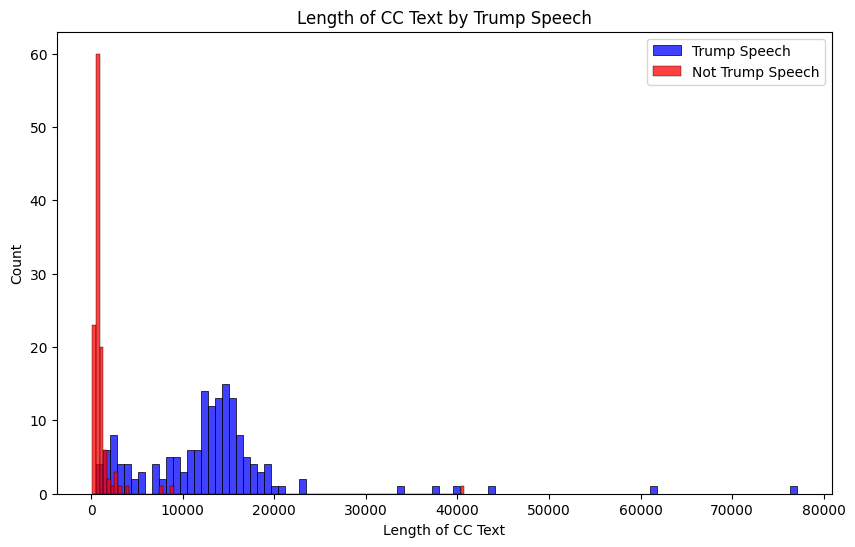

In [136]:
#compare length histogram when it is a Trump speech and when it is not
plt.figure(figsize=(10, 6))
sns.histplot(df[df['trump_speech'] == 1]['text_length'], bins=100, color='blue', label='Trump Speech')
sns.histplot(df[df['trump_speech'] == 0]['text_length'], bins=100, color='red', label='Not Trump Speech')
plt.title('Length of CC Text by Trump Speech')
plt.xlabel('Length of CC Text')
plt.ylabel('Count')
plt.legend()
plt.show()

As expected, most of the really short ones, are actually not trump speeches. Lets look at the short trump speeches, as well as the long not trump speech to figure out if there is some misclassification

In [139]:
#loop over the 5 shortest rows where trump_speech = 1
for index, row in df[(df['text_length'] < 1000) & (df['trump_speech'] == 1)].iterrows():
    print(row['title'])
    print(row['link'])
    print(row['text_length'])
    print('---')

FULL SPEECH: President Trump Holds a Rally in Waterford Township, MI - 2/17/24
https://www.youtube.com/watch?v=LxXARrz0gBc&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=33&pp=iAQB
920
---
FULL SPEECH: President Trump Gives Remarks to the Press in D.C. - 6/13/24
https://www.youtube.com/watch?v=UrT9fh3GeDg&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=60&pp=iAQB0gcJCX4JAYcqIYzv
929
---
ALTERNATE ANGLE: ASSASSINATION ATTEMPT FORCES TRUMP OFF STAGE AT RALLY IN BUTLER, PA - 7/13/24
https://www.youtube.com/watch?v=m5NBC4ijymw&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=70&pp=iAQB
508
---


Has a false possitive, the alternate angle of the assassination attempt. But not costly
Other two are actually short exerpts of speeches

Now lets look at the long ones that are not trump speeches

In [142]:
#loop over the 5 shortest rows where trump_speech = 1
for index, row in df[(df['text_length'] > 8000) & (df['trump_speech'] == 0)].iterrows():
    print(row['title'])
    print(row['link'])
    print(row['video_id'])
    print(row['text_length'])
    print('---')

FULL INTERVIEW: Super Tuesday Preview Special with President Trump at Mar-a-Lago - 3/4/24
https://www.youtube.com/watch?v=7MMyGcVH7Ik&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=40&pp=iAQB
7MMyGcVH7Ik
8814
---
WATCH: RSBN’s Full Coverage of the Assassination Attempt on President Trump - 7/13/24
https://www.youtube.com/watch?v=c3TKCJ7aE44&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=71&pp=iAQB
c3TKCJ7aE44
40743
---


One mistake, the long one is an interview with Trump, should probably change that to be a trump speech, as he is being interviewed an has the majority of talking time. 

In [143]:
#for this video_id (7MMyGcVH7Ik) turn the trump_speech to 1
df.loc[df['video_id'] == '7MMyGcVH7Ik', 'trump_speech'] = 1

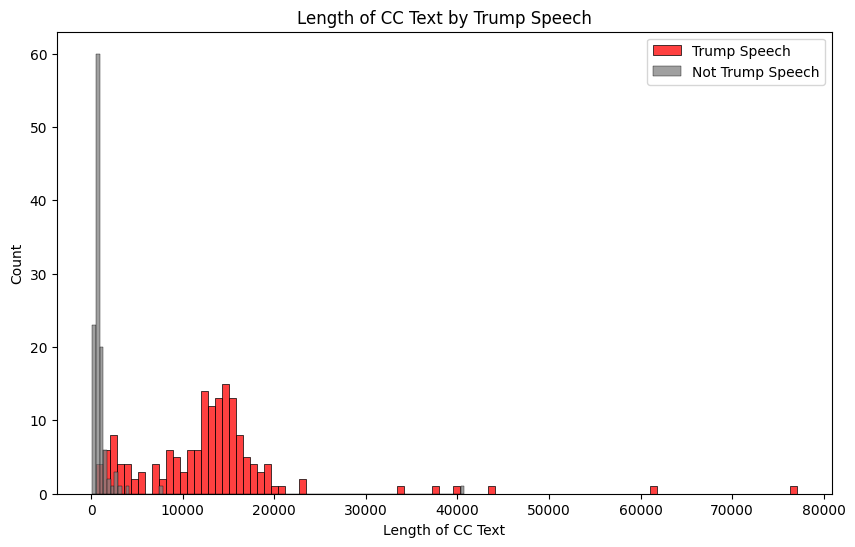

In [145]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['trump_speech'] == 1]['text_length'], bins=100, color='red', label='Trump Speech')
sns.histplot(df[df['trump_speech'] == 0]['text_length'], bins=100, color='gray', label='Not Trump Speech')
plt.title('Length of CC Text by Trump Speech')
plt.xlabel('Length of CC Text')
plt.ylabel('Count')
plt.legend()
plt.show()

In [147]:
save_output()

In [148]:
#who are teh most common speakers
df['other_speaker'].value_counts()

other_speaker
None                   157
JD Vance                 4
Sean Parnell             3
Kamala                   3
Tom Barrett              3
                      ... 
Edward Romaine           1
Scott LoBaido            1
Gov. Sarah Sanders       1
Michael J. McDonald      1
Tucker Carlson           1
Name: count, Length: 104, dtype: int64

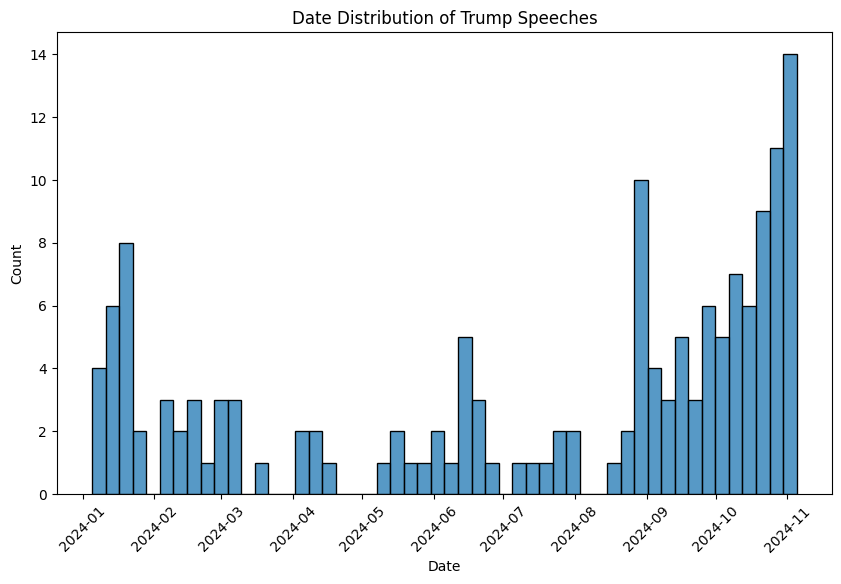

In [162]:
#look at date distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df['trump_speech'] == 1]['datetime'], bins=52)
plt.title('Date Distribution of Trump Speeches')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [165]:
#look at the most recent events
for index, row in df[df['datetime'] > '2024-11-01'].iterrows():
    print(row['date'])
    print(row['link'])
    print(row['title'])
    print(row['trump_speech'])


    print('---')

 11/2/24
https://www.youtube.com/watch?v=r5OBIUebLt0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=274&pp=iAQB0gcJCX4JAYcqIYzv
FULL SPEECH: President Trump Holds a Rally in Gastonia, NC - 11/2/24
1
---
 11/2/24
https://www.youtube.com/watch?v=upUVZxAhyKk&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=275&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Salem, VA - 11/2/24
1
---
 11/3/24
https://www.youtube.com/watch?v=TWmzOh116i8&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=276&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Lititz, PA - 11/3/24
1
---
 11/3/24
https://www.youtube.com/watch?v=VVw4t2V2-jw&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=278&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Macon, GA - 11/3/24
1
---
 11/4/24
https://www.youtube.com/watch?v=bDLRpZGcGIs&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=279&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Raleigh, NC - 11/4/24
1
---
 11/4/24
https://www.youtube.com/watch?v=rdmsHossn4M&list=PLuXX

Should probs cut off at election, but not even sure if I have to. Still kinda campaing promises. 

In [166]:
df['event_type'].value_counts()

event_type
Campaign Event                                                    182
Press Conference                                                   18
Remarks                                                            12
Town Hall                                                           7
Trump Event                                                         7
Speech                                                              6
Latino Roundtable                                                   4
Speech Event                                                        3
Roundtable                                                          3
Endorsement Announcement                                            2
Convention                                                          2
National Guard Event                                                2
Announcement                                                        1
National Summit                                                     1
Address t

## Get Campaign Promises
Next, I will test with getting the campaing promises from the transcription text. 
for that I will need to: 
 - Put the speech into chunks that are not too long
 - Figure out a good prompt to get the campaign promises (and maybe also the big issues they are talking about)
 - Figure out how I can best store all Campaign Promises, and Link them back to the text
 - Figure out what Sample I want to run it on. 

In [170]:
#what is the general sample I for sure care about? Trump speech and a campaign event
sample_large = df[(df['trump_speech'] == 1) & (df['event_type'] == 'Campaign Event')]
print(sample_large.shape)
#short sample to test
sample_short = sample_large.sample(3, random_state = 123)
sample_short.head()


(88, 14)


,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14
278,https://www.youtube.com/watch?v=bDLRpZGcGIs&li...,FULL SPEECH: President Trump Holds a Rally in ...,11/4/24,0,bDLRpZGcGIs,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,15038,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Raleigh, NC",Campaign Event,2024-11-04
218,https://www.youtube.com/watch?v=7eK2z33_VRI&li...,FULL SPEECH: President Trump ​H​olds a Rally i...,10/9/24,0,7eK2z33_VRI,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,13592,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Reading, PA",Campaign Event,2024-10-09


In [42]:
prompt_campaing_promises = '''  
You are a helpful assistant tasked with extracting campaing promises from the transcripts of a campaing event. The text is based on youtube closed captions of a chunk of the event, so there is some noise in the sense that the text is not neccessarily percise and clean. But it should still be possible to extract the key arguments from it. 

###Text###
{transcript}

###Instructions###
Your job is to extract all the campaing promises from the text. That is, during his campaing, Trump focused on very specific issues that he wants to tackle, your job is to extract those issues and promises. 
For that, extract every single promise, give me both the explanation of what the promise is about, as well as a short excerpt of the text that your decision is based on. 

For each campaing promise/claim, return a dictionary with the following
- The key is promise_1 for the first, promise_2 for the second, etc.
- The value is a dictionary with the following:
    - "Label": A short label for the promise, this should be as high level as possible
    - "Description": A short text description with the campaing promise
    - "Excerpt": An excerpt of the text that your decision is based on. This excerpt should be exactly as in the orignial text, and can have misspellings or obviously erroronous words, as long as it is exactly as in the original text. You do not have to include every text passage you used, limit the response to max 4 sentences. 
    - "Issue": A short text describing the issue that the promise is tackling
    - "Importance": A number between 0 and 10 that indicates how important the issue was made out to be during the speech. 

Return only the answer to those questions in a json format, with the keys "promise_1", "promise_2", etc.

'''.strip()

In [43]:
response_format_promises = {
    'type': 'json_schema',
    'json_schema': {
        'name': 'campaign_promises',
        'description': 'Extracts campaign promises from a transcript of a campaign event',
        'schema': {
            'type': 'object',
            'properties': {},  
            'patternProperties': {
                '^promise_\\d+$': {
                    'type': 'object',
                    'properties': {
                        'Label': {
                            'type': 'string',
                            'description': 'A short, high-level label for the campaign promise'
                        },
                        'Description': {
                            'type': 'string',
                            'description': 'A concise description of the campaign promise'
                        },
                        'Excerpt': {
                            'type': 'string',
                            'description': 'A relevant excerpt from the transcript supporting the promise'
                        },
                        'Issue': {
                            'type': 'string',
                            'description': 'The political or social issue the promise addresses'
                        },
                        'Importance': {
                            'type': 'integer',
                            'minimum': 0,
                            'maximum': 10,
                            'description': 'An importance score based on how central the issue was to the speech'
                        }
                    },
                    'required': ['Label', 'Description', 'Excerpt', 'Issue', 'Importance']
                }
            },
            'additionalProperties': False
        }
    }
}

In [190]:
sample_short['text_cc_response_p2'] = sample_short['text_cc'].progress_apply(lambda x: ask_gpt(prompt_campaing_promises.format(transcript = x), model = "gpt-4o", response_format = response_format_promises))

100%|██████████| 3/3 [00:33<00:00, 11.03s/it]


In [191]:
sample_short['text_cc_response_p2'].iloc[0]

'{"promise_1":{"Label":"Secure the Border","Description":"Trump promises to seal the border and shut down the invasion of the country, emphasizing the need for strong border security.","Excerpt":"\\"I will seal the border and I will shut down the invasion of our country.\\"","Issue":"Border security and immigration control","Importance":10},"promise_2":{"Label":"Energy Independence","Description":"Trump pledges to restore energy independence by drilling and utilizing domestic energy resources.","Excerpt":"\\"Drill baby drill, we\'re going to drill baby drill.\\"","Issue":"Energy independence and economic stability","Importance":9},"promise_3":{"Label":"Economic Revival","Description":"Trump promises to end Biden\'s inflation nightmare and rescue the economy, focusing on reducing inflation and boosting economic growth.","Excerpt":"\\"I will end Joe Biden\'s inflation nightmare, rescue our economy.\\"","Issue":"Inflation and economic growth","Importance":8},"promise_4":{"Label":"Tax Cuts

Issue is: How can I efficiently extract all claims, standardize them, and get an understanding for how important each of the topics are in relation to each other? Will start trying it bottom up, but might need to turn it into a top down approach

In [30]:
import pandas as pd
import json

# Sample DataFrame structure:
# df = pd.DataFrame({
#     'video_id': ['abc123', 'def456'],
#     'promises_json': [json_string_1, json_string_2]  # JSON strings from your LLM output
# })

# Flatten function
def flatten_promises(row):
    video_id = row['video_id']
    promises_data = json.loads(row['text_cc_response_p2'])  
    flattened_rows = []
    for promise_key, promise_values in promises_data.items():
        flattened_rows.append({
            'video_id': video_id,
            'Label': promise_values['Label'],
            'Description': promise_values['Description'],
            'Excerpt': promise_values['Excerpt'],
            'Issue': promise_values['Issue'],
            'Importance': promise_values['Importance']
        })
    return flattened_rows



In [ ]:
# Apply to all rows and flatten the result
flattened_data = []
for _, row in sample_short.iterrows():
    flattened_data.extend(flatten_promises(row))

# Create the new DataFrame
promises_df = pd.DataFrame(flattened_data)

# Show the final result
promises_df.head()

In [193]:
promises_df.to_clipboard()

### Cost Analysis
Now that we know it kinda works, lets see how much it would cost to run this prompt on the whole dataset. 

In [8]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event,2024-01-06
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event,2024-01-06
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event,2024-01-05
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event,2024-01-05
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14


In [9]:
gpt_4o_input_price = 5/1000000 #5 $ per million tokens
gpt_4o_output_price = 20/1000000 #20 $ per million tokens

In [19]:
example_output = '''
{"promise_1":{"Label":"Secure the Border","Description":"Trump promises to seal the border and shut down the invasion of the country, emphasizing the need for strong border security.","Excerpt":"\\"I will seal the border and I will shut down the invasion of our country.\\"","Issue":"Border security and immigration control","Importance":10},"promise_2":{"Label":"Energy Independence","Description":"Trump pledges to restore energy independence by drilling and utilizing domestic energy resources.","Excerpt":"\\"Drill baby drill, we\'re going to drill baby drill.\\"","Issue":"Energy independence and economic stability","Importance":9},"promise_3":{"Label":"Economic Revival","Description":"Trump promises to end Biden\'s inflation nightmare and rescue the economy, focusing on reducing inflation and boosting economic growth.","Excerpt":"\\"I will end Joe Biden\'s inflation nightmare, rescue our economy.\\"","Issue":"Inflation and economic growth","Importance":8},"promise_4":{"Label":"Tax Cuts","Description":"Trump commits to making the Trump tax cuts permanent and cutting taxes for families and farmers even more.","Excerpt":"\\"I will make the Trump tax cuts permanent and cut taxes for families and Farmers even more.\\"","Issue":"Taxation and economic relief","Importance":7},"promise_5":{"Label":"Deportation Operation","Description":"Trump plans to begin the largest deportation operation in American history to address illegal immigration.","Excerpt":"\\"Begin the largest deportation operation in American history.\\"","Issue":"Illegal immigration","Importance":8},"promise_6":{"Label":"Protect Social Security and Medicare","Description":"Trump assures that he will always protect Medicare and Social Security for seniors.","Excerpt":"\\"We will always protect Medicare and social security for our great seniors.\\"","Issue":"Social security and healthcare for seniors","Importance":7},"promise_7":{"Label":"Military Strength","Description":"Trump promises to restore peace through strength and prevent World War III by maintaining a strong military presence.","Excerpt":"\\"I will prevent World War III.\\"","Issue":"National security and military strength","Importance":9},"promise_8":{"Label":"Election Security","Description":"Trump vows to secure elections by implementing paper ballots, one-day voting, and voter ID.","Excerpt":"\\"We will go to paper ballots, we will have one day voting and we will have a thing called voter ID.\\"","Issue":"Election integrity","Importance":8},"promise_9":{"Label":"Free Speech and Education","Description":"Trump promises to cut federal funding for schools pushing critical race theory and other inappropriate content, and to uphold free speech.","Excerpt":"\\"I will sign a new executive order to cut Federal funding for any school pushing critical race Theory.\\"","Issue":"Education and free speech","Importance":7},"promise_10":{"Label":"Second Amendment Protection","Description":"Trump commits to fully upholding the Second Amendment rights of citizens.","Excerpt":"\\"I will fully uphold the Second Amendment.\\"","Issue":"Gun rights and Second Amendment","Importance":6}}
'''
average_output_tokens = num_tokens_from_string(example_output, 'o200k_base')

string_for_token = prompt_campaing_promises
string_for_token = string_for_token + example_output + str(response_format_promises)
tokens_prompt_and_responseformat = num_tokens_from_string(string_for_token, 'o200k_base')

average_input_tokens = df[df['trump_speech'] == 1]['text_length'].mean()
number_of_examples = df[df['trump_speech'] == 1].shape[0]

price = ((average_input_tokens + tokens_prompt_and_responseformat) * number_of_examples) * gpt_4o_input_price + average_output_tokens * gpt_4o_output_price

print(f'The estimated cost for the campaign promises extraction is: {price} $')


The estimated cost for the campaign promises extraction is: 11.623335 $


## Run on all data and create new dataset with the promises p_1

In [20]:
df = pd.read_feather('Master_DF.feather')

In [31]:
df['response_cc_p1'] = df['text_cc'].progress_apply(lambda x: ask_gpt(prompt_campaing_promises.format(transcript = x), model = "gpt-4o", response_format = response_format_promises))

100%|██████████| 283/283 [1:10:31<00:00, 14.95s/it] 


In [37]:
df['response_cc_p1'].iloc[50]

'{"promise_1":{"Label":"Inflation Control","Description":"Trump promises to tackle inflation by ending Biden\'s spending spree and reinstating his economic policies.","Excerpt":"will stop the Biden stupid spending spree will end his inflation death spiral this is a death spiral","Issue":"Inflation and economic instability","Importance":9},"promise_2":{"Label":"Energy Independence","Description":"Trump pledges to reinstate drilling and energy production to lower energy prices and achieve energy independence.","Excerpt":"we\'re going to drill baby drill like we\'ve never drilled before and we\'re going to bring down Energy prices","Issue":"High energy prices and dependency on foreign energy","Importance":8},"promise_3":{"Label":"Border Security","Description":"Trump promises to secure the border, end sanctuary cities, and conduct mass deportations of illegal immigrants.","Excerpt":"we will stop the plunder rape Slaughter and destruction of our American suburb cities and towns we\'re goin

In [ ]:
import json
import ast
import pandas as pd

# To store failed video_ids
failed_video_ids = []

def flatten_promises(row):
    video_id = row['video_id']
    
    try:
        data_dict = ast.literal_eval(row['response_cc_p1'])
    except (ValueError, SyntaxError):
        print(f"Failed to evaluate response_cc_p1 for video_id: {video_id}")
        failed_video_ids.append(video_id)
        return []  # Skip this row
    
    flattened_rows = []
    for promise_key, promise_values in data_dict.items():
        flattened_rows.append({
            'video_id': video_id,
            'Label': promise_values['Label'],
            'Description': promise_values['Description'],
            'Excerpt': promise_values['Excerpt'],
            'Issue': promise_values['Issue'],
            'Importance': promise_values['Importance']
        })
    return flattened_rows

In [ ]:


# Apply to all rows and flatten the result
flattened_data = []
for _, row in df.iterrows():
    flattened_data.extend(flatten_promises(row))

# Create the new DataFrame
promises_df = pd.DataFrame(flattened_data)

# Show the failed video IDs, if any
if failed_video_ids:
    print("Parsing failed for the following video_ids:")
    print(failed_video_ids)

# Display the new DataFrame
promises_df.head()

Failed to evaluate response_cc_p1 for video_id: DHTMLsknQbI
Failed to evaluate response_cc_p1 for video_id: LT9NqqlqeB4
Failed to evaluate response_cc_p1 for video_id: 3Ys3E4PjCPk
Failed to evaluate response_cc_p1 for video_id: tKBwnG36hIc
Failed to evaluate response_cc_p1 for video_id: 8h-Yb0frbjo
Failed to evaluate response_cc_p1 for video_id: v1RQ4u_BlXU
Parsing failed for the following video_ids:
['DHTMLsknQbI', 'LT9NqqlqeB4', '3Ys3E4PjCPk', 'tKBwnG36hIc', '8h-Yb0frbjo', 'v1RQ4u_BlXU']


,video_id,Label,Description,Excerpt,Issue,Importance
0,0npi0hevtKg,Secure the Border,Trump promises to secure the U.S. border by co...,I'm going to be a dictator for one day and we'...,Illegal immigration and border security,9
1,0npi0hevtKg,Energy Independence,Trump pledges to make the U.S. energy independ...,we're going to become energy independent we're...,Energy independence and economic stability,8
2,0npi0hevtKg,Military Strength,Trump promises to strengthen the U.S. military...,our military has gone woke and we are teeterin...,Military readiness and national security,7
3,0npi0hevtKg,Economic Revival,Trump aims to revive the U.S. economy by reduc...,our middle class is being crushed by Joe Biden...,Economic stability and inflation,8
4,0npi0hevtKg,Law and Order,Trump promises to restore law and order by sup...,we're going to give the police back their Auth...,Crime and public safety,7


In [39]:
len(failed_video_ids)

6

In [40]:
len(promises_df)

1803

In [41]:
df_issues = df[df['video_id'].isin(failed_video_ids)]
print(df_issues.shape)
df_issues[['video_id', 'title', 'link', 'response_cc_p1']].to_clipboard()
df_issues[['video_id', 'title', 'link', 'response_cc_p1']].head()

(6, 15)


,video_id,title,link,response_cc_p1
29,DHTMLsknQbI,FULL SPEECH: President Trump Holds a Get Out t...,https://www.youtube.com/watch?v=DHTMLsknQbI&li...,"{""promise_1"":{""Label"":""Border Security"",""Descr..."
83,LT9NqqlqeB4,FULL SPEECH: President Trump Holds a Rally in ...,https://www.youtube.com/watch?v=LT9NqqlqeB4&li...,"{""promise_1"":{""Label"":""Secure Borders"",""Descri..."
97,3Ys3E4PjCPk,FULL SPEECH: Trump Addresses the National Guar...,https://www.youtube.com/watch?v=3Ys3E4PjCPk&li...,"{""promise_1"":{""Label"":""Support for National Gu..."
128,tKBwnG36hIc,FULL SPEECH: President Trump Delivers Remarks ...,https://www.youtube.com/watch?v=tKBwnG36hIc&li...,"{""promise_1"":{""Label"":""End Taxes on Overtime"",..."
192,8h-Yb0frbjo,LIVE REPLAY: President Trump to Hold a Rally i...,https://www.youtube.com/watch?v=8h-Yb0frbjo&li...,"{""promise_1"":{""Label"":""Manufacturing Renaissan..."


In [44]:
df_issues['presonse_cc_p1.5'] = df_issues['text_cc'].progress_apply(lambda x: ask_gpt(prompt_campaing_promises.format(transcript = x), model = "gpt-4o", response_format = response_format_promises))

100%|██████████| 6/6 [03:04<00:00, 30.73s/it]
/var/folders/dv/nfxpqfgn50ncwmnyg61n91m80000gn/T/ipykernel_8596/4264493865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_issues['presonse_cc_p1.5'] = df_issues['text_cc'].progress_apply(lambda x: ask_gpt(prompt_campaing_promises.format(transcript = x), model = "gpt-4o", response_format = response_format_promises))


In [45]:
failed_video_ids_2 = []

def flatten_promises(row):
    video_id = row['video_id']
    
    try:
        data_dict = ast.literal_eval(row['presonse_cc_p1.5'])
    except (ValueError, SyntaxError):
        print(f"Failed to evaluate response_cc_p1 for video_id: {video_id}")
        failed_video_ids_2.append(video_id)
        return []  # Skip this row
    
    flattened_rows = []
    for promise_key, promise_values in data_dict.items():
        flattened_rows.append({
            'video_id': video_id,
            'Label': promise_values['Label'],
            'Description': promise_values['Description'],
            'Excerpt': promise_values['Excerpt'],
            'Issue': promise_values['Issue'],
            'Importance': promise_values['Importance']
        })
    return flattened_rows

In [46]:
# Apply to all rows and flatten the result
flattened_data_2 = []
for _, row in df_issues.iterrows():
    flattened_data_2.extend(flatten_promises(row))

# Create the new DataFrame
promises_df_2 = pd.DataFrame(flattened_data)

# Show the failed video IDs, if any
if failed_video_ids:
    print("Parsing failed for the following video_ids:")
    print(failed_video_ids)

# Display the new DataFrame
promises_df_2.head()

Failed to evaluate response_cc_p1 for video_id: LT9NqqlqeB4
Failed to evaluate response_cc_p1 for video_id: 3Ys3E4PjCPk
Failed to evaluate response_cc_p1 for video_id: tKBwnG36hIc
Failed to evaluate response_cc_p1 for video_id: v1RQ4u_BlXU
Parsing failed for the following video_ids:
['DHTMLsknQbI', 'LT9NqqlqeB4', '3Ys3E4PjCPk', 'tKBwnG36hIc', '8h-Yb0frbjo', 'v1RQ4u_BlXU']


,video_id,Label,Description,Excerpt,Issue,Importance
0,0npi0hevtKg,Secure the Border,Trump promises to secure the U.S. border by co...,I'm going to be a dictator for one day and we'...,Illegal immigration and border security,9
1,0npi0hevtKg,Energy Independence,Trump pledges to make the U.S. energy independ...,we're going to become energy independent we're...,Energy independence and economic stability,8
2,0npi0hevtKg,Military Strength,Trump promises to strengthen the U.S. military...,our military has gone woke and we are teeterin...,Military readiness and national security,7
3,0npi0hevtKg,Economic Revival,Trump aims to revive the U.S. economy by reduc...,our middle class is being crushed by Joe Biden...,Economic stability and inflation,8
4,0npi0hevtKg,Law and Order,Trump promises to restore law and order by sup...,we're going to give the police back their Auth...,Crime and public safety,7


In [48]:
df_issues[['link', 'presonse_cc_p1.5']].to_clipboard()

In [49]:
#save promises df_1 
promises_df.to_csv('Data/promises_p1.csv', index = False)
promises_df.to_feather('Data/promises_p1.feather')
promises_df.to_parquet('Data/promises_p1.parquet')

### Explore promises df

In [50]:
promises_df.shape

(1803, 6)

In [51]:
promises_df.head()

,video_id,Label,Description,Excerpt,Issue,Importance
0,0npi0hevtKg,Secure the Border,Trump promises to secure the U.S. border by co...,I'm going to be a dictator for one day and we'...,Illegal immigration and border security,9
1,0npi0hevtKg,Energy Independence,Trump pledges to make the U.S. energy independ...,we're going to become energy independent we're...,Energy independence and economic stability,8
2,0npi0hevtKg,Military Strength,Trump promises to strengthen the U.S. military...,our military has gone woke and we are teeterin...,Military readiness and national security,7
3,0npi0hevtKg,Economic Revival,Trump aims to revive the U.S. economy by reduc...,our middle class is being crushed by Joe Biden...,Economic stability and inflation,8
4,0npi0hevtKg,Law and Order,Trump promises to restore law and order by sup...,we're going to give the police back their Auth...,Crime and public safety,7


In [52]:
promises_df['Label'].value_counts()

Label
Energy Independence                  102
Border Security                       56
Election Integrity                    48
Military Strength                     41
Education Reform                      40
                                    ... 
Manufacturing and Industry             1
Lower Gas Prices                       1
Opposition to Radical Agenda           1
Energy Independence and Dominance      1
Unity and Success                      1
Name: count, Length: 748, dtype: int64

Lets generate something I can feed into an LLM in order for it to help with coming up with meta categories. I will use the labels as well as the description

In [55]:
label_string = ''

for index, row in promises_df.iterrows():
    label_string += row['Label'] + ' : ' + str(row['Description']) + ';\n'

label_string

"Secure the Border : Trump promises to secure the U.S. border by completing the wall and implementing strict immigration policies.;\nEnergy Independence : Trump pledges to make the U.S. energy independent by drilling and utilizing domestic resources.;\nMilitary Strength : Trump promises to strengthen the U.S. military and ensure it is not 'woke'.;\nEconomic Revival : Trump aims to revive the U.S. economy by reducing inflation and supporting the middle class.;\nLaw and Order : Trump promises to restore law and order by supporting law enforcement and indemnifying police against liability.;\nElection Integrity : Trump pledges to ensure fair elections by implementing voter ID and paper ballots.;\nForeign Policy : Trump promises to handle foreign relations with strength, ensuring respect and fear from other nations.;\nEconomic Support for Farmers : Trump promises to support American farmers financially, as he did previously with $28 billion.;\nRebuild American Cities : Trump pledges to rebu

In [54]:
label_string = ''

for index, row in promises_df.iterrows():
    label_string += row['Label'] +  ';\n'

label_string

"Secure the Border;\nEnergy Independence;\nMilitary Strength;\nEconomic Revival;\nLaw and Order;\nElection Integrity;\nForeign Policy;\nEconomic Support for Farmers;\nRebuild American Cities;\nRelease January 6th Prisoners;\nSecure the Border;\nEnd Inflation;\nEnergy Independence;\nMilitary Strength;\nProtect Social Security and Medicare;\nEnd Endless Wars;\nElection Integrity;\nSupport Law Enforcement;\nProtect Free Speech;\nEconomic Growth;\nSecure the Border;\nEconomic Revival;\nElection Integrity;\nMilitary and Defense;\nHealthcare Reform;\nEducation Reform;\nLaw and Order;\nForeign Policy and Trade;\nEnergy Policy;\nJudicial Appointments;\nTake Back the Country;\nMassive Victory in Iowa;\nDefeat Joe Biden;\nSecure the Border;\nEnd Biden's Policies;\nEconomic Revival;\nMilitary Strength;\nEnergy Independence;\nProtect Social Security and Medicare;\nElection Integrity;\nEnd the War in Ukraine;\nRestore Law and Order;\nSupport for Farmers;\nHealthcare Reform;\nProtect Second Amendmen

### Standardize the Labels

In [68]:
trump_policy_label_dict = {
    "Secure the Border": "Border Security & Immigration",
    "Border Security": "Border Security & Immigration",
    "Close the Border": "Border Security & Immigration",
    "Seal the Border": "Border Security & Immigration",
    "End Open Border Policies": "Border Security & Immigration",
    "Strengthen Border Security": "Border Security & Immigration",
    "Combat Migrant Crime": "Border Security & Immigration",
    "Deportation Operation": "Border Security & Immigration",
    "Deportation Program": "Border Security & Immigration",
    "Largest Deportation in History": "Border Security & Immigration",
    "End Sanctuary Cities": "Border Security & Immigration",
    "Ban Sanctuary Cities": "Border Security & Immigration",
    "End Catch and Release": "Border Security & Immigration",
    "Deport Criminal Aliens": "Border Security & Immigration",
    "Deport Criminal Migrants": "Border Security & Immigration",
    "Deportation of Criminals": "Border Security & Immigration",
    "Deportation of Illegal Immigrants": "Border Security & Immigration",
    "Reinstate Border Policies": "Border Security & Immigration",
    "Stop Migrant Invasion": "Border Security & Immigration",
    "End Migrant Invasion": "Border Security & Immigration",
    "Remain in Mexico Policy": "Border Security & Immigration",
    "Combat Human Trafficking": "Border Security & Immigration",
    "Fentanyl Blockade": "Border Security & Immigration",
    "End Child Trafficking": "Border Security & Immigration",
    "Title 42 Medical Rejections": "Border Security & Immigration",
    "Immigration Reform": "Border Security & Immigration",
    "Invoke Alien Enemies Act": "Border Security & Immigration",
    "Stop Migrant Flights": "Border Security & Immigration",
    "End Illegal Immigration": "Border Security & Immigration",
    "Stop Illegal Immigration": "Border Security & Immigration",
    "Combat Illegal Immigration": "Border Security & Immigration",
    "Immigration Control": "Border Security & Immigration",
    "Secure the Southern Border": "Border Security & Immigration",
    "Secure Borders": "Border Security & Immigration",
    "Strong Borders": "Border Security & Immigration",
    "Strengthening Borders": "Border Security & Immigration",
    "Securing Borders": "Border Security & Immigration",
    "Border Control": "Border Security & Immigration",
    "Border Security and Immigration": "Border Security & Immigration",
    "Border Security and Immigration Reform": "Border Security & Immigration",
    "Immigration and Border Security": "Border Security & Immigration",
    "Securing the Southern Border": "Border Security & Immigration",
    "Secure Borders and Deport Criminals": "Border Security & Immigration",
    "Reform Immigration Policies": "Border Security & Immigration",
    "Reform Asylum Policies": "Border Security & Immigration",
    "Address Migrant Crime": "Border Security & Immigration",
    "End Biden's Migrant Crime": "Border Security & Immigration",
    "End the Border Crisis": "Border Security & Immigration",
    "End Biden's Amnesty Plan": "Border Security & Immigration",
    "Repeal The Invasion": "Border Security & Immigration",
    "Reinstate Immigration Policies": "Border Security & Immigration",
    "Reinstate Border Security Measures": "Border Security & Immigration",
    "Military Involvement in Border Security": "Border Security & Immigration",
    "End Open Borders": "Border Security & Immigration",
    "Address Border Crisis": "Border Security & Immigration",
    "Restore Borders": "Border Security & Immigration",
    "End Kamala's Border Betrayal": "Border Security & Immigration",
    "Operation Aurora": "Border Security & Immigration",
    "Human Trafficking Reduction": "Border Security & Immigration",
    "Outlaw Sanctuary Cities Nationwide": "Border Security & Immigration",
    "Support for Legal Immigration": "Border Security & Immigration",
    "Legal Immigration Pathways": "Border Security & Immigration",
    "Stop Criminal Invasion": "Border Security & Immigration",
    "Death Penalty for Migrant Killers": "Border Security & Immigration",
    "Death Penalty for Migrant Crimes": "Border Security & Immigration",
    "Rebuild the Wall": "Border Security & Immigration",
    "Sanctuary Cities Ban": "Border Security & Immigration",
    "End Migrant Crime": "Border Security & Immigration",
    "Reduce Migrant Crisis": "Border Security & Immigration",
    "Largest Deportation Operation": "Border Security & Immigration",
    "Largest Deportation Program": "Border Security & Immigration",
    "Largest Deportation of Criminals": "Border Security & Immigration",
    "Massive Deportation Program": "Border Security & Immigration",
    "Increase Deportations": "Border Security & Immigration",
    "Deportation and Immigration Reform": "Border Security & Immigration",
    "Deport Jihad Sympathizers": "Border Security & Immigration",
    "Deport Criminals": "Border Security & Immigration",
    
    "Economic Revival": "Economic Policy & Inflation",
    "Economic Recovery": "Economic Policy & Inflation",
    "Economic Growth": "Economic Policy & Inflation",
    "Economic Boom": "Economic Policy & Inflation",
    "Economic Prosperity": "Economic Policy & Inflation",
    "End Inflation": "Economic Policy & Inflation",
    "Inflation Control": "Economic Policy & Inflation",
    "Economic Security": "Economic Policy & Inflation",
    "Economic Stability": "Economic Policy & Inflation",
    "Reduce Living Costs": "Economic Policy & Inflation",
    "Affordable Housing": "Economic Policy & Inflation",
    "Job Creation": "Economic Policy & Inflation",
    "American Dream Restoration": "Economic Policy & Inflation",
    "Lower Grocery Prices": "Economic Policy & Inflation",
    "Protect American Jobs": "Economic Policy & Inflation",
    "Strengthen the Economy": "Economic Policy & Inflation",
    "America's New Golden Age": "Economic Policy & Inflation",
    "Economic Miracle": "Economic Policy & Inflation",
    "Lower Prices": "Economic Policy & Inflation",
    "Reduce Inflation and Interest Rates": "Economic Policy & Inflation",
    "Address Inflation": "Economic Policy & Inflation",
    "Stop Biden's Inflation Tax": "Economic Policy & Inflation",
    "Make America Affordable Again": "Economic Policy & Inflation",
    "Lower Cost of Living": "Economic Policy & Inflation",
    "Cap Interest Rates on Credit Card Debt": "Economic Policy & Inflation",
    "Reducing Taxes and Debt": "Economic Policy & Inflation",
    "Economic Relief for Families": "Economic Policy & Inflation",
    "Employment and Opportunity Zones": "Economic Policy & Inflation",
    "Revitalize Economy": "Economic Policy & Inflation",
    "Revitalize the Economy": "Economic Policy & Inflation",
    "Revitalizing the Economy": "Economic Policy & Inflation",
    "Trump Economic Boom": "Economic Policy & Inflation",
    "Lower Costs and Higher Income": "Economic Policy & Inflation",
    "Economic Development": "Economic Policy & Inflation",
    "Economic Revitalization": "Economic Policy & Inflation",
    "Economic Focus": "Economic Policy & Inflation",
    "Economic Growth and Job Creation": "Economic Policy & Inflation",
    "Economic Growth and Prosperity": "Economic Policy & Inflation",
    "Economic Growth and Tax Cuts": "Economic Policy & Inflation",
    "Economic Improvement": "Economic Policy & Inflation",
    "Economic Independence": "Economic Policy & Inflation",
    "Economic Policies": "Economic Policy & Inflation",
    "Economic Policy": "Economic Policy & Inflation",
    "Economic Protection": "Economic Policy & Inflation",
    "Economic Relief": "Economic Policy & Inflation",
    "Economic Strength": "Economic Policy & Inflation",
    "Economic Support for Farmers": "Economic Policy & Inflation",
    "Reinstate MAGAnomics": "Economic Policy & Inflation",
    "Growing Economy": "Economic Policy & Inflation",
    "Afford Living": "Economic Policy & Inflation",
    "Affordable Essentials": "Economic Policy & Inflation",
    "Cut Inflation": "Economic Policy & Inflation",
    "Defeat Inflation": "Economic Policy & Inflation",
    "Create Jobs and Raise Wages": "Economic Policy & Inflation",
    "Lower Interest Rates": "Economic Policy & Inflation",
    "End Biden's Economic Policies": "Economic Policy & Inflation",
    "No Inflation and More Affordability": "Economic Policy & Inflation",
    "Reduce Inflation": "Economic Policy & Inflation",
    "Stop Biden Spending": "Economic Policy & Inflation",
    "Combat Hyperinflation": "Economic Policy & Inflation",
    "Golden Age": "Economic Policy & Inflation",
    "Golden Age of America": "Economic Policy & Inflation",
    "American Dream": "Economic Policy & Inflation",
    "Restore American Dream": "Economic Policy & Inflation",
    "Revive American Dream": "Economic Policy & Inflation",
    "Revive the American Dream": "Economic Policy & Inflation",
    "Revive the Economy": "Economic Policy & Inflation",
    "American Dream for All": "Economic Policy & Inflation",
    "American Dream Revival": "Economic Policy & Inflation",
    "Bring Back American Dream": "Economic Policy & Inflation",
    "Rebuild the Economy": "Economic Policy & Inflation",
    "End Inflation and Make America Affordable": "Economic Policy & Inflation",
    "End Inflation and Economic Misery": "Economic Policy & Inflation",
    "End Economic Misery": "Economic Policy & Inflation",
    "Economic Crash Prevention": "Economic Policy & Inflation",
    "Economic Development for Black Communities": "Economic Policy & Inflation",
    "Economic Development and Aid": "Economic Policy & Inflation",
    "Protecting Financial Future": "Economic Policy & Inflation",
    "Support for Small Businesses": "Economic Policy & Inflation",
    "Cut Spending and Create Opportunities": "Economic Policy & Inflation",
    "Cut Taxes and Inflation": "Economic Policy & Inflation",
    "Bring Back Jobs": "Economic Policy & Inflation",
    "Create Economic Boom": "Economic Policy & Inflation",
    "Dream Big": "Economic Policy & Inflation",
    "Dream Big Again": "Economic Policy & Inflation",
    "End Biden's Policies": "Economic Policy & Inflation",
    "End Kamala Harris Policies": "Economic Policy & Inflation",
    "End Kamala Harris's Policies": "Economic Policy & Inflation",
    "Support for Minority Communities": "Economic Policy & Inflation",
    "Protect the American Dream": "Economic Policy & Inflation",
    "Rebuild America": "Economic Policy & Inflation",
    "Renew American Greatness": "Economic Policy & Inflation",
    "Make America Great Again": "Economic Policy & Inflation",
    "Renewed American Greatness": "Economic Policy & Inflation",
    "Restore Global Standing": "Economic Policy & Inflation",
    "End Incompetence": "Economic Policy & Inflation",
    "Fix the Country": "Economic Policy & Inflation",

    "Energy Independence": "Energy & Environmental Policy",
    "Energy Dominance": "Energy & Environmental Policy",
    "American Energy Dominance": "Energy & Environmental Policy",
    "End Biden's War on American Energy": "Energy & Environmental Policy",
    "End War on American Energy": "Energy & Environmental Policy",
    "Energy Cost Reduction": "Energy & Environmental Policy",
    "Lower Energy Costs": "Energy & Environmental Policy",
    "Reduce Gas Prices": "Energy & Environmental Policy",
    "Lower Electricity Costs": "Energy & Environmental Policy",
    "Increase Energy Production": "Energy & Environmental Policy",
    "Energy Security": "Energy & Environmental Policy",
    "End Electric Vehicle Mandate": "Energy & Environmental Policy",
    "End Green New Deal": "Energy & Environmental Policy",
    "End Kamala's War on Energy": "Energy & Environmental Policy",
    "Terminate Green New Deal": "Energy & Environmental Policy",
    "ANWR Drilling": "Energy & Environmental Policy",
    "Drill for Energy Independence": "Energy & Environmental Policy",
    "End Electric Mandate for Trucks and Boats": "Energy & Environmental Policy",
    "Energy and Taxation": "Energy & Environmental Policy",
    "Energy Independence and Dominance": "Energy & Environmental Policy",
    "Energy Independence and Low Costs": "Energy & Environmental Policy",
    "Energy Sector Dominance": "Energy & Environmental Policy",
    "Energy Policy": "Energy & Environmental Policy",
    "Energy Prices Reduction": "Energy & Environmental Policy",
    "Energy Revolution": "Energy & Environmental Policy",
    "Energy and Environmental Policy": "Energy & Environmental Policy",
    "Energy Cost Reduction": "Energy & Environmental Policy",
    "Repeal Electric Vehicle Mandate": "Energy & Environmental Policy",
    "End Electric Car Mandate": "Energy & Environmental Policy",
    "Ending Electric Car Mandate": "Energy & Environmental Policy",
    "Energy": "Energy & Environmental Policy",
    "American Energy Independence": "Energy & Environmental Policy",
    "Energy Production for AI and Crypto": "Energy & Environmental Policy",
    "End Biden's Energy Policies": "Energy & Environmental Policy",
    "Energy Independence and Lower Costs": "Energy & Environmental Policy",
    "Support Hybrid Vehicles": "Energy & Environmental Policy",
    "Clean Energy": "Energy & Environmental Policy",
    "Cut Energy Prices": "Energy & Environmental Policy",
    "Reduce Energy Costs": "Energy & Environmental Policy",
    "Lower Energy Prices": "Energy & Environmental Policy",
    "End Kamala Harris's Energy Policies": "Energy & Environmental Policy",
    
    "Revitalize American Manufacturing": "Manufacturing & Trade Policy",
    "Manufacturing Superpower": "Manufacturing & Trade Policy",
    "American Manufacturing Renaissance": "Manufacturing & Trade Policy",
    "Rebuild American Manufacturing": "Manufacturing & Trade Policy",
    "Reciprocal Trade Act": "Manufacturing & Trade Policy",
    "Fair Trade": "Manufacturing & Trade Policy",
    "Reform Trade Policies": "Manufacturing & Trade Policy",
    "Bring Manufacturing Back": "Manufacturing & Trade Policy",
    "Bring Back Jobs to America": "Manufacturing & Trade Policy",
    "Rebuild Detroit's Economy": "Manufacturing & Trade Policy",
    "Build It in America Plan": "Manufacturing & Trade Policy",
    "End Outsourcing": "Manufacturing & Trade Policy",
    "Stop Foreign Takeovers": "Manufacturing & Trade Policy",
    "Protect US Steel Industry": "Manufacturing & Trade Policy",
    "Revitalize Auto Industry": "Manufacturing & Trade Policy",
    "Revitalize Car Industry": "Manufacturing & Trade Policy",
    "Implement Tariffs on Foreign Products": "Manufacturing & Trade Policy",
    "Implement Tariffs on Foreign Cars": "Manufacturing & Trade Policy",
    "Buy American, Hire American": "Manufacturing & Trade Policy",
    "Lower Corporate Tax Rate": "Manufacturing & Trade Policy",
    "Support American Auto Industry": "Manufacturing & Trade Policy",
    "Make Trump Tax Cuts Permanent": "Manufacturing & Trade Policy",
    "Stop Job Outsourcing": "Manufacturing & Trade Policy",
    "Make Interest on Car Loans Deductible": "Manufacturing & Trade Policy",
    "American Manufacturing": "Manufacturing & Trade Policy",
    "Manufacturing and Jobs": "Manufacturing & Trade Policy",
    "Manufacturing and Tourism": "Manufacturing & Trade Policy",
    "Manufacturing and Trade": "Manufacturing & Trade Policy",
    "Manufacturing and Industry": "Manufacturing & Trade Policy",
    "Manufacturing Renaissance": "Manufacturing & Trade Policy",
    "American Industry": "Manufacturing & Trade Policy",
    "Trade Policy": "Manufacturing & Trade Policy",
    "Trade Policy Reform": "Manufacturing & Trade Policy",
    "Trade and Tariffs": "Manufacturing & Trade Policy",
    "Trade and Economy": "Manufacturing & Trade Policy",
    "Trade and Manufacturing": "Manufacturing & Trade Policy",
    "Protect American Workers": "Manufacturing & Trade Policy",
    "Rebuild American Industry": "Manufacturing & Trade Policy",
    "Bring Car Industry Back to Michigan": "Manufacturing & Trade Policy",
    "Protect Michigan Auto Industry": "Manufacturing & Trade Policy",
    "Rebuilding the Auto Industry": "Manufacturing & Trade Policy",
    "Bring Back Automobile Manufacturing": "Manufacturing & Trade Policy",
    "Tariffs on Foreign Auto Plants": "Manufacturing & Trade Policy",
    "Restore American Manufacturing": "Manufacturing & Trade Policy",
    "Revitalize American Manufacturing": "Manufacturing & Trade Policy",
    "Rebuild Manufacturing": "Manufacturing & Trade Policy",
    "Reciprocal Tariffs": "Manufacturing & Trade Policy",
    "Support for Auto Workers": "Manufacturing & Trade Policy",
    "Rebuild Industry": "Manufacturing & Trade Policy",
    "Ensure Fair Trade": "Manufacturing & Trade Policy",
    "Job Creation and Manufacturing": "Manufacturing & Trade Policy",
    "Lower Corporate Tax for Made in America": "Manufacturing & Trade Policy",
    "Lower Corporate Tax for US Manufacturers": "Manufacturing & Trade Policy",
    "Lower Taxes for American Manufacturers": "Manufacturing & Trade Policy",
    "Protect American Jobs": "Manufacturing & Trade Policy",
    "Protect US Steel Industry": "Manufacturing & Trade Policy",
    "Restore Manufacturing Jobs": "Manufacturing & Trade Policy",
    "Support American Manufacturing": "Manufacturing & Trade Policy",
    "Revitalize the US Auto Industry": "Manufacturing & Trade Policy",
    "Fight for American Manufacturing in Washington": "Manufacturing & Trade Policy",
    "Economic Growth and Manufacturing": "Manufacturing & Trade Policy",
    "Change Banking Discrimination": "Manufacturing & Trade Policy",
    "Rescue Auto Industry": "Manufacturing & Trade Policy",
    
    "Military Strength": "Military & National Defense",
    "Rebuild Military": "Military & National Defense",
    "Rebuild the Military": "Military & National Defense",
    "Military and Defense": "Military & National Defense",
    "Strong Military": "Military & National Defense",
    "Peace Through Strength": "Military & National Defense",
    "National Security": "Military & National Defense",
    "End Forever Wars": "Military & National Defense",
    "End Endless Wars": "Military & National Defense",
    "End Foreign Wars": "Military & National Defense",
    "End the War in Ukraine": "Military & National Defense",
    "End Russia-Ukraine War": "Military & National Defense",
    "Prevent World War III": "Military & National Defense",
    "End World War Threats": "Military & National Defense",
    "Build Missile Defense Shield": "Military & National Defense",
    "Implement Iron Dome for America": "Military & National Defense",
    "Strengthen National Defense": "Military & National Defense",
    "Military Rebuilding": "Military & National Defense",
    "End Woke Policies in Military": "Military & National Defense",
    "Restore Global Standing": "Military & National Defense",
    "End Transgender Policies": "Military & National Defense",
    "Promoting National Security": "Military & National Defense",
    "Military and Global Respect": "Military & National Defense",
    "Military and National Defense": "Military & National Defense",
    "Military Focus": "Military & National Defense",
    "Military Restoration": "Military & National Defense",
    "Military Modernization": "Military & National Defense",
    "Military Support": "Military & National Defense",
    "Military Involvement in Border Security": "Military & National Defense",
    "Military Strength and Non-Wokeness": "Military & National Defense",
    "Foreign Policy and Military Strength": "Military & National Defense",
    "End to Endless Wars": "Military & National Defense",
    "End War and Promote Peace": "Military & National Defense",
    "End War in Ukraine": "Military & National Defense",
    "End World War III": "Military & National Defense",
    "End Wokeness in Military": "Military & National Defense",
    "Expel Warmongers": "Military & National Defense",
    "Prevent Foreign Influence": "Military & National Defense",
    "Preventing Global Conflict": "Military & National Defense",
    "Rebuild Military and Missile Defense": "Military & National Defense",
    "Rebuild Military and Reverse Vaccine Mandate": "Military & National Defense",
    "Rebuild Military Strength": "Military & National Defense",
    "Restore National Security": "Military & National Defense",
    "Rebuild Military": "Military & National Defense",
    "Restore Peace Through Strength": "Military & National Defense",
    "Strengthen Military": "Military & National Defense",
    "Strengthen Military and National Security": "Military & National Defense",
    "Strengthen National Security": "Military & National Defense",
    "Strengthening National Security": "Military & National Defense",
    "Restore Peace": "Military & National Defense",
    "Build Iron Dome Missile Defense": "Military & National Defense",
    "Check Foreign Adversaries": "Military & National Defense",
    "Defending Allies and Setting Standards": "Military & National Defense",
    "National Security and Defense": "Military & National Defense",
    "Nuclear War Prevention": "Military & National Defense",
    "Prevent Nuclear War": "Military & National Defense",
    "Peace and Security": "Military & National Defense",
    "Address Nuclear Threats": "Military & National Defense",
    
    "Law and Order": "Law Enforcement & Public Safety",
    "Restore Law and Order": "Law Enforcement & Public Safety",
    "Support Law Enforcement": "Law Enforcement & Public Safety",
    "Support for Police": "Law Enforcement & Public Safety",
    "Crime Reduction": "Law Enforcement & Public Safety",
    "End Crime Wave": "Law Enforcement & Public Safety",
    "Reduce Violent Crime": "Law Enforcement & Public Safety",
    "Safe Streets": "Law Enforcement & Public Safety",
    "Safe Communities": "Law Enforcement & Public Safety",
    "Public Safety": "Law Enforcement & Public Safety",
    "Death Penalty for Drug Dealers": "Law Enforcement & Public Safety",
    "Death Penalty for Migrant Killers": "Law Enforcement & Public Safety",
    "Combat Drug Trafficking": "Law Enforcement & Public Safety",
    "End Drug Epidemic": "Law Enforcement & Public Safety",
    "End Fentanyl Crisis": "Law Enforcement & Public Safety",
    "Dismantle Fentanyl Distribution": "Law Enforcement & Public Safety",
    "Tough on Crime": "Law Enforcement & Public Safety",
    "Indemnify Police Officers": "Law Enforcement & Public Safety",
    "Immunity for Police Officers": "Law Enforcement & Public Safety",
    "Crush Cartels and Reduce Crime": "Law Enforcement & Public Safety",
    "Address Homelessness": "Law Enforcement & Public Safety",
    "Combat Drug Epidemic": "Law Enforcement & Public Safety",
    "Surge Federal Law Enforcement": "Law Enforcement & Public Safety",
    "Death Penalty for Killing Police Officers": "Law Enforcement & Public Safety",
    "Drug Cartel and Gang Control": "Law Enforcement & Public Safety",
    "Law Enforcement Support": "Law Enforcement & Public Safety",
    "Crime and Law Enforcement": "Law Enforcement & Public Safety",
    "Crime and Safety": "Law Enforcement & Public Safety",
    "End Crime": "Law Enforcement & Public Safety",
    "Public Safety and Law Enforcement": "Law Enforcement & Public Safety",
    "Support for Law Enforcement": "Law Enforcement & Public Safety",
    "Support for Police and Crime Reduction": "Law Enforcement & Public Safety",
    "Protect Law Enforcement": "Law Enforcement & Public Safety",
    "Protecting Law Enforcement": "Law Enforcement & Public Safety",
    "Reducing Crime": "Law Enforcement & Public Safety",
    "Restoration of Law and Order": "Law Enforcement & Public Safety",
    "Stop Drug Influx": "Law Enforcement & Public Safety",
    "End Drug Trafficking": "Law Enforcement & Public Safety",
    "Bring Back Law and Order": "Law Enforcement & Public Safety",
    "Combat Drug Cartels and Crime": "Law Enforcement & Public Safety",
    "Combat Anti-Semitism": "Law Enforcement & Public Safety",
    "Combat Drug Crisis": "Law Enforcement & Public Safety",
    "Criminal Justice Reform": "Law Enforcement & Public Safety",
    "Ending Anti-Semitism": "Law Enforcement & Public Safety",
    "Justice for Victims": "Law Enforcement & Public Safety",
    "Law and Order": "Law Enforcement & Public Safety",
    "Opposition to Defunding Police": "Law Enforcement & Public Safety",
    "Protect Freedoms": "Law Enforcement & Public Safety",
    "Safer Communities": "Law Enforcement & Public Safety",
    "Address Fentanyl Crisis": "Law Enforcement & Public Safety",
    "Confront Anti-Semitism in Universities": "Law Enforcement & Public Safety",
    "Confronting Anti-Semitism in Universities": "Law Enforcement & Public Safety",
    "Reject Anti-Semitism": "Law Enforcement & Public Safety",
    
    "Tax Cuts": "Tax Policy",
    "Middle Class Tax Cut": "Tax Policy",
    "No Tax on Tips": "Tax Policy",
    "No Tax on Social Security Benefits": "Tax Policy",
    "No Taxes on Overtime": "Tax Policy",
    "Eliminate Taxes on Overtime": "Tax Policy",
    "Tax Cuts for Workers": "Tax Policy",
    "Tax Cuts for Working Families": "Tax Policy",
    "Trump Tax Cuts": "Tax Policy",
    "Deduct Interest on Car Loans": "Tax Policy",
    "Tax Reduction": "Tax Policy",
    "Cut Taxes and Regulations": "Tax Policy",
    "Lower Taxes": "Tax Policy",
    "Tax Exemption on Tips": "Tax Policy",
    "Restore SALT Deduction": "Tax Policy",
    "Tax Deductions for New Parents": "Tax Policy",
    "Newborn Expense Tax Deduction": "Tax Policy",
    "Cut Taxes for Workers and Small Businesses": "Tax Policy",
    "Make Trump Tax Cuts Permanent": "Tax Policy",
    "Tax Reform": "Tax Policy",
    "Tax Policy": "Tax Policy",
    "End Taxes on Tips": "Tax Policy",
    "End Taxes on Social Security Benefits": "Tax Policy",
    "Cut Taxes": "Tax Policy",
    "Cut Taxes for Workers": "Tax Policy",
    "Protect Trump Tax Cuts": "Tax Policy",
    "SALT Tax Deduction": "Tax Policy",
    "No Tax on Tips, Overtime, and Social Security": "Tax Policy",
    "No Tax on Tips and Social Security": "Tax Policy",
    "Tax Cuts for Workers and Businesses": "Tax Policy",
    "Reduce Taxes and Attract Businesses": "Tax Policy",
    
    "Education Reform": "Education Reform",
    "End Critical Race Theory": "Education Reform",
    "End Critical Race Theory in Schools": "Education Reform",
    "Universal School Choice": "Education Reform",
    "Parental Rights in Education": "Education Reform",
    "Educational Freedom": "Education Reform",
    "Funding Follows Students": "Education Reform",
    "Educational Choice": "Education Reform",
    "Reduce Federal Interference": "Education Reform",
    "Protect Women's Sports": "Education Reform",
    "Defend Women's Sports": "Education Reform",
    "Keep Men Out of Women's Sports": "Education Reform",
    "Restore Education to States": "Education Reform",
    "School Choice": "Education Reform",
    "Merit-Based Education": "Education Reform",
    "End Radical Education Policies": "Education Reform",
    "End Transgender Insanity in Schools": "Education Reform",
    "Drain the Education Swamp": "Education Reform",
    "Improve K-12 Education": "Education Reform",
    "Support for Historically Black Colleges and Universities (HBCUs)": "Education Reform",
    "Education and School Choice": "Education Reform",
    "Education and Parental Rights": "Education Reform",
    "Education and Social Issues": "Education Reform",
    "Education Policy": "Education Reform",
    "End Transgender Policies in Schools": "Education Reform",
    "Educational Autonomy": "Education Reform",
    "Merit-Based System": "Education Reform",
    "Parental Guidance in Education": "Education Reform",
    "Protect Parents' Rights": "Education Reform",
    "Religious Freedom and School Choice": "Education Reform",
    "End Transgender Operations in Prisons": "Education Reform",
    "End Transgender Policies": "Education Reform",
    "Opposition to DEI and Climate Change Policies": "Education Reform",
    "End Diversity Programs": "Education Reform",
    "Transgender Policies in Sports": "Education Reform",
    
    "Protect Social Security and Medicare": "Healthcare & Social Security",
    "Healthcare Reform": "Healthcare & Social Security",
    "Healthcare Protection": "Healthcare & Social Security",
    "Healthcare and Social Security": "Healthcare & Social Security",
    "Social Security Protection": "Healthcare & Social Security",
    "IVF Treatment Coverage": "Healthcare & Social Security",
    "Support for IVF": "Healthcare & Social Security",
    "VA Choice Program": "Healthcare & Social Security",
    "Veterans' Choice and Accountability": "Healthcare & Social Security",
    "Healthcare Access": "Healthcare & Social Security",
    "Healthcare and Rural Access": "Healthcare & Social Security",
    "Medicare and Social Security": "Healthcare & Social Security",
    "Social Security and Medicare Protection": "Healthcare & Social Security",
    "Health Initiatives": "Healthcare & Social Security",
    "Healthcare Innovation": "Healthcare & Social Security",
    "Make America Healthy Again": "Healthcare & Social Security",
    "Healthcare and Public Health": "Healthcare & Social Security",
    "Healthcare and Right to Try": "Healthcare & Social Security",
    "Healthcare and COVID-19 Response": "Healthcare & Social Security",
    "Healthcare and Safety": "Healthcare & Social Security",
    "Healthcare and Social Security": "Healthcare & Social Security",
    "Investigate Health Issues": "Healthcare & Social Security",
    "Protect Social Security": "Healthcare & Social Security",
    "Protecting Social Security and Medicare": "Healthcare & Social Security",
    "Remove Toxic Chemicals": "Healthcare & Social Security",
    "Social Security and Medicare": "Healthcare & Social Security",
    "Support for Family Caregivers": "Healthcare & Social Security",
    "Child Care Affordability": "Healthcare & Social Security",
    
    "Foreign Policy": "Foreign Policy & International Relations",
    "America First": "Foreign Policy & International Relations",
    "America First Policy": "Foreign Policy & International Relations",
    "End Foreign Conflicts": "Foreign Policy & International Relations",
    "Foreign Policy and Peace": "Foreign Policy & International Relations",
    "Restore Peace Through Strength": "Foreign Policy & International Relations",
    "Make America Respected Again": "Foreign Policy & International Relations",
    "Peace and Security": "Foreign Policy & International Relations",
    "Foreign Policy and Trade": "Foreign Policy & International Relations",
    "Peace Through Strength": "Foreign Policy & International Relations",
    "Middle East Peace": "Foreign Policy & International Relations",
    "Support for Israel": "Foreign Policy & International Relations",
    "Middle East Stability": "Foreign Policy & International Relations",
    "End Foreign Aid": "Foreign Policy & International Relations",
    "Foreign Policy Stability": "Foreign Policy & International Relations",
    "Restoring Global Stability": "Foreign Policy & International Relations",
    "Restoring Stability in the Middle East": "Foreign Policy & International Relations",
    "Restoring National Respect": "Foreign Policy & International Relations",
    "International Relations": "Foreign Policy & International Relations",
    "Support for Allies": "Foreign Policy & International Relations",
    "Address Nuclear Threats": "Foreign Policy & International Relations",
    "Foreign Aid Policy": "Foreign Policy & International Relations",
    "Strengthening National Security": "Foreign Policy & International Relations",
    "International Crisis Resolution": "Foreign Policy & International Relations",
    "Foreign Policy Strength": "Foreign Policy & International Relations",
    "America First Emergency Funding": "Foreign Policy & International Relations",
    "America First Movement": "Foreign Policy & International Relations",
    "Bring More Peace to the Middle East": "Foreign Policy & International Relations",
    "Foreign Policy and Global Relations": "Foreign Policy & International Relations",
    "Foreign Policy and Military Strength": "Foreign Policy & International Relations",
    "Foreign Policy and National Security": "Foreign Policy & International Relations",
    "Foreign Relations": "Foreign Policy & International Relations",
    "International Security": "Foreign Policy & International Relations",
    "Leadership for Peace and Prosperity": "Foreign Policy & International Relations",
    "Make America First Movement": "Foreign Policy & International Relations",
    "Make America Respected Again": "Foreign Policy & International Relations",
    "Peace and Diplomacy": "Foreign Policy & International Relations",
    "Peace and Stability": "Foreign Policy & International Relations",
    "Peace in the Middle East": "Foreign Policy & International Relations",
    "Promote American Leadership": "Foreign Policy & International Relations",
    "Promote American Unity": "Foreign Policy & International Relations",
    "Recognize Golan Heights as Israeli Territory": "Foreign Policy & International Relations",
    "Recognize Jerusalem as Israeli Capital": "Foreign Policy & International Relations",
    "Rip Up Iranian Nuclear Deal": "Foreign Policy & International Relations",
    "Save the United States and Israel": "Foreign Policy & International Relations",
    "Support Israel in Current War": "Foreign Policy & International Relations",
    "Ban Refugee Resettlement": "Foreign Policy & International Relations",
    "Ban on Refugee Resettlement": "Foreign Policy & International Relations",
    "Restore Travel Ban": "Foreign Policy & International Relations",
    "Restoring Travel Ban": "Foreign Policy & International Relations",
    "Stand Against Adversaries": "Foreign Policy & International Relations",
    "Support for Puerto Rico": "Foreign Policy & International Relations",
    "Support for Latinos in the US": "Foreign Policy & International Relations",
    "Ukraine Conflict Resolution": "Foreign Policy & International Relations",
    "World Peace": "Foreign Policy & International Relations",
    "Withdrawal from Afghanistan": "Foreign Policy & International Relations",
    "Hostage Rescue": "Foreign Policy & International Relations",
    "Rescue Hostages Without Concessions": "Foreign Policy & International Relations",
    "Reduce Foreign Aid": "Foreign Policy & International Relations",
    "Address Foreign Threats": "Foreign Policy & International Relations",
    "Foreign Policy and Alliances": "Foreign Policy & International Relations",
    "Support for Allies": "Foreign Policy & International Relations",
    "Defend Democracy": "Foreign Policy & International Relations",
    
    "Election Integrity": "Election Integrity",
    "Election Security": "Election Integrity",
    "Secure Elections": "Election Integrity",
    "Ensure Voter ID Laws": "Election Integrity",
    "Free and Fair Elections": "Election Integrity",
    "Reform Voter Registration": "Election Integrity",
    "Stop Cheating in Elections": "Election Integrity",
    "Voter Engagement and Registration": "Election Integrity",
    "Address Election Interference": "Election Integrity",
    "Encouraging Voter Participation": "Election Integrity",
    "Ensuring Election Integrity": "Election Integrity",
    "Ballot Harvesting": "Election Integrity",
    "Fair Elections": "Election Integrity",
    "Expand Electoral Map": "Election Integrity",
    "Election Reform": "Election Integrity",
    "Win the Election": "Election Integrity",
    "Free and Fair Elections": "Election Integrity",
    "Encouraging Voter Turnout": "Election Integrity",
    "Election Strategy": "Election Integrity",
    "Volunteer Mobilization": "Election Integrity",
    "Voter Mobilization": "Election Integrity",
    "Elec Republican Majority": "Election Integrity",
    "Massive Victory in Iowa": "Election Integrity",
    "Control of the Senate": "Election Integrity",
    "Republican House Majority": "Election Integrity",
    "Republican Majority": "Election Integrity",
    "Winning Pennsylvania": "Election Integrity",
    "Cognitive Testing for Presidential Candidates": "Election Integrity",
    "Cognitive Tests for Candidates": "Election Integrity",
    
    "Protect Second Amendment": "Constitutional Rights",
    "Second Amendment Protection": "Constitutional Rights",
    "Protect Free Speech": "Constitutional Rights",
    "Restore Free Speech": "Constitutional Rights",
    "Free Speech Protection": "Constitutional Rights",
    "Religious Freedom": "Constitutional Rights",
    "Religious Liberty and Free Speech": "Constitutional Rights",
    "Constitutional Rights": "Constitutional Rights",
    "Pro-Life Advocacy": "Constitutional Rights",
    "Defend Religious Liberty": "Constitutional Rights",
    "Free Markets and Free Speech": "Constitutional Rights",
    "Political Freedom and Civil Liberties": "Constitutional Rights",
    "Freedom of Speech": "Constitutional Rights",
    "Constitutional Safeguarding": "Constitutional Rights",
    "Preserve the Constitution": "Constitutional Rights",
    "Religious Freedom and School Choice": "Constitutional Rights",
    "Protect Religious Liberty": "Constitutional Rights",
    "Flag Protection": "Constitutional Rights",
    "Gun Rights": "Constitutional Rights",
    "Second Amendment Rights": "Constitutional Rights",
    "Protection of Second Amendment Rights": "Constitutional Rights",
    "Religious Broadcasting": "Constitutional Rights",
    "Free Markets and Free Speech": "Constitutional Rights",
    "American Sovereignty": "Constitutional Rights",
    
    "End Weaponization of Justice System": "Government Reform",
    "End Weaponization of Legal System": "Government Reform",
    "End Weaponization of Government": "Government Reform",
    "End Weaponization of DOJ": "Government Reform",
    "End Corruption in Washington": "Government Reform",
    "Overhaul Department of Justice": "Government Reform",
    "Reorient Department of Justice": "Government Reform",
    "Pardon January 6 Protesters": "Government Reform",
    "Support for J6 Protesters": "Government Reform",
    "Restore Washington D.C.": "Government Reform",
    "Rebuild Washington D.C.": "Government Reform",
    "Pardons for January 6 Rioters": "Government Reform",
    "End Radical Left Policies": "Government Reform",
    "Expose and Destroy the Deep State": "Government Reform",
    "Clean Up Washington DC": "Government Reform",
    "Presidential Immunity": "Government Reform",
    "Appoint Conservative Judges": "Government Reform",
    "Judicial Appointments": "Government Reform",
    "End Political Retaliation": "Government Reform",
    "Accountability for Russian Collusion Investigation": "Government Reform",
    "Pardons for Political Prisoners": "Government Reform",
    "Judicial Fairness": "Government Reform",
    "Pardon Political Prisoners": "Government Reform",
    "Opposition to Political Retaliation": "Government Reform",
    "Political System Integrity": "Government Reform",
    "Release January 6th Prisoners": "Government Reform",
    "End Corruption": "Government Reform",
    "End Weaponization of Law Enforcement": "Government Reform",
    "Judicial Reform": "Government Reform",
    "Leadership Change": "Government Reform",
    "Leadership in DC and White House": "Government Reform",
    "National Monument Designation": "Government Reform",
    "Personnel Change": "Government Reform",
    "Regulation Cuts": "Government Reform",
    "Regulate Government Policies": "Government Reform",
    "Regulatory Reduction": "Government Reform",
    "Regulatory Reforms": "Government Reform",
    "Retire Current Leadership": "Government Reform",
    "Turning the Country Around": "Government Reform",
    "Weaponization of Justice": "Government Reform",
    "Take Back the Country": "Government Reform",
    "Stop State Decline": "Government Reform",
    "Business Environment": "Government Reform",
    "Cut Regulations": "Government Reform",
    "End Wasteful Spending": "Government Reform",
    "Drain the Swamp": "Government Reform",
    "Restore National Respect": "Government Reform",
    "Sovereign Wealth Fund": "Government Reform",
    "National Leadership": "Government Reform",
    "National Unity": "Government Reform",
    "Unifying Agenda": "Government Reform",
    "Unity and Success": "Government Reform",
    "Defend Working People": "Government Reform",
    "Leadership and Accountability": "Government Reform",
    "Leadership and Representation": "Government Reform",
    "Leadership and Respect": "Government Reform",
    "Appoint Libertarians in Government": "Government Reform",
    "Regulatory Clarity for Crypto": "Government Reform",
    "Protect Crypto": "Government Reform",
    "Crypto and Bitcoin Support": "Government Reform",
    "Bitcoin and Crypto Donations": "Government Reform",
    "End Operation Choke Point 2.0": "Government Reform",
    "Stablecoin Framework": "Government Reform",
    "National Bitcoin Stockpile": "Government Reform",
    "End Biden's War on Crypto": "Government Reform",
    
    "Veterans' Support": "Veterans Affairs",
    "Support for Veterans": "Veterans Affairs",
    "Veterans' Affairs": "Veterans Affairs",
    "VA Hospital in New Hampshire": "Veterans Affairs",
    "Support for Veterans and First Responders": "Veterans Affairs",
    "Veterans' Care": "Veterans Affairs",
    "Veteran Support": "Veterans Affairs",
    "Restore Fort Bragg Name": "Veterans Affairs",
    "Support for Gold Star Families": "Veterans Affairs",
    "Rebuild Military and Reverse Vaccine Mandate": "Veterans Affairs",
    "Address Inflation and Increase Military Pay": "Veterans Affairs",
    "VA Choice Program": "Veterans Affairs",
    "Veterans' Choice and Accountability": "Veterans Affairs",
    
    "Rebuild American Cities": "Infrastructure & Urban Renewal",
    "Rebuild Cities": "Infrastructure & Urban Renewal",
    "Infrastructure and Urban Renewal": "Infrastructure & Urban Renewal",
    "Rebuild Infrastructure": "Infrastructure & Urban Renewal",
    "Rebuild American Infrastructure": "Infrastructure & Urban Renewal",
    "Infrastructure Development": "Infrastructure & Urban Renewal",
    "Safety and Prosperity in New York City": "Infrastructure & Urban Renewal",
    "New York City Support": "Infrastructure & Urban Renewal",
    "Addressing Crime in New York": "Infrastructure & Urban Renewal",
    "Rebuild Detroit's Economy": "Infrastructure & Urban Renewal",
    "Fixing New York State": "Infrastructure & Urban Renewal",
    "Infrastructure and Cleanliness": "Infrastructure & Urban Renewal",
    "Infrastructure and Pandemic Funds": "Infrastructure & Urban Renewal",
    "Affordable Living": "Infrastructure & Urban Renewal",
    "Community Resilience and Support": "Infrastructure & Urban Renewal",
    "Rebuilding Cities": "Infrastructure & Urban Renewal",
    "Restoring Washington DC": "Infrastructure & Urban Renewal",
    "Congestion Tax Repeal": "Infrastructure & Urban Renewal",
    "Infrastructure and Economy": "Infrastructure & Urban Renewal",
    "Restore SALT Deduction": "Infrastructure & Urban Renewal",
    "Support for Bodega Owners": "Infrastructure & Urban Renewal",
    "Address Homelessness": "Infrastructure & Urban Renewal",
    "Address National Debt": "Infrastructure & Urban Renewal",
    "Debt Reduction": "Infrastructure & Urban Renewal",

    "Defeat Joe Biden": "Election Integrity",
    "Support for Farmers": "Economic Policy & Inflation",
    "Media Accountability": "Government Reform",
    "Support for Texas": "Government Reform",
    "Prevent Third World War": "Military & National Defense",
    "Military and Foreign Policy": "Military & National Defense",
    "Addressing Foreign Threats": "Foreign Policy & International Relations",
    "Veterans Affairs": "Veterans Affairs",
    "Deportation of Criminal Migrants": "Border Security & Immigration",
    "Restoring the American Dream": "Economic Policy & Inflation",
    "Build a Missile Defense Shield": "Military & National Defense",
    "End Biden's Inflation Tax": "Economic Policy & Inflation",
    "Stop Biden's Electric Vehicle Mandate": "Energy & Environmental Policy",
    "End the Russia-Ukraine War": "Foreign Policy & International Relations",
    "Repeal Green New Deal": "Energy & Environmental Policy",
    "Reform Education": "Education Reform",
    "Automobile Industry": "Manufacturing & Trade Policy",
    "Ending Endless Wars": "Military & National Defense",
    "National Success": "Economic Policy & Inflation",
    "Sealing the Border": "Border Security & Immigration",
    "Largest Deportation": "Border Security & Immigration",
    "Stop Inflation": "Economic Policy & Inflation",
    "Republican Party Unity": "Election Integrity",
    "Elect Republican Majority": "Election Integrity",
    "Stand Up for Families": "Constitutional Rights",
    "Promote National Security": "Military & National Defense",
    "Address the Opioid Crisis": "Law Enforcement & Public Safety",
    "Enact Trump's Policies": "Government Reform",
    "Defeat Radical Liberal Agenda": "Government Reform",
    "Electricity Production for AI and Crypto": "Energy & Environmental Policy",
    "Economic Boom and Tax Cuts": "Economic Policy & Inflation",
    "Inflation and Economic Stability": "Economic Policy & Inflation",
    "End Wars and Restore American Dream": "Military & National Defense",
    "Regulation Reduction": "Government Reform",
    "Environmental Policy": "Energy & Environmental Policy",
    "Control Inflation": "Economic Policy & Inflation",
    "Lower Gas Prices": "Energy & Environmental Policy",
    "Opposition to Radical Agenda": "Government Reform",
    "Protect Intellectual Property": "Economic Policy & Inflation",
    "Unity and Patriotism": "Government Reform",
    "Support for Women": "Constitutional Rights",
    "Secure Borders and Combat Cartels": "Border Security & Immigration",
    "Strength in Leadership": "Government Reform",
    "End the Drug Epidemic": "Law Enforcement & Public Safety",
    "End the War on Christmas": "Constitutional Rights",
    "Pro-Family Agenda": "Constitutional Rights",
    "Food Security": "Economic Policy & Inflation",
    "National and Global Leadership": "Foreign Policy & International Relations",
    "Public Safety and Security": "Law Enforcement & Public Safety",
    "Strong Economy": "Economic Policy & Inflation",
    "Secure Border": "Border Security & Immigration",
    "Oppose Prop One": "Government Reform",
    "Education and Crime": "Education Reform",
    "Opposition to Kamala Harris' Policies": "Government Reform",
    "Deportation of Jihad Sympathizers": "Border Security & Immigration",
    "Reduce Crime": "Law Enforcement & Public Safety",
    "Address Illegal Immigration": "Border Security & Immigration",
    "Support for Native American Recognition": "Government Reform",
    "Support for Donald Trump": "Election Integrity",
    "End Wars": "Military & National Defense",
    "Spiritual and Moral Leadership": "Constitutional Rights",
    "Conservative Leadership": "Government Reform",
    "Affordable Groceries": "Economic Policy & Inflation",
    "Support Farmers": "Economic Policy & Inflation",
    "Reduce Regulations": "Government Reform",
    "Economic Policy Reform": "Economic Policy & Inflation",
    "Military and National Security": "Military & National Defense",
    "End Migrant Flights": "Border Security & Immigration",
    "Restore Immigration Policies": "Border Security & Immigration",
    "Strong Leadership": "Government Reform",
    "Support for Working Class": "Economic Policy & Inflation",
    "Unity and National Strength": "Government Reform",
    "Opposition to Liberal Agenda": "Government Reform",
    "Secure Southern Border": "Border Security & Immigration",
    "Support for Union Workers": "Economic Policy & Inflation",
    "Support for Farmers and Dairy Industry": "Economic Policy & Inflation",
    "Encourage Voter Registration": "Election Integrity",
    "Restore American Values": "Constitutional Rights",
    "Oppose Progressive Policies": "Government Reform",
    "Implement Tariffs on Foreign Automobiles": "Manufacturing & Trade Policy",
    "American First Policies": "Foreign Policy & International Relations",
    "Military and Education Reform": "Military & National Defense",
    "COVID-19 Response": "Healthcare & Social Security",
    "Support for American Citizens": "Government Reform",
    "Fight for Americans": "Government Reform",
    "Economic Policies for Workers": "Economic Policy & Inflation",
    "Catholic Community Support": "Constitutional Rights",
    "Salt Tax Deduction": "Tax Policy",
    "Impose Tariffs on Foreign Products": "Manufacturing & Trade Policy",
    "Seal Borders": "Border Security & Immigration",
    "No Tax on Overtime": "Tax Policy",
    "Strengthen America": "Economic Policy & Inflation",
    "Hispanic Community Engagement": "Government Reform",
    "Revitalize American Dream": "Economic Policy & Inflation",
    "Remove Criminals": "Law Enforcement & Public Safety",
    "Make America Stronger": "Economic Policy & Inflation",
    "Cut Taxes for Workers and Businesses": "Tax Policy",
    "Strongest Economy": "Economic Policy & Inflation",
    "Fixing Borders": "Border Security & Immigration",
    "Education and Security": "Education Reform"
}

In [76]:
#use the trump policy label dict to make a new column called standardized label in the dataframe
def standardize_labels(df, trump_policy_label_dict):
    """
    Standardizes the labels in the given DataFrame based on the provided label mapping.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the labels to be standardized.
    
    Returns:
    pd.DataFrame: The DataFrame with standardized labels.
    """
    # Create a new column 'standardized_label' based on the mapping
    df['standardized_label'] = df['Label'].map(trump_policy_label_dict)
    
    # Return the modified DataFrame
    return df

In [ ]:
promises_df = standardize_labels(promises_df, trump_policy_label_dict)
promises_df.head()

,video_id,Label,Description,Excerpt,Issue,Importance,standardized_label
0,0npi0hevtKg,Secure the Border,Trump promises to secure the U.S. border by co...,I'm going to be a dictator for one day and we'...,Illegal immigration and border security,9,Border Security & Immigration
1,0npi0hevtKg,Energy Independence,Trump pledges to make the U.S. energy independ...,we're going to become energy independent we're...,Energy independence and economic stability,8,Energy & Environmental Policy
2,0npi0hevtKg,Military Strength,Trump promises to strengthen the U.S. military...,our military has gone woke and we are teeterin...,Military readiness and national security,7,Military & National Defense
3,0npi0hevtKg,Economic Revival,Trump aims to revive the U.S. economy by reduc...,our middle class is being crushed by Joe Biden...,Economic stability and inflation,8,Economic Policy & Inflation
4,0npi0hevtKg,Law and Order,Trump promises to restore law and order by sup...,we're going to give the police back their Auth...,Crime and public safety,7,Law Enforcement & Public Safety


In [70]:
#get na for standardized label
promises_df[promises_df['standardized_label'].isna()]['Label'].to_list()

[]

In [71]:
promises_df['standardized_label'].value_counts()

standardized_label
Border Security & Immigration               312
Economic Policy & Inflation                 288
Energy & Environmental Policy               166
Military & National Defense                 148
Law Enforcement & Public Safety             136
Election Integrity                          100
Education Reform                             98
Foreign Policy & International Relations     92
Government Reform                            85
Manufacturing & Trade Policy                 82
Tax Policy                                   81
Healthcare & Social Security                 80
Constitutional Rights                        73
Infrastructure & Urban Renewal               36
Veterans Affairs                             26
Name: count, dtype: int64

In [74]:
promises_df[promises_df['standardized_label'] == 'Government Reform']['Label'].value_counts()

Label
Judicial Fairness                       3
End Corruption                          2
Judicial Appointments                   2
National Unity                          2
Regulation Cuts                         2
                                       ..
End Weaponization of Law Enforcement    1
Defeat Radical Liberal Agenda           1
Reorient Department of Justice          1
Enact Trump's Policies                  1
Unity and Success                       1
Name: count, Length: 79, dtype: int64

Try with another classification

In [80]:
promises_df.head()

,video_id,Label,Description,Excerpt,Issue,Importance,standardized_label
0,0npi0hevtKg,Secure the Border,Trump promises to secure the U.S. border by co...,I'm going to be a dictator for one day and we'...,Illegal immigration and border security,9,Border Security & Immigration
1,0npi0hevtKg,Energy Independence,Trump pledges to make the U.S. energy independ...,we're going to become energy independent we're...,Energy independence and economic stability,8,Energy & Environmental Policy
2,0npi0hevtKg,Military Strength,Trump promises to strengthen the U.S. military...,our military has gone woke and we are teeterin...,Military readiness and national security,7,Military & National Defense
3,0npi0hevtKg,Economic Revival,Trump aims to revive the U.S. economy by reduc...,our middle class is being crushed by Joe Biden...,Economic stability and inflation,8,Economic Policy & Inflation
4,0npi0hevtKg,Law and Order,Trump promises to restore law and order by sup...,we're going to give the police back their Auth...,Crime and public safety,7,Law Enforcement & Public Safety


In [89]:
trump_policy_labels_2 = {
    # Border Security & Immigration
    "Secure the Border": "Border Security & Immigration",
    "Border Security": "Border Security & Immigration",
    "Close the Border": "Border Security & Immigration",
    "Seal the Border": "Border Security & Immigration",
    "End Open Border Policies": "Border Security & Immigration",
    "Strengthen Border Security": "Border Security & Immigration",
    "Combat Migrant Crime": "Border Security & Immigration",
    "Deportation Operation": "Border Security & Immigration",
    "Deportation Program": "Border Security & Immigration",
    "Largest Deportation in History": "Border Security & Immigration",
    "End Sanctuary Cities": "Border Security & Immigration",
    "Ban Sanctuary Cities": "Border Security & Immigration",
    "End Catch and Release": "Border Security & Immigration",
    "Deport Criminal Aliens": "Border Security & Immigration",
    "Deport Criminal Migrants": "Border Security & Immigration",
    "Deportation of Criminals": "Border Security & Immigration",
    "Deportation of Illegal Immigrants": "Border Security & Immigration",
    "Reinstate Border Policies": "Border Security & Immigration",
    "Stop Migrant Invasion": "Border Security & Immigration",
    "End Migrant Invasion": "Border Security & Immigration",
    "Remain in Mexico Policy": "Border Security & Immigration",
    "Combat Human Trafficking": "Border Security & Immigration",
    "Fentanyl Blockade": "Border Security & Immigration",
    "End Child Trafficking": "Border Security & Immigration",
    "Title 42 Medical Rejections": "Border Security & Immigration",
    "Immigration Reform": "Border Security & Immigration",
    "Invoke Alien Enemies Act": "Border Security & Immigration",
    "Stop Migrant Flights": "Border Security & Immigration",
    "End Illegal Immigration": "Border Security & Immigration",
    "Stop Illegal Immigration": "Border Security & Immigration",
    "Combat Illegal Immigration": "Border Security & Immigration",
    "Immigration Control": "Border Security & Immigration",
    "Secure the Southern Border": "Border Security & Immigration",
    "Secure Borders": "Border Security & Immigration",
    "Strong Borders": "Border Security & Immigration",
    "Strengthening Borders": "Border Security & Immigration",
    "Securing Borders": "Border Security & Immigration",
    "Border Control": "Border Security & Immigration",
    "Border Security and Immigration": "Border Security & Immigration",
    "Border Security and Immigration Reform": "Border Security & Immigration",
    "Immigration and Border Security": "Border Security & Immigration",
    "Securing the Southern Border": "Border Security & Immigration",
    "Secure Borders and Deport Criminals": "Border Security & Immigration",
    "Reform Immigration Policies": "Border Security & Immigration",
    "Reform Asylum Policies": "Border Security & Immigration",
    "Address Migrant Crime": "Border Security & Immigration",
    "End Biden's Migrant Crime": "Border Security & Immigration",
    "End the Border Crisis": "Border Security & Immigration",
    "End Biden's Amnesty Plan": "Border Security & Immigration",
    "Repeal The Invasion": "Border Security & Immigration",
    "Reinstate Immigration Policies": "Border Security & Immigration",
    "Reinstate Border Security Measures": "Border Security & Immigration",
    "Military Involvement in Border Security": "Border Security & Immigration",
    "End Open Borders": "Border Security & Immigration",
    "Address Border Crisis": "Border Security & Immigration",
    "Restore Borders": "Border Security & Immigration",
    "End Kamala's Border Betrayal": "Border Security & Immigration",
    "Operation Aurora": "Border Security & Immigration",
    "Human Trafficking Reduction": "Border Security & Immigration",
    "Outlaw Sanctuary Cities Nationwide": "Border Security & Immigration",
    "Support for Legal Immigration": "Border Security & Immigration",
    "Legal Immigration Pathways": "Border Security & Immigration",
    "Stop Criminal Invasion": "Border Security & Immigration",
    "Death Penalty for Migrant Killers": "Border Security & Immigration",
    "Death Penalty for Migrant Crimes": "Border Security & Immigration",
    "Rebuild the Wall": "Border Security & Immigration",
    "Sanctuary Cities Ban": "Border Security & Immigration",
    "End Migrant Crime": "Border Security & Immigration",
    "Reduce Migrant Crisis": "Border Security & Immigration",
    "Largest Deportation Operation": "Border Security & Immigration",
    "Largest Deportation Program": "Border Security & Immigration",
    "Largest Deportation of Criminals": "Border Security & Immigration",
    "Massive Deportation Program": "Border Security & Immigration",
    "Increase Deportations": "Border Security & Immigration",
    "Deportation and Immigration Reform": "Border Security & Immigration",
    "Deport Jihad Sympathizers": "Border Security & Immigration",
    "Deport Criminals": "Border Security & Immigration",
    "Sealing the Border": "Border Security & Immigration",
    "Largest Deportation": "Border Security & Immigration",
    "Secure Border": "Border Security & Immigration",
    "Secure Southern Border": "Border Security & Immigration",
    "Secure Borders and Combat Cartels": "Border Security & Immigration",
    "End Migrant Flights": "Border Security & Immigration",
    "Restore Immigration Policies": "Border Security & Immigration",
    "Seal Borders": "Border Security & Immigration",
    "Fixing Borders": "Border Security & Immigration",
    "Deportation of Jihad Sympathizers": "Border Security & Immigration",
    "Address Illegal Immigration": "Border Security & Immigration",
    
    # Economic Policy & Inflation
    "Economic Revival": "Economic Policy & Inflation",
    "Economic Recovery": "Economic Policy & Inflation",
    "Economic Growth": "Economic Policy & Inflation",
    "Economic Boom": "Economic Policy & Inflation",
    "Economic Prosperity": "Economic Policy & Inflation",
    "End Inflation": "Economic Policy & Inflation",
    "Inflation Control": "Economic Policy & Inflation",
    "Economic Security": "Economic Policy & Inflation",
    "Economic Stability": "Economic Policy & Inflation",
    "Reduce Living Costs": "Economic Policy & Inflation",
    "Affordable Housing": "Economic Policy & Inflation",
    "Job Creation": "Economic Policy & Inflation",
    "American Dream Restoration": "Economic Policy & Inflation",
    "Lower Grocery Prices": "Economic Policy & Inflation",
    "Protect American Jobs": "Economic Policy & Inflation",
    "Strengthen the Economy": "Economic Policy & Inflation",
    "America's New Golden Age": "Economic Policy & Inflation",
    "Economic Miracle": "Economic Policy & Inflation",
    "Lower Prices": "Economic Policy & Inflation",
    "Reduce Inflation and Interest Rates": "Economic Policy & Inflation",
    "Address Inflation": "Economic Policy & Inflation",
    "Stop Biden's Inflation Tax": "Economic Policy & Inflation",
    "Make America Affordable Again": "Economic Policy & Inflation",
    "Lower Cost of Living": "Economic Policy & Inflation",
    "Cap Interest Rates on Credit Card Debt": "Economic Policy & Inflation",
    "Reducing Taxes and Debt": "Economic Policy & Inflation",
    "Economic Relief for Families": "Economic Policy & Inflation",
    "Employment and Opportunity Zones": "Economic Policy & Inflation",
    "Revitalize Economy": "Economic Policy & Inflation",
    "Revitalize the Economy": "Economic Policy & Inflation",
    "Revitalizing the Economy": "Economic Policy & Inflation",
    "Trump Economic Boom": "Economic Policy & Inflation",
    "Lower Costs and Higher Income": "Economic Policy & Inflation",
    "Economic Development": "Economic Policy & Inflation",
    "Economic Revitalization": "Economic Policy & Inflation",
    "Economic Focus": "Economic Policy & Inflation",
    "Economic Growth and Job Creation": "Economic Policy & Inflation",
    "Economic Growth and Prosperity": "Economic Policy & Inflation",
    "Economic Growth and Tax Cuts": "Economic Policy & Inflation",
    "Economic Improvement": "Economic Policy & Inflation",
    "Economic Independence": "Economic Policy & Inflation",
    "Economic Policies": "Economic Policy & Inflation",
    "Economic Policy": "Economic Policy & Inflation",
    "Economic Protection": "Economic Policy & Inflation",
    "Economic Relief": "Economic Policy & Inflation",
    "Economic Strength": "Economic Policy & Inflation",
    "Economic Support for Farmers": "Economic Policy & Inflation",
    "Reinstate MAGAnomics": "Economic Policy & Inflation",
    "Growing Economy": "Economic Policy & Inflation",
    "Affordable Living": "Economic Policy & Inflation",
    "Affordable Essentials": "Economic Policy & Inflation",
    "Cut Inflation": "Economic Policy & Inflation",
    "Defeat Inflation": "Economic Policy & Inflation",
    "Create Jobs and Raise Wages": "Economic Policy & Inflation",
    "Lower Interest Rates": "Economic Policy & Inflation",
    "End Biden's Economic Policies": "Economic Policy & Inflation",
    "No Inflation and More Affordability": "Economic Policy & Inflation",
    "Reduce Inflation": "Economic Policy & Inflation",
    "Stop Biden Spending": "Economic Policy & Inflation",
    "Combat Hyperinflation": "Economic Policy & Inflation",
    "Golden Age": "Economic Policy & Inflation",
    "Golden Age of America": "Economic Policy & Inflation",
    "American Dream": "Economic Policy & Inflation",
    "Restore American Dream": "Economic Policy & Inflation",
    "Revive American Dream": "Economic Policy & Inflation",
    "Revive the American Dream": "Economic Policy & Inflation",
    "Revive the Economy": "Economic Policy & Inflation",
    "American Dream for All": "Economic Policy & Inflation",
    "American Dream Revival": "Economic Policy & Inflation",
    "Bring Back American Dream": "Economic Policy & Inflation",
    "Rebuild the Economy": "Economic Policy & Inflation",
    "End Inflation and Make America Affordable": "Economic Policy & Inflation",
    "End Inflation and Economic Misery": "Economic Policy & Inflation",
    "End Economic Misery": "Economic Policy & Inflation",
    "Economic Crash Prevention": "Economic Policy & Inflation",
    "Economic Development for Black Communities": "Economic Policy & Inflation",
    "Economic Development and Aid": "Economic Policy & Inflation",
    "Protecting Financial Future": "Economic Policy & Inflation",
    "Support for Small Businesses": "Economic Policy & Inflation",
    "Cut Spending and Create Opportunities": "Economic Policy & Inflation",
    "Cut Taxes and Inflation": "Economic Policy & Inflation",
    "Bring Back Jobs": "Economic Policy & Inflation",
    "Create Economic Boom": "Economic Policy & Inflation",
    "Dream Big": "Economic Policy & Inflation",
    "Dream Big Again": "Economic Policy & Inflation",
    "End Biden's Policies": "Economic Policy & Inflation",
    "End Kamala Harris Policies": "Economic Policy & Inflation",
    "End Kamala Harris's Policies": "Economic Policy & Inflation",
    "Support for Minority Communities": "Economic Policy & Inflation",
    "Protect the American Dream": "Economic Policy & Inflation",
    "Rebuild America": "Economic Policy & Inflation",
    "Renew American Greatness": "Economic Policy & Inflation",
    "Make America Great Again": "Economic Policy & Inflation",
    "Renewed American Greatness": "Economic Policy & Inflation",
    "Restore Global Standing": "Economic Policy & Inflation",
    "End Incompetence": "Economic Policy & Inflation",
    "Fix the Country": "Economic Policy & Inflation",
    "Restoring the American Dream": "Economic Policy & Inflation",
    "End Biden's Inflation Tax": "Economic Policy & Inflation",
    "National Success": "Economic Policy & Inflation",
    "Stop Inflation": "Economic Policy & Inflation",
    "Economic Boom and Tax Cuts": "Economic Policy & Inflation",
    "Inflation and Economic Stability": "Economic Policy & Inflation",
    "Control Inflation": "Economic Policy & Inflation",
    "Protect Intellectual Property": "Economic Policy & Inflation",
    "Food Security": "Economic Policy & Inflation",
    "Strong Economy": "Economic Policy & Inflation",
    "Affordable Groceries": "Economic Policy & Inflation",
    "Support Farmers": "Economic Policy & Inflation",
    "Economic Policy Reform": "Economic Policy & Inflation",
    "Support for Working Class": "Economic Policy & Inflation",
    "Support for Union Workers": "Economic Policy & Inflation",
    "Support for Farmers and Dairy Industry": "Economic Policy & Inflation",
    "Economic Policies for Workers": "Economic Policy & Inflation",
    "Strengthen America": "Economic Policy & Inflation",
    "Revitalize American Dream": "Economic Policy & Inflation",
    "Make America Stronger": "Economic Policy & Inflation",
    "Strongest Economy": "Economic Policy & Inflation",
    "Support for Farmers": "Economic Policy & Inflation",
    
    # Energy & Environmental Policy
    "Energy Independence": "Energy & Environmental Policy",
    "Energy Dominance": "Energy & Environmental Policy",
    "American Energy Dominance": "Energy & Environmental Policy",
    "End Biden's War on American Energy": "Energy & Environmental Policy",
    "End War on American Energy": "Energy & Environmental Policy",
    "Energy Cost Reduction": "Energy & Environmental Policy",
    "Lower Energy Costs": "Energy & Environmental Policy",
    "Reduce Gas Prices": "Energy & Environmental Policy",
    "Lower Electricity Costs": "Energy & Environmental Policy",
    "Increase Energy Production": "Energy & Environmental Policy",
    "Energy Security": "Energy & Environmental Policy",
    "End Electric Vehicle Mandate": "Energy & Environmental Policy",
    "End Green New Deal": "Energy & Environmental Policy",
    "End Kamala's War on Energy": "Energy & Environmental Policy",
    "Terminate Green New Deal": "Energy & Environmental Policy",
    "ANWR Drilling": "Energy & Environmental Policy",
    "Drill for Energy Independence": "Energy & Environmental Policy",
    "End Electric Mandate for Trucks and Boats": "Energy & Environmental Policy",
    "Energy and Taxation": "Energy & Environmental Policy",
    "Energy Independence and Dominance": "Energy & Environmental Policy",
    "Energy Independence and Low Costs": "Energy & Environmental Policy",
    "Energy Sector Dominance": "Energy & Environmental Policy",
    "Energy Policy": "Energy & Environmental Policy",
    "Energy Prices Reduction": "Energy & Environmental Policy",
    "Energy Revolution": "Energy & Environmental Policy",
    "Energy and Environmental Policy": "Energy & Environmental Policy",
    "Repeal Electric Vehicle Mandate": "Energy & Environmental Policy",
    "End Electric Car Mandate": "Energy & Environmental Policy",
    "Ending Electric Car Mandate": "Energy & Environmental Policy",
    "Energy": "Energy & Environmental Policy",
    "American Energy Independence": "Energy & Environmental Policy",
    "Electricity Production for AI and Crypto": "Energy & Environmental Policy",
    "End Biden's Energy Policies": "Energy & Environmental Policy",
    "Energy Independence and Lower Costs": "Energy & Environmental Policy",
    "Support Hybrid Vehicles": "Energy & Environmental Policy",
    "Clean Energy": "Energy & Environmental Policy",
    "Cut Energy Prices": "Energy & Environmental Policy",
    "Reduce Energy Costs": "Energy & Environmental Policy",
    "Lower Energy Prices": "Energy & Environmental Policy",
    "End Kamala Harris's Energy Policies": "Energy & Environmental Policy",
    "Stop Biden's Electric Vehicle Mandate": "Energy & Environmental Policy",
    "Repeal Green New Deal": "Energy & Environmental Policy",
    "Environmental Policy": "Energy & Environmental Policy",
    "Lower Gas Prices": "Energy & Environmental Policy",
    
    # Manufacturing & Trade Policy
    "Revitalize American Manufacturing": "Manufacturing & Trade Policy",
    "Manufacturing Superpower": "Manufacturing & Trade Policy",
    "American Manufacturing Renaissance": "Manufacturing & Trade Policy",
    "Rebuild American Manufacturing": "Manufacturing & Trade Policy",
    "Reciprocal Trade Act": "Manufacturing & Trade Policy",
    "Fair Trade": "Manufacturing & Trade Policy",
    "Reform Trade Policies": "Manufacturing & Trade Policy",
    "Bring Manufacturing Back": "Manufacturing & Trade Policy",
    "Bring Back Jobs to America": "Manufacturing & Trade Policy",
    "Rebuild Detroit's Economy": "Manufacturing & Trade Policy",
    "Build It in America Plan": "Manufacturing & Trade Policy",
    "End Outsourcing": "Manufacturing & Trade Policy",
    "Stop Foreign Takeovers": "Manufacturing & Trade Policy",
    "Protect US Steel Industry": "Manufacturing & Trade Policy",
    "Revitalize Auto Industry": "Manufacturing & Trade Policy",
    "Revitalize Car Industry": "Manufacturing & Trade Policy",
    "Implement Tariffs on Foreign Products": "Manufacturing & Trade Policy",
    "Implement Tariffs on Foreign Cars": "Manufacturing & Trade Policy",
    "Buy American, Hire American": "Manufacturing & Trade Policy",
    "Lower Corporate Tax Rate": "Manufacturing & Trade Policy",
    "Support American Auto Industry": "Manufacturing & Trade Policy",
    "Make Trump Tax Cuts Permanent": "Manufacturing & Trade Policy",
    "Stop Job Outsourcing": "Manufacturing & Trade Policy",
    "Make Interest on Car Loans Deductible": "Manufacturing & Trade Policy",
    "American Manufacturing": "Manufacturing & Trade Policy",
    "Manufacturing and Jobs": "Manufacturing & Trade Policy",
    "Manufacturing and Tourism": "Manufacturing & Trade Policy",
    "Manufacturing and Trade": "Manufacturing & Trade Policy",
    "Manufacturing and Industry": "Manufacturing & Trade Policy",
    "Manufacturing Renaissance": "Manufacturing & Trade Policy",
    "American Industry": "Manufacturing & Trade Policy",
    "Trade Policy": "Manufacturing & Trade Policy",
    "Trade Policy Reform": "Manufacturing & Trade Policy",
    "Trade and Tariffs": "Manufacturing & Trade Policy",
    "Trade and Economy": "Manufacturing & Trade Policy",
    "Trade and Manufacturing": "Manufacturing & Trade Policy",
    "Protect American Workers": "Manufacturing & Trade Policy",
    "Rebuild American Industry": "Manufacturing & Trade Policy",
    "Bring Car Industry Back to Michigan": "Manufacturing & Trade Policy",
    "Protect Michigan Auto Industry": "Manufacturing & Trade Policy",
    "Rebuilding the Auto Industry": "Manufacturing & Trade Policy",
    "Bring Back Automobile Manufacturing": "Manufacturing & Trade Policy",
    "Tariffs on Foreign Auto Plants": "Manufacturing & Trade Policy",
    "Restore American Manufacturing": "Manufacturing & Trade Policy",
    "Revitalize American Manufacturing": "Manufacturing & Trade Policy",
    "Rebuild Manufacturing": "Manufacturing & Trade Policy",
    "Reciprocal Tariffs": "Manufacturing & Trade Policy",
    "Support for Auto Workers": "Manufacturing & Trade Policy",
    "Rebuild Industry": "Manufacturing & Trade Policy",
    "Ensure Fair Trade": "Manufacturing & Trade Policy",
    "Job Creation and Manufacturing": "Manufacturing & Trade Policy",
    "Lower Corporate Tax for Made in America": "Manufacturing & Trade Policy",
    "Lower Corporate Tax for US Manufacturers": "Manufacturing & Trade Policy",
    "Lower Taxes for American Manufacturers": "Manufacturing & Trade Policy",
    "Protect American Jobs": "Manufacturing & Trade Policy",
    "Protect US Steel Industry": "Manufacturing & Trade Policy",
    "Restore Manufacturing Jobs": "Manufacturing & Trade Policy",
    "Support American Manufacturing": "Manufacturing & Trade Policy",
    "Revitalize the US Auto Industry": "Manufacturing & Trade Policy",
    "Fight for American Manufacturing in Washington": "Manufacturing & Trade Policy",
    "Economic Growth and Manufacturing": "Manufacturing & Trade Policy",
    "Change Banking Discrimination": "Manufacturing & Trade Policy",
    "Rescue Auto Industry": "Manufacturing & Trade Policy",
    "Automobile Industry": "Manufacturing & Trade Policy",
    "Implement Tariffs on Foreign Automobiles": "Manufacturing & Trade Policy",
    "Impose Tariffs on Foreign Products": "Manufacturing & Trade Policy",
    
    # Military & National Defense
    "Military Strength": "Military & National Defense",
    "Rebuild Military": "Military & National Defense",
    "Rebuild the Military": "Military & National Defense",
    "Military and Defense": "Military & National Defense",
    "Strong Military": "Military & National Defense",
    "Peace Through Strength": "Military & National Defense",
    "National Security": "Military & National Defense",
    "End Forever Wars": "Military & National Defense",
    "End Endless Wars": "Military & National Defense",
    "End Foreign Wars": "Military & National Defense",
    "End the War in Ukraine": "Military & National Defense",
    "End Russia-Ukraine War": "Military & National Defense",
    "Prevent World War III": "Military & National Defense",
    "End World War Threats": "Military & National Defense",
    "Build Missile Defense Shield": "Military & National Defense",
    "Implement Iron Dome for America": "Military & National Defense",
    "Strengthen National Defense": "Military & National Defense",
    "Military Rebuilding": "Military & National Defense",
    "End Woke Policies in Military": "Military & National Defense",
    "Restore Global Standing": "Military & National Defense",
    "End Transgender Policies": "Military & National Defense",
    "Promoting National Security": "Military & National Defense",
    "Military and Global Respect": "Military & National Defense",
    "Military and National Defense": "Military & National Defense",
    "Military Focus": "Military & National Defense",
    "Military Restoration": "Military & National Defense",
    "Military Modernization": "Military & National Defense",
    "Military Support": "Military & National Defense",
    "Military Involvement in Border Security": "Military & National Defense",
    "Military Strength and Non-Wokeness": "Military & National Defense",
    "Foreign Policy and Military Strength": "Military & National Defense",
    "End to Endless Wars": "Military & National Defense",
    "End War and Promote Peace": "Military & National Defense",
    "End War in Ukraine": "Military & National Defense",
    "End World War III": "Military & National Defense",
    "End Wokeness in Military": "Military & National Defense",
    "Expel Warmongers": "Military & National Defense",
    "Prevent Foreign Influence": "Military & National Defense",
    "Preventing Global Conflict": "Military & National Defense",
    "Rebuild Military and Missile Defense": "Military & National Defense",
    "Rebuild Military and Reverse Vaccine Mandate": "Military & National Defense",
    "Rebuild Military Strength": "Military & National Defense",
    "Restore National Security": "Military & National Defense",
    "Rebuild Military": "Military & National Defense",
    "Restore Peace Through Strength": "Military & National Defense",
    "Strengthen Military": "Military & National Defense",
    "Strengthen Military and National Security": "Military & National Defense",
    "Strengthen National Security": "Military & National Defense",
    "Strengthening National Security": "Military & National Defense",
    "Restore Peace": "Military & National Defense",
    "Build Iron Dome Missile Defense": "Military & National Defense",
    "Check Foreign Adversaries": "Military & National Defense",
    "Defending Allies and Setting Standards": "Military & National Defense",
    "National Security and Defense": "Military & National Defense",
    "Nuclear War Prevention": "Military & National Defense",
    "Prevent Nuclear War": "Military & National Defense",
    "Peace and Security": "Military & National Defense",
    "Address Nuclear Threats": "Military & National Defense",
    "Military and Foreign Policy": "Military & National Defense",
    "Ending Endless Wars": "Military & National Defense",
    "Promote National Security": "Military & National Defense",
    "End Wars and Restore American Dream": "Military & National Defense",
    "End Wars": "Military & National Defense",
    "Military and Education Reform": "Military & National Defense",
    
    # Law Enforcement & Public Safety
    "Law and Order": "Law Enforcement & Public Safety",
    "Restore Law and Order": "Law Enforcement & Public Safety",
    "Support Law Enforcement": "Law Enforcement & Public Safety",
    "Support for Police": "Law Enforcement & Public Safety",
    "Crime Reduction": "Law Enforcement & Public Safety",
    "End Crime Wave": "Law Enforcement & Public Safety",
    "Reduce Violent Crime": "Law Enforcement & Public Safety",
    "Safe Streets": "Law Enforcement & Public Safety",
    "Safe Communities": "Law Enforcement & Public Safety",
    "Public Safety": "Law Enforcement & Public Safety",
    "Death Penalty for Drug Dealers": "Law Enforcement & Public Safety",
    "Death Penalty for Migrant Killers": "Law Enforcement & Public Safety",
    "Combat Drug Trafficking": "Law Enforcement & Public Safety",
    "End Drug Epidemic": "Law Enforcement & Public Safety",
    "End Fentanyl Crisis": "Law Enforcement & Public Safety",
    "Dismantle Fentanyl Distribution": "Law Enforcement & Public Safety",
    "Tough on Crime": "Law Enforcement & Public Safety",
    "Indemnify Police Officers": "Law Enforcement & Public Safety",
    "Immunity for Police Officers": "Law Enforcement & Public Safety",
    "Crush Cartels and Reduce Crime": "Law Enforcement & Public Safety",
    "Address Homelessness": "Law Enforcement & Public Safety",
    "Combat Drug Epidemic": "Law Enforcement & Public Safety",
    "Surge Federal Law Enforcement": "Law Enforcement & Public Safety",
    "Death Penalty for Killing Police Officers": "Law Enforcement & Public Safety",
    "Drug Cartel and Gang Control": "Law Enforcement & Public Safety",
    "Law Enforcement Support": "Law Enforcement & Public Safety",
    "Crime and Law Enforcement": "Law Enforcement & Public Safety",
    "Crime and Safety": "Law Enforcement & Public Safety",
    "End Crime": "Law Enforcement & Public Safety",
    "Public Safety and Law Enforcement": "Law Enforcement & Public Safety",
    "Support for Law Enforcement": "Law Enforcement & Public Safety",
    "Support for Police and Crime Reduction": "Law Enforcement & Public Safety",
    "Protect Law Enforcement": "Law Enforcement & Public Safety",
    "Protecting Law Enforcement": "Law Enforcement & Public Safety",
    "Reducing Crime": "Law Enforcement & Public Safety",
    "Restoration of Law and Order": "Law Enforcement & Public Safety",
    "Stop Drug Influx": "Law Enforcement & Public Safety",
    "End Drug Trafficking": "Law Enforcement & Public Safety",
    "Bring Back Law and Order": "Law Enforcement & Public Safety",
    "Combat Drug Cartels and Crime": "Law Enforcement & Public Safety",
    "Combat Anti-Semitism": "Law Enforcement & Public Safety",
    "Combat Drug Crisis": "Law Enforcement & Public Safety",
    "Criminal Justice Reform": "Law Enforcement & Public Safety",
    "Ending Anti-Semitism": "Law Enforcement & Public Safety",
    "Justice for Victims": "Law Enforcement & Public Safety",
    "Opposition to Defunding Police": "Law Enforcement & Public Safety",
    "Protect Freedoms": "Law Enforcement & Public Safety",
    "Safer Communities": "Law Enforcement & Public Safety",
    "Address Fentanyl Crisis": "Law Enforcement & Public Safety",
    "Confront Anti-Semitism in Universities": "Law Enforcement & Public Safety",
    "Confronting Anti-Semitism in Universities": "Law Enforcement & Public Safety",
    "Reject Anti-Semitism": "Law Enforcement & Public Safety",
    "Address the Opioid Crisis": "Law Enforcement & Public Safety",
    "Reduce Crime": "Law Enforcement & Public Safety",
    "Public Safety and Security": "Law Enforcement & Public Safety",
    "Remove Criminals": "Law Enforcement & Public Safety",
    
    # Tax Policy
    "Tax Cuts": "Tax Policy",
    "Middle Class Tax Cut": "Tax Policy",
    "No Tax on Tips": "Tax Policy",
    "No Tax on Social Security Benefits": "Tax Policy",
    "No Taxes on Overtime": "Tax Policy",
    "Eliminate Taxes on Overtime": "Tax Policy",
    "Tax Cuts for Workers": "Tax Policy",
    "Tax Cuts for Working Families": "Tax Policy",
    "Trump Tax Cuts": "Tax Policy",
    "Deduct Interest on Car Loans": "Tax Policy",
    "Tax Reduction": "Tax Policy",
    "Cut Taxes and Regulations": "Tax Policy",
    "Lower Taxes": "Tax Policy",
    "Tax Exemption on Tips": "Tax Policy",
    "Restore SALT Deduction": "Tax Policy",
    "Tax Deductions for New Parents": "Tax Policy",
    "Newborn Expense Tax Deduction": "Tax Policy",
    "Cut Taxes for Workers and Small Businesses": "Tax Policy",
    "Make Trump Tax Cuts Permanent": "Tax Policy",
    "Tax Reform": "Tax Policy",
    "Tax Policy": "Tax Policy",
    "End Taxes on Tips": "Tax Policy",
    "End Taxes on Social Security Benefits": "Tax Policy",
    "Cut Taxes": "Tax Policy",
    "Cut Taxes for Workers": "Tax Policy",
    "Protect Trump Tax Cuts": "Tax Policy",
    "SALT Tax Deduction": "Tax Policy",
    "No Tax on Tips, Overtime, and Social Security": "Tax Policy",
    "No Tax on Tips and Social Security": "Tax Policy",
    "Tax Cuts for Workers and Businesses": "Tax Policy",
    "Reduce Taxes and Attract Businesses": "Tax Policy",
    "Salt Tax Deduction": "Tax Policy",
    "No Tax on Overtime": "Tax Policy",
    "Cut Taxes for Workers and Businesses": "Tax Policy",
    
    # Education Reform
    "Education Reform": "Education Reform",
    "End Critical Race Theory": "Education Reform",
    "End Critical Race Theory in Schools": "Education Reform",
    "Universal School Choice": "Education Reform",
    "Parental Rights in Education": "Education Reform",
    "Educational Freedom": "Education Reform",
    "Funding Follows Students": "Education Reform",
    "Educational Choice": "Education Reform",
    "Reduce Federal Interference": "Education Reform",
    "Protect Women's Sports": "Education Reform",
    "Defend Women's Sports": "Education Reform",
    "Keep Men Out of Women's Sports": "Education Reform",
    "Restore Education to States": "Education Reform",
    "School Choice": "Education Reform",
    "Merit-Based Education": "Education Reform",
    "End Radical Education Policies": "Education Reform",
    "End Transgender Insanity in Schools": "Education Reform",
    "Drain the Education Swamp": "Education Reform",
    "Improve K-12 Education": "Education Reform",
    "Support for Historically Black Colleges and Universities (HBCUs)": "Education Reform",
    "Education and School Choice": "Education Reform",
    "Education and Parental Rights": "Education Reform",
    "Education and Social Issues": "Education Reform",
    "Education Policy": "Education Reform",
    "End Transgender Policies in Schools": "Education Reform",
    "Educational Autonomy": "Education Reform",
    "Merit-Based System": "Education Reform",
    "Parental Guidance in Education": "Education Reform",
    "Protect Parents' Rights": "Education Reform",
    "Religious Freedom and School Choice": "Education Reform",
    "End Transgender Operations in Prisons": "Education Reform",
    "End Transgender Policies": "Education Reform",
    "Opposition to DEI and Climate Change Policies": "Education Reform",
    "End Diversity Programs": "Education Reform",
    "Transgender Policies in Sports": "Education Reform",
    "Reform Education": "Education Reform",
    "Education and Crime": "Education Reform",
    "Education and Security": "Education Reform",
    
    # Healthcare & Social Security
    "Protect Social Security and Medicare": "Healthcare & Social Security",
    "Healthcare Reform": "Healthcare & Social Security",
    "Healthcare Protection": "Healthcare & Social Security",
    "Healthcare and Social Security": "Healthcare & Social Security",
    "Social Security Protection": "Healthcare & Social Security",
    "IVF Treatment Coverage": "Healthcare & Social Security",
    "Support for IVF": "Healthcare & Social Security",
    "VA Choice Program": "Healthcare & Social Security",
    "Veterans' Choice and Accountability": "Healthcare & Social Security",
    "Healthcare Access": "Healthcare & Social Security",
    "Healthcare and Rural Access": "Healthcare & Social Security",
    "Medicare and Social Security": "Healthcare & Social Security",
    "Social Security and Medicare Protection": "Healthcare & Social Security",
    "Health Initiatives": "Healthcare & Social Security",
    "Healthcare Innovation": "Healthcare & Social Security",
    "Make America Healthy Again": "Healthcare & Social Security",
    "Healthcare and Public Health": "Healthcare & Social Security",
    "Healthcare and Right to Try": "Healthcare & Social Security",
    "Healthcare and COVID-19 Response": "Healthcare & Social Security",
    "Healthcare and Safety": "Healthcare & Social Security",
    "Investigate Health Issues": "Healthcare & Social Security",
    "Protect Social Security": "Healthcare & Social Security",
    "Protecting Social Security and Medicare": "Healthcare & Social Security",
    "Remove Toxic Chemicals": "Healthcare & Social Security",
    "Social Security and Medicare": "Healthcare & Social Security",
    "Support for Family Caregivers": "Healthcare & Social Security",
    "Child Care Affordability": "Healthcare & Social Security",
    "COVID-19 Response": "Healthcare & Social Security",
    
    # Foreign Policy & International Relations
    "Foreign Policy": "Foreign Policy & International Relations",
    "America First": "Foreign Policy & International Relations",
    "America First Policy": "Foreign Policy & International Relations",
    "End Foreign Conflicts": "Foreign Policy & International Relations",
    "Foreign Policy and Peace": "Foreign Policy & International Relations",
    "Restore Peace Through Strength": "Foreign Policy & International Relations",
    "Make America Respected Again": "Foreign Policy & International Relations",
    "Peace and Security": "Foreign Policy & International Relations",
    "Foreign Policy and Trade": "Foreign Policy & International Relations",
    "Peace Through Strength": "Foreign Policy & International Relations",
    "Middle East Peace": "Foreign Policy & International Relations",
    "Support for Israel": "Foreign Policy & International Relations",
    "Middle East Stability": "Foreign Policy & International Relations",
    "End Foreign Aid": "Foreign Policy & International Relations",
    "Foreign Policy Stability": "Foreign Policy & International Relations",
    "Restoring Global Stability": "Foreign Policy & International Relations",
    "Restoring Stability in the Middle East": "Foreign Policy & International Relations",
    "Restoring National Respect": "Foreign Policy & International Relations",
    "International Relations": "Foreign Policy & International Relations",
    "Support for Allies": "Foreign Policy & International Relations",
    "Address Nuclear Threats": "Foreign Policy & International Relations",
    "Foreign Aid Policy": "Foreign Policy & International Relations",
    "Strengthening National Security": "Foreign Policy & International Relations",
    "International Crisis Resolution": "Foreign Policy & International Relations",
    "Foreign Policy Strength": "Foreign Policy & International Relations",
    "America First Emergency Funding": "Foreign Policy & International Relations",
    "America First Movement": "Foreign Policy & International Relations",
    "Bring More Peace to the Middle East": "Foreign Policy & International Relations",
    "Foreign Policy and Global Relations": "Foreign Policy & International Relations",
    "Foreign Policy and Military Strength": "Foreign Policy & International Relations",
    "Foreign Policy and National Security": "Foreign Policy & International Relations",
    "Foreign Relations": "Foreign Policy & International Relations",
    "International Security": "Foreign Policy & International Relations",
    "Leadership for Peace and Prosperity": "Foreign Policy & International Relations",
    "Make America First Movement": "Foreign Policy & International Relations",
    "Make America Respected Again": "Foreign Policy & International Relations",
    "Peace and Diplomacy": "Foreign Policy & International Relations",
    "Peace and Stability": "Foreign Policy & International Relations",
    "Peace in the Middle East": "Foreign Policy & International Relations",
    "Promote American Leadership": "Foreign Policy & International Relations",
    "Promote American Unity": "Foreign Policy & International Relations",
    "Recognize Golan Heights as Israeli Territory": "Foreign Policy & International Relations",
    "Recognize Jerusalem as Israeli Capital": "Foreign Policy & International Relations",
    "Rip Up Iranian Nuclear Deal": "Foreign Policy & International Relations",
    "Save the United States and Israel": "Foreign Policy & International Relations",
    "Support Israel in Current War": "Foreign Policy & International Relations",
    "Ban Refugee Resettlement": "Foreign Policy & International Relations",
    "Ban on Refugee Resettlement": "Foreign Policy & International Relations",
    "Restore Travel Ban": "Foreign Policy & International Relations",
    "Restoring Travel Ban": "Foreign Policy & International Relations",
    "Stand Against Adversaries": "Foreign Policy & International Relations",
    "Support for Puerto Rico": "Foreign Policy & International Relations",
    "Support for Latinos in the US": "Foreign Policy & International Relations",
    "Ukraine Conflict Resolution": "Foreign Policy & International Relations",
    "World Peace": "Foreign Policy & International Relations",
    "Withdrawal from Afghanistan": "Foreign Policy & International Relations",
    "Hostage Rescue": "Foreign Policy & International Relations",
    "Rescue Hostages Without Concessions": "Foreign Policy & International Relations",
    "Reduce Foreign Aid": "Foreign Policy & International Relations",
    "Address Foreign Threats": "Foreign Policy & International Relations",
    "Foreign Policy and Alliances": "Foreign Policy & International Relations",
    "Defend Democracy": "Foreign Policy & International Relations",
    "End the Russia-Ukraine War": "Foreign Policy & International Relations",
    "American First Policies": "Foreign Policy & International Relations",
    "Addressing Foreign Threats": "Foreign Policy & International Relations",
    "National and Global Leadership": "Foreign Policy & International Relations",
    
    # Election Integrity
    "Election Integrity": "Election Integrity",
    "Election Security": "Election Integrity",
    "Secure Elections": "Election Integrity",
    "Ensure Voter ID Laws": "Election Integrity",
    "Free and Fair Elections": "Election Integrity",
    "Reform Voter Registration": "Election Integrity",
    "Stop Cheating in Elections": "Election Integrity",
    "Voter Engagement and Registration": "Election Integrity",
    "Address Election Interference": "Election Integrity",
    "Encouraging Voter Participation": "Election Integrity",
    "Ensuring Election Integrity": "Election Integrity",
    "Ballot Harvesting": "Election Integrity",
    "Fair Elections": "Election Integrity",
    "Expand Electoral Map": "Election Integrity",
    "Election Reform": "Election Integrity",
    "Win the Election": "Election Integrity",
    "Encouraging Voter Turnout": "Election Integrity",
    "Election Strategy": "Election Integrity",
    "Volunteer Mobilization": "Election Integrity",
    "Voter Mobilization": "Election Integrity",
    "Elect Republican Majority": "Election Integrity",
    "Massive Victory in Iowa": "Election Integrity",
    "Control of the Senate": "Election Integrity",
    "Republican House Majority": "Election Integrity",
    "Republican Majority": "Election Integrity",
    "Winning Pennsylvania": "Election Integrity",
    "Cognitive Testing for Presidential Candidates": "Election Integrity",
    "Cognitive Tests for Candidates": "Election Integrity",
    "Defeat Joe Biden": "Election Integrity",
    "Republican Party Unity": "Election Integrity",
    "Elect Republican Majority": "Election Integrity",
    "Support for Donald Trump": "Election Integrity",
    "Encourage Voter Registration": "Election Integrity",
    
    # Constitutional Rights
    "Protect Second Amendment": "Constitutional Rights",
    "Second Amendment Protection": "Constitutional Rights",
    "Protect Free Speech": "Constitutional Rights",
    "Restore Free Speech": "Constitutional Rights",
    "Free Speech Protection": "Constitutional Rights",
    "Religious Freedom": "Constitutional Rights",
    "Religious Liberty and Free Speech": "Constitutional Rights",
    "Constitutional Rights": "Constitutional Rights",
    "Pro-Life Advocacy": "Constitutional Rights",
    "Defend Religious Liberty": "Constitutional Rights",
    "Free Markets and Free Speech": "Constitutional Rights",
    "Political Freedom and Civil Liberties": "Constitutional Rights",
    "Freedom of Speech": "Constitutional Rights",
    "Constitutional Safeguarding": "Constitutional Rights",
    "Preserve the Constitution": "Constitutional Rights",
    "Religious Freedom and School Choice": "Constitutional Rights",
    "Protect Religious Liberty": "Constitutional Rights",
    "Flag Protection": "Constitutional Rights",
    "Gun Rights": "Constitutional Rights",
    "Second Amendment Rights": "Constitutional Rights",
    "Protection of Second Amendment Rights": "Constitutional Rights",
    "Religious Broadcasting": "Constitutional Rights",
    "American Sovereignty": "Constitutional Rights",
    "Stand Up for Families": "Constitutional Rights",
    "End the War on Christmas": "Constitutional Rights",
    "Pro-Family Agenda": "Constitutional Rights",
    "Support for Women": "Constitutional Rights",
    "Spiritual and Moral Leadership": "Constitutional Rights",
    "Restore American Values": "Constitutional Rights",
    "Catholic Community Support": "Constitutional Rights",
    
    # Fighting Government Fraud
    "End Weaponization of Justice System": "Fighting Government Fraud",
    "End Weaponization of Legal System": "Fighting Government Fraud",
    "End Weaponization of Government": "Fighting Government Fraud",
    "End Weaponization of DOJ": "Fighting Government Fraud",
    "End Corruption in Washington": "Fighting Government Fraud",
    "Overhaul Department of Justice": "Fighting Government Fraud",
    "Reorient Department of Justice": "Fighting Government Fraud",
    "End Radical Left Policies": "Fighting Government Fraud",
    "Expose and Destroy the Deep State": "Fighting Government Fraud",
    "Clean Up Washington DC": "Fighting Government Fraud",
    "Presidential Immunity": "Fighting Government Fraud",
    "End Political Retaliation": "Fighting Government Fraud",
    "Accountability for Russian Collusion Investigation": "Fighting Government Fraud",
    "End Corruption": "Fighting Government Fraud",
    "End Weaponization of Law Enforcement": "Fighting Government Fraud",
    "Judicial Reform": "Fighting Government Fraud",
    "Leadership Change": "Fighting Government Fraud",
    "Leadership in DC and White House": "Fighting Government Fraud",
    "Take Back the Country": "Fighting Government Fraud",
    "Stop State Decline": "Fighting Government Fraud",
    "Drain the Swamp": "Fighting Government Fraud",
    "Restore National Respect": "Fighting Government Fraud",
    "Oppose Progressive Policies": "Fighting Government Fraud",
    "End Biden's Policies": "Fighting Government Fraud",
    "End Kamala Harris's Policies": "Fighting Government Fraud",
    "Defeat Radical Liberal Agenda": "Fighting Government Fraud",
    "Enact Trump's Policies": "Fighting Government Fraud",
    "Opposition to Kamala Harris' Policies": "Fighting Government Fraud",
    "Opposition to Liberal Agenda": "Fighting Government Fraud",
    "Opposition to Radical Agenda": "Fighting Government Fraud",
    "Fight for Americans": "Fighting Government Fraud",
    "Support for American Citizens": "Fighting Government Fraud",
    "Oppose Prop One": "Fighting Government Fraud",
    "Pardon January 6 Protesters": "Fighting Government Fraud",
    "Support for J6 Protesters": "Fighting Government Fraud",
    "Release January 6th Prisoners": "Fighting Government Fraud",
    "Pardons for January 6 Rioters": "Fighting Government Fraud",
    "Pardons for Political Prisoners": "Fighting Government Fraud",
    "Pardon Political Prisoners": "Fighting Government Fraud",
    "Opposition to Political Retaliation": "Fighting Government Fraud",
    "Regulatory Clarity for Crypto": "Fighting Government Fraud",
    "Protect Crypto": "Fighting Government Fraud",
    "End Operation Choke Point 2.0": "Fighting Government Fraud",
    "End Biden's War on Crypto": "Fighting Government Fraud",
    "Media Accountability": "Fighting Government Fraud",
    "Support for Texas": "Fighting Government Fraud",
    "Regulation Reduction": "Fighting Government Fraud",
    "Reduce Regulations": "Fighting Government Fraud",
    "Strength in Leadership": "Fighting Government Fraud",
    "Strong Leadership": "Fighting Government Fraud",
    "Conservative Leadership": "Fighting Government Fraud",
    "Unity and National Strength": "Fighting Government Fraud",
    "Support for Native American Recognition": "Fighting Government Fraud",
    "Hispanic Community Engagement": "Fighting Government Fraud",
    
    # Government Reform
    "Appoint Conservative Judges": "Government Reform",
    "Judicial Appointments": "Government Reform",
    "Judicial Fairness": "Government Reform",
    "Political System Integrity": "Government Reform",
    "National Monument Designation": "Government Reform",
    "Personnel Change": "Government Reform",
    "Regulation Cuts": "Government Reform",
    "Regulate Government Policies": "Government Reform",
    "Regulatory Reforms": "Government Reform",
    "Retire Current Leadership": "Government Reform",
    "Turning the Country Around": "Government Reform",
    "Weaponization of Justice": "Government Reform",
    "Business Environment": "Government Reform",
    "Cut Regulations": "Government Reform",
    "End Wasteful Spending": "Government Reform",
    "Sovereign Wealth Fund": "Government Reform",
    "National Leadership": "Government Reform",
    "National Unity": "Government Reform",
    "Unifying Agenda": "Government Reform",
    "Unity and Success": "Government Reform",
    "Defend Working People": "Government Reform",
    "Leadership and Accountability": "Government Reform",
    "Leadership and Representation": "Government Reform",
    "Leadership and Respect": "Government Reform",
    "Appoint Libertarians in Government": "Government Reform",
    "Crypto and Bitcoin Support": "Government Reform",
    "Bitcoin and Crypto Donations": "Government Reform",
    "Stablecoin Framework": "Government Reform",
    "National Bitcoin Stockpile": "Government Reform",
    "Restore Washington D.C.": "Government Reform",
    "Rebuild Washington D.C.": "Government Reform",
    
    # Veterans Affairs
    "Veterans' Support": "Veterans Affairs",
    "Support for Veterans": "Veterans Affairs",
    "Veterans' Affairs": "Veterans Affairs",
    "VA Hospital in New Hampshire": "Veterans Affairs",
    "Support for Veterans and First Responders": "Veterans Affairs",
    "Veterans' Care": "Veterans Affairs",
    "Veteran Support": "Veterans Affairs",
    "Restore Fort Bragg Name": "Veterans Affairs",
    "Support for Gold Star Families": "Veterans Affairs",
    "Rebuild Military and Reverse Vaccine Mandate": "Veterans Affairs",
    "Address Inflation and Increase Military Pay": "Veterans Affairs",
    "VA Choice Program": "Veterans Affairs",
    "Veterans' Choice and Accountability": "Veterans Affairs",
    
    # Infrastructure & Urban Renewal
    "Rebuild American Cities": "Infrastructure & Urban Renewal",
    "Rebuild Cities": "Infrastructure & Urban Renewal",
    "Infrastructure and Urban Renewal": "Infrastructure & Urban Renewal",
    "Rebuild Infrastructure": "Infrastructure & Urban Renewal",
    "Rebuild American Infrastructure": "Infrastructure & Urban Renewal",
    "Infrastructure Development": "Infrastructure & Urban Renewal",
    "Safety and Prosperity in New York City": "Infrastructure & Urban Renewal",
    "New York City Support": "Infrastructure & Urban Renewal",
    "Addressing Crime in New York": "Infrastructure & Urban Renewal",
    "Rebuild Detroit's Economy": "Infrastructure & Urban Renewal",
    "Fixing New York State": "Infrastructure & Urban Renewal",
    "Infrastructure and Cleanliness": "Infrastructure & Urban Renewal",
    "Infrastructure and Pandemic Funds": "Infrastructure & Urban Renewal",
    "Affordable Living": "Infrastructure & Urban Renewal",
    "Community Resilience and Support": "Infrastructure & Urban Renewal",
    "Rebuilding Cities": "Infrastructure & Urban Renewal",
    "Restoring Washington DC": "Infrastructure & Urban Renewal",
    "Congestion Tax Repeal": "Infrastructure & Urban Renewal",
    "Infrastructure and Economy": "Infrastructure & Urban Renewal",
    "Restore SALT Deduction": "Infrastructure & Urban Renewal",
    "Support for Bodega Owners": "Infrastructure & Urban Renewal",
    "Address Homelessness": "Infrastructure & Urban Renewal",
    "Address National Debt": "Infrastructure & Urban Renewal",
    "Debt Reduction": "Infrastructure & Urban Renewal", 

    #Missing added
    "Prevent Third World War": "Military & National Defense",
    "Veterans Affairs": "Veterans Affairs",
    "Deportation of Criminal Migrants": "Border Security & Immigration",
    "Build a Missile Defense Shield": "Military & National Defense",
    "Unity and Patriotism": "Government Reform",
    "End the Drug Epidemic": "Law Enforcement & Public Safety",
    "Regulatory Reduction": "Government Reform",
    "Military and National Security": "Military & National Defense"


}

In [90]:
promises_df['standarized_label_2'] = promises_df['Label'].map(trump_policy_labels_2)

In [91]:
promises_df.head()

,video_id,Label,Description,Excerpt,Issue,Importance,standardized_label,standarized_label_2
0,0npi0hevtKg,Secure the Border,Trump promises to secure the U.S. border by co...,I'm going to be a dictator for one day and we'...,Illegal immigration and border security,9,Border Security & Immigration,Border Security & Immigration
1,0npi0hevtKg,Energy Independence,Trump pledges to make the U.S. energy independ...,we're going to become energy independent we're...,Energy independence and economic stability,8,Energy & Environmental Policy,Energy & Environmental Policy
2,0npi0hevtKg,Military Strength,Trump promises to strengthen the U.S. military...,our military has gone woke and we are teeterin...,Military readiness and national security,7,Military & National Defense,Military & National Defense
3,0npi0hevtKg,Economic Revival,Trump aims to revive the U.S. economy by reduc...,our middle class is being crushed by Joe Biden...,Economic stability and inflation,8,Economic Policy & Inflation,Economic Policy & Inflation
4,0npi0hevtKg,Law and Order,Trump promises to restore law and order by sup...,we're going to give the police back their Auth...,Crime and public safety,7,Law Enforcement & Public Safety,Law Enforcement & Public Safety


In [92]:
#look at nas
promises_df[promises_df['standarized_label_2'].isna()]['Label'].to_list()

[]

In [97]:
#look at labels that don't match
promises_df[promises_df['standarized_label_2'] != promises_df['standardized_label']].to_clipboard()

In [96]:
promises_df.sample(100).to_clipboard(index=False)

Approach of doing it in batches

In [100]:
#sample 500 index ids from the promises_df
import random
random.seed(42)
sampled_ids = random.sample(range(0, len(promises_df)), 500)

In [101]:
string_promises = ''

for i in sampled_ids:
    string_promises += f"{promises_df.iloc[i]['Label']}: {promises_df.iloc[i]['Description']};\n"
string_promises 

"Military and Education Reform: Remove woke DEI training from military and schools to focus on core values and education.;\nEducation Policy: Trump promises to cut federal funding for schools pushing critical race theory, transgender policies, and inappropriate content.;\nMilitary Strength: Trump promises to restore peace through strength and prevent World War III by projecting military power.;\nMake America Stronger: Trump promises that America will be bigger, better, bolder, richer, safer, and stronger.;\nRebuild the Economy: Trump promises to rebuild the U.S. economy to surpass its previous levels.;\nForeign Policy: Settle the war between Russia and Ukraine and prevent World War II.;\nBorder Security: Trump promises to secure the U.S. border by reinstating policies from his previous administration and implementing new measures to stop illegal immigration.;\nPresidential Immunity: Trump promises to advocate for full immunity for presidents to ensure they can make decisions without fe

In [102]:
#now lets sample 500 different ones, that are not in the sample_id above

# --- Generate ONE additional non-overlapping sample ---
sample_size = 500
available_indices = list(set(range(len(promises_df))) - set(sampled_ids))
actual_size = min(sample_size, len(available_indices)) # Handle case where fewer than 500 are left
next_sample = random.sample(available_indices, actual_size) if actual_size > 0 else []




In [ ]:
string_promises = ''
for i in next_sample:
    string_promises += f"{promises_df.iloc[i]['Label']}: {promises_df.iloc[i]['Description']};\n"
string_promises 

"Military and Education Reform: Remove woke DEI training from military and schools to focus on core values and education.;\nEducation Policy: Trump promises to cut federal funding for schools pushing critical race theory, transgender policies, and inappropriate content.;\nMilitary Strength: Trump promises to restore peace through strength and prevent World War III by projecting military power.;\nMake America Stronger: Trump promises that America will be bigger, better, bolder, richer, safer, and stronger.;\nRebuild the Economy: Trump promises to rebuild the U.S. economy to surpass its previous levels.;\nForeign Policy: Settle the war between Russia and Ukraine and prevent World War II.;\nBorder Security: Trump promises to secure the U.S. border by reinstating policies from his previous administration and implementing new measures to stop illegal immigration.;\nPresidential Immunity: Trump promises to advocate for full immunity for presidents to ensure they can make decisions without fe

In [104]:
all_previous_samples = set(sampled_ids).union(set(next_sample))

available_indices = list(set(range(len(promises_df))) - set(all_previous_samples))
actual_size = min(sample_size, len(available_indices)) # Handle case where fewer than 500 are left
next_sample2 = random.sample(available_indices, actual_size) if actual_size > 0 else []




In [107]:
string_promises = ''
for i in next_sample2:
    string_promises += f"{promises_df.iloc[i]['Label']}: {promises_df.iloc[i]['Description']};\n"
string_promises 

"Deportation of Jihad Sympathizers: Trump promises to deport foreign jihad sympathizers and Hamas supporters from the U.S.;\nMilitary Strength: Trump promises to rebuild and strengthen the military.;\nEconomic Development: Donald Trump promises to continue economic development projects like the Port of Savannah.;\nRebuild Military: Trump plans to strengthen and modernize the military, including building a missile defense shield made in the USA.;\nEnd Critical Race Theory in Schools: Trump pledges to cut federal funding for schools pushing critical race theory and other inappropriate content.;\nAmerican Dream Restoration: Trump aims to restore the American Dream by ensuring prosperity and opportunity for all.;\nAffordable Housing: The promise to make housing more affordable for Americans.;\nLaw and Order: Trump promises to return law and order to the streets and restore patriotism to schools.;\nSupport for Working Class: Trump emphasizes the transformation of the Republican Party into t

In [108]:
len(promises_df)

1803

In [109]:
all_previous_samples = set(all_previous_samples).union(set(next_sample2))

available_indices = list(set(range(len(promises_df))) - set(all_previous_samples))
actual_size = min(sample_size, len(available_indices)) # Handle case where fewer than 500 are left
next_sample3 = random.sample(available_indices, actual_size) if actual_size > 0 else []



In [111]:
string_promises = ''
for i in next_sample3:
    string_promises += f"{promises_df.iloc[i]['Label']}: {promises_df.iloc[i]['Description']};\n"
string_promises 

"Protect Trump Tax Cuts: Trump promises to protect the tax cuts implemented during his previous administration, which he claims benefited working families and the middle class.;\nEducation Reform: Trump plans to close the Department of Education and move education back to the states, promoting school choice.;\nForeign Policy and Peace: Trump promises to settle the war between Russia and Ukraine and restore peace through strength.;\nRepublican Majority: Trump's campaign stresses the need for a Republican majority in both the House and the Senate to support his agenda.;\nEnd Electric Car Mandate: Trump promises to end the electric mandate on cars immediately if elected.;\nRestore Law and Order: Trump aims to restore law and order in cities plagued by crime.;\nFair Trade: Trump plans to cement fair trade with the Trump reciprocal act, ensuring balanced trade agreements.;\nEducation Reform: Cut Federal funding for schools pushing critical race theory and other inappropriate content.;\nSecu

In [128]:
trump_policy_labels_3 = {


    "Military and Education Reform": "Education Reform",
    "Education Policy": "Education Reform",
    "Military Strength": "Military and National Defense",
    "Make America Stronger": "Economy and Jobs",
    "Rebuild the Economy": "Economy and Jobs",
    "Foreign Policy": "Foreign Policy",
    "Border Security": "Border Security and Immigration",
    "Presidential Immunity": "Constitutional Rights and Freedoms",
    "End Electric Vehicle Mandate": "Energy Policy",
    "Ensuring Election Integrity": "Election Integrity",
    "Stop Criminal Invasion": "Border Security and Immigration",
    "Revitalize American Manufacturing": "Economy and Jobs",
    "Economic Boom": "Economy and Jobs",
    "Preserve the Constitution": "Constitutional Rights and Freedoms",
    "Transgender Policies in Sports": "Education Reform",
    "Energy Independence": "Energy Policy",
    "Tax Cuts": "Economy and Jobs",
    "Deportation Operation": "Border Security and Immigration",
    "Constitutional Rights": "Constitutional Rights and Freedoms",
    "Fair Elections": "Election Integrity",
    "Cut Taxes for Workers": "Economy and Jobs",
    "Lower Taxes": "Economy and Jobs",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Secure Borders": "Border Security and Immigration",
    "Education Reform": "Education Reform",
    "Military and Defense": "Military and National Defense",
    "Support Law Enforcement": "Law and Order",
    "Economic Revival": "Economy and Jobs",
    "American Manufacturing": "Economy and Jobs",
    "Parental Rights in Education": "Education Reform",
    "Judicial Fairness": "Constitutional Rights and Freedoms",
    "National Security and Defense": "Military and National Defense",
    "Protection of Second Amendment Rights": "Constitutional Rights and Freedoms",
    "End Radical Left Policies": "Fighting Wasteful Government Spending",
    "Foreign Relations": "Foreign Policy",
    "End Transgender Policies": "Education Reform",
    "Border Security and Immigration": "Border Security and Immigration",
    "Protect Second Amendment": "Constitutional Rights and Freedoms",
    "Make America Great Again": "Economy and Jobs",
    "Trade and Tariffs": "Economy and Jobs",
    "Election Integrity": "Election Integrity",
    "Foreign Policy and Military Strength": "Military and National Defense",
    "Stop Illegal Immigration": "Border Security and Immigration",
    "Healthcare Reform": "Healthcare and Social Security",
    "Economic Growth": "Economy and Jobs",
    "Cognitive Tests for Candidates": "Election Integrity",
    "Rebuild Cities": "Law and Order",
    "Secure the Southern Border": "Border Security and Immigration",
    "Remove Criminals": "Border Security and Immigration",
    "Education and Social Issues": "Education Reform",
    "Protect the American Dream": "Economy and Jobs",
    "Economic Policy": "Economy and Jobs",
    "Support for Auto Workers": "Economy and Jobs",
    "Implement Tariffs on Foreign Cars": "Economy and Jobs",
    "Cut Inflation": "Economy and Jobs",
    "Keep Men Out of Women's Sports": "Education Reform",
    "Eliminate Taxes on Overtime": "Economy and Jobs",
    "Protect US Steel Industry": "Economy and Jobs",
    "Deportation of Criminals": "Border Security and Immigration",
    "Implement Iron Dome for America": "Military and National Defense",
    "Veterans' Support": "Healthcare and Social Security",
    "Healthcare Reform": "Healthcare and Social Security",
    "Support for Gold Star Families": "Military and National Defense",
    "Healthcare and Rural Access": "Healthcare and Social Security",
    "Elect Republican Majority": "Fighting Wasteful Government Spending",
    "Regulation Cuts": "Economy and Jobs",
    "End Inflation": "Economy and Jobs",
    "End Taxes on Tips": "Economy and Jobs",
    "Economic Recovery": "Economy and Jobs",
    "Ensure Fair Trade": "Economy and Jobs",
    "Education and Parental Rights": "Education Reform",
    "Increase Energy Production": "Energy Policy",
    "Tax Policy": "Economy and Jobs",
    "Election Security": "Election Integrity",
    "American Dream Revival": "Economy and Jobs",
    "Crime and Law Enforcement": "Law and Order",
    "Ballot Harvesting": "Election Integrity",
    "Foreign Policy and Peace": "Foreign Policy",
    "Crime Reduction": "Law and Order",
    "Reducing Taxes and Debt": "Economy and Jobs",
    "Veterans Affairs": "Healthcare and Social Security",
    "Revitalize Auto Industry": "Economy and Jobs",
    "Support for Veterans and First Responders": "Healthcare and Social Security",
    "No Tax on Overtime": "Economy and Jobs",
    "Protect Social Security": "Healthcare and Social Security",
    "End World War III": "Foreign Policy",
    "Veterans' Affairs": "Healthcare and Social Security",
    "Tax Exemption on Tips": "Economy and Jobs",
    "Restore Free Speech": "Constitutional Rights and Freedoms",
    "Bitcoin and Crypto Donations": "Economy and Jobs",
    "Support for Women": "Healthcare and Social Security",
    "Election Security": "Election Integrity",
    "Regulatory Clarity for Crypto": "Economy and Jobs",
    "Appoint Libertarians in Government": "Fighting Wasteful Government Spending",
    "Peace Through Strength": "Military and National Defense",
    "End Biden's Migrant Crime": "Border Security and Immigration",
    "Economic Prosperity": "Economy and Jobs",
    "Universal School Choice": "Education Reform",
    "Restore American Manufacturing": "Economy and Jobs",
    "Ban Sanctuary Cities": "Border Security and Immigration",
    "Economic Growth and Job Creation": "Economy and Jobs",
    "Law Enforcement Support": "Law and Order",
    "End Illegal Immigration": "Border Security and Immigration",
    "America First Emergency Funding": "Fighting Wasteful Government Spending",
    "Free Markets and Free Speech": "Constitutional Rights and Freedoms",
    "Peace and Diplomacy": "Foreign Policy",
    "Inflation Control": "Economy and Jobs",
    "Ending Anti-Semitism": "Education Reform",
    "Energy Cost Reduction": "Energy Policy",
    "Strongest Economy": "Economy and Jobs",
    "Buy American, Hire American": "Economy and Jobs",
    "Restore American Dream": "Economy and Jobs",
    "Rebuild Military": "Military and National Defense",
    "End Crime": "Law and Order",
    "Support for IVF": "Healthcare and Social Security",
    "Reduce Regulations": "Fighting Wasteful Government Spending",
    "Bring Back American Dream": "Economy and Jobs",
    "Protect American Jobs": "Economy and Jobs",
    "Stop State Decline": "Economy and Jobs",
    "Change Banking Discrimination": "Constitutional Rights and Freedoms",
    "Reciprocal Trade Act": "Economy and Jobs",
    "End Corruption": "Fighting Wasteful Government Spending",
    "Revive the Economy": "Economy and Jobs",
    "Support for American Citizens": "Fighting Wasteful Government Spending",
    "Unity and Success": "Economy and Jobs",
    "Renewed American Greatness": "Economy and Jobs",
    "Cut Regulations": "Fighting Wasteful Government Spending",
    "Combat Drug Trafficking": "Law and Order",
    "End Taxes on Social Security Benefits": "Healthcare and Social Security",
    "Restore Education to States": "Education Reform",
    "America First Policy": "Foreign Policy",
    "Religious Liberty and Free Speech": "Constitutional Rights and Freedoms",
    "Deportation Program": "Border Security and Immigration",
    "Reduce Inflation": "Economy and Jobs",
    "Middle East Stability": "Foreign Policy",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "Manufacturing and Tourism": "Economy and Jobs",
    "Make America First Movement": "Foreign Policy",
    "National Security": "Border Security and Immigration",
    "Combat Human Trafficking": "Law and Order",
    "Seal the Border": "Border Security and Immigration",
    "Economic Policies": "Economy and Jobs",
    "End Critical Race Theory in Schools": "Education Reform",
    "Opposition to Liberal Agenda": "Fighting Wasteful Government Spending",
    "Oppose Prop One": "Education Reform",
    "Expand Electoral Map": "Election Integrity",
    "End Child Trafficking": "Law and Order",
    "Fentanyl Blockade": "Law and Order",
    "Lower Corporate Tax Rate": "Economy and Jobs",
    "Strength in Leadership": "Foreign Policy",
    "Peace in the Middle East": "Foreign Policy",
    "Sealing the Border": "Border Security and Immigration",
    "Address Inflation and Increase Military Pay": "Military and National Defense",
    "Educational Freedom": "Education Reform",
    "End Operation Choke Point 2.0": "Economy and Jobs",
    "Ukraine Conflict Resolution": "Foreign Policy",
    "Crypto and Bitcoin Support": "Economy and Jobs",
    "End War and Promote Peace": "Foreign Policy",
    "Rescue Hostages Without Concessions": "Foreign Policy",
    "Strengthen the Economy": "Economy and Jobs",
    "Manufacturing and Trade": "Economy and Jobs",
    "End the War in Ukraine": "Foreign Policy",
    "Social Security and Medicare": "Healthcare and Social Security",
    "Remain in Mexico Policy": "Border Security and Immigration",
    "Strong Leadership": "Foreign Policy",
    "Restoring Global Stability": "Foreign Policy",
    "American Manufacturing Renaissance": "Economy and Jobs",
    "End the Russia-Ukraine War": "Foreign Policy",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Protect Social Security and Medicare": "Healthcare and Social Security",
    "End Foreign Wars": "Foreign Policy",
    "Crime and Safety": "Law and Order",
    "Opposition to Radical Agenda": "Fighting Wasteful Government Spending",
    "Healthcare and Safety": "Healthcare and Social Security",
    "Restore Immigration Policies": "Border Security and Immigration",
    "Reorient Department of Justice": "Law and Order",
    "Fight for Americans": "Constitutional Rights and Freedoms",
    "End Green New Deal": "Energy Policy",
    "Address Fentanyl Crisis": "Law and Order",
    "Address the Opioid Crisis": "Healthcare and Social Security",
    "End Russia-Ukraine War": "Foreign Policy",
    "Second Amendment Rights": "Constitutional Rights and Freedoms",
    "Prevent Third World War": "Foreign Policy",
    "End Kamala's War on Energy": "Energy Policy",
    "End War in Ukraine": "Foreign Policy",
    "Largest Deportation": "Border Security and Immigration",
    "End Biden's Inflation Tax": "Economy and Jobs",
    "Crime and Law Enforcement": "Law and Order",
    "Republican House Majority": "Fighting Wasteful Government Spending",
    "Cap Interest Rates on Credit Card Debt": "Economy and Jobs",
    "Voter Engagement and Registration": "Election Integrity",
    "No Tax on Tips": "Economy and Jobs",
    "Economic Support for Farmers": "Economy and Jobs",
    "Reinstate Border Security Measures": "Border Security and Immigration",
    "Peace and Stability": "Foreign Policy",
    "Dream Big Again": "Economy and Jobs",
    "Energy and Taxation": "Energy Policy",
    "Business Environment": "Economy and Jobs",
    "Lower Prices": "Economy and Jobs",
    "Seal Borders": "Border Security and Immigration",
    "End Transgender Policies": "Education Reform",
    "Impose Tariffs on Foreign Products": "Economy and Jobs",
    "Border Security": "Border Security and Immigration",
    "Combat Drug Trafficking": "Law and Order",
    "Rebuilding Cities": "Law and Order",
    "Social Security Protection": "Healthcare and Social Security",
    "Improve K-12 Education": "Education Reform",
    "Strengthen America": "Economy and Jobs",
    "Pardon January 6 Protesters": "Constitutional Rights and Freedoms",
    "Reducing Crime": "Law and Order", 

    #sample 2
    "Military and Education Reform": "Education Reform",
    "Education Policy": "Education Reform",
    "Military Strength": "Military and National Defense",
    "Make America Stronger": "Economy and Jobs",
    "Rebuild the Economy": "Economy and Jobs",
    "Foreign Policy": "Foreign Policy",
    "Border Security": "Border Security and Immigration",
    "Presidential Immunity": "Constitutional Rights and Freedoms",
    "End Electric Vehicle Mandate": "Energy Policy",
    "Ensuring Election Integrity": "Election Integrity",
    "Stop Criminal Invasion": "Border Security and Immigration",
    "Revitalize American Manufacturing": "Economy and Jobs",
    "Economic Boom": "Economy and Jobs",
    "Preserve the Constitution": "Constitutional Rights and Freedoms",
    "Transgender Policies in Sports": "Education Reform",
    "Energy Independence": "Energy Policy",
    "Tax Cuts": "Economy and Jobs",
    "Deportation Operation": "Border Security and Immigration",
    "Constitutional Rights": "Constitutional Rights and Freedoms",
    "Fair Elections": "Election Integrity",
    "Cut Taxes for Workers": "Economy and Jobs",
    "Lower Taxes": "Economy and Jobs",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Secure Borders": "Border Security and Immigration",
    "Education Reform": "Education Reform",
    "Military and Defense": "Military and National Defense",
    "Support Law Enforcement": "Law and Order",
    "Economic Revival": "Economy and Jobs",
    "American Manufacturing": "Economy and Jobs",
    "Parental Rights in Education": "Education Reform",
    "Judicial Fairness": "Constitutional Rights and Freedoms",
    "National Security and Defense": "Military and National Defense",
    "Protection of Second Amendment Rights": "Constitutional Rights and Freedoms",
    "End Radical Left Policies": "Fighting Wasteful Government Spending",
    "Foreign Relations": "Foreign Policy",
    "End Transgender Policies": "Education Reform",
    "Border Security and Immigration": "Border Security and Immigration",
    "Protect Second Amendment": "Constitutional Rights and Freedoms",
    "Make America Great Again": "Economy and Jobs",
    "Trade and Tariffs": "Economy and Jobs",
    "Election Integrity": "Election Integrity",
    "Foreign Policy and Military Strength": "Military and National Defense",
    "Stop Illegal Immigration": "Border Security and Immigration",
    "Healthcare Reform": "Healthcare and Social Security",
    "Economic Growth": "Economy and Jobs",
    "Cognitive Tests for Candidates": "Election Integrity",
    "Rebuild Cities": "Law and Order",
    "Secure the Southern Border": "Border Security and Immigration",
    "Remove Criminals": "Border Security and Immigration",
    "Education and Social Issues": "Education Reform",
    "Protect the American Dream": "Economy and Jobs",
    "Economic Policy": "Economy and Jobs",
    "Support for Auto Workers": "Economy and Jobs",
    "Implement Tariffs on Foreign Cars": "Economy and Jobs",
    "Cut Inflation": "Economy and Jobs",
    "Keep Men Out of Women's Sports": "Education Reform",
    "Eliminate Taxes on Overtime": "Economy and Jobs",
    "Protect US Steel Industry": "Economy and Jobs",
    "Deportation of Criminals": "Border Security and Immigration",
    "Implement Iron Dome for America": "Military and National Defense",
    "Veterans' Support": "Healthcare and Social Security",
    "Support for Gold Star Families": "Military and National Defense",
    "Healthcare and Rural Access": "Healthcare and Social Security",
    "Elect Republican Majority": "Fighting Wasteful Government Spending",
    "Regulation Cuts": "Economy and Jobs",
    "End Inflation": "Economy and Jobs",
    "End Taxes on Tips": "Economy and Jobs",
    "Economic Recovery": "Economy and Jobs",
    "Ensure Fair Trade": "Economy and Jobs",
    "Education and Parental Rights": "Education Reform",
    "Increase Energy Production": "Energy Policy",
    "Tax Policy": "Economy and Jobs",
    "Election Security": "Election Integrity",
    "American Dream Revival": "Economy and Jobs",
    "Crime and Law Enforcement": "Law and Order",
    "Ballot Harvesting": "Election Integrity",
    "Foreign Policy and Peace": "Foreign Policy",
    "Crime Reduction": "Law and Order",
    "Reducing Taxes and Debt": "Economy and Jobs",
    "Veterans Affairs": "Healthcare and Social Security",
    "Revitalize Auto Industry": "Economy and Jobs",
    "Support for Veterans and First Responders": "Healthcare and Social Security",
    "No Tax on Overtime": "Economy and Jobs",
    "Protect Social Security": "Healthcare and Social Security",
    "End World War III": "Foreign Policy",
    "Veterans' Affairs": "Healthcare and Social Security",
    "Tax Exemption on Tips": "Economy and Jobs",
    "Restore Free Speech": "Constitutional Rights and Freedoms",
    "Bitcoin and Crypto Donations": "Economy and Jobs",
    "Support for Women": "Healthcare and Social Security",
    "Regulatory Clarity for Crypto": "Economy and Jobs",
    "Appoint Libertarians in Government": "Fighting Wasteful Government Spending",
    "Peace Through Strength": "Military and National Defense",
    "End Biden's Migrant Crime": "Border Security and Immigration",
    "Economic Prosperity": "Economy and Jobs",
    "Universal School Choice": "Education Reform",
    "Restore American Manufacturing": "Economy and Jobs",
    "Ban Sanctuary Cities": "Border Security and Immigration",
    "Economic Growth and Job Creation": "Economy and Jobs",
    "Law Enforcement Support": "Law and Order",
    "End Illegal Immigration": "Border Security and Immigration",
    "America First Emergency Funding": "Fighting Wasteful Government Spending",
    "Free Markets and Free Speech": "Constitutional Rights and Freedoms",
    "Peace and Diplomacy": "Foreign Policy",
    "Inflation Control": "Economy and Jobs",
    "Ending Anti-Semitism": "Education Reform",
    "Energy Cost Reduction": "Energy Policy",
    "Strongest Economy": "Economy and Jobs",
    "Buy American, Hire American": "Economy and Jobs",
    "Restore American Dream": "Economy and Jobs",
    "Rebuild Military": "Military and National Defense",
    "End Crime": "Law and Order",
    "Support for IVF": "Healthcare and Social Security",
    "Reduce Regulations": "Fighting Wasteful Government Spending",
    "Bring Back American Dream": "Economy and Jobs",
    "Protect American Jobs": "Economy and Jobs",
    "Stop State Decline": "Economy and Jobs",
    "Change Banking Discrimination": "Constitutional Rights and Freedoms",
    "Reciprocal Trade Act": "Economy and Jobs",
    "End Corruption": "Fighting Wasteful Government Spending",
    "Revive the Economy": "Economy and Jobs",
    "Support for American Citizens": "Fighting Wasteful Government Spending",
    "Unity and Success": "Economy and Jobs",
    "Renewed American Greatness": "Economy and Jobs",
    "Cut Regulations": "Fighting Wasteful Government Spending",
    "Combat Drug Trafficking": "Law and Order",
    "End Taxes on Social Security Benefits": "Healthcare and Social Security",
    "Restore Education to States": "Education Reform",
    "America First Policy": "Foreign Policy",
    "Religious Liberty and Free Speech": "Constitutional Rights and Freedoms",
    "Deportation Program": "Border Security and Immigration",
    "Reduce Inflation": "Economy and Jobs",
    "Middle East Stability": "Foreign Policy",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "Manufacturing and Tourism": "Economy and Jobs",
    "Make America First Movement": "Foreign Policy",
    "National Security": "Border Security and Immigration",
    "Combat Human Trafficking": "Law and Order",
    "Seal the Border": "Border Security and Immigration",
    "Economic Policies": "Economy and Jobs",
    "End Critical Race Theory in Schools": "Education Reform",
    "Opposition to Liberal Agenda": "Fighting Wasteful Government Spending",
    "Oppose Prop One": "Education Reform",
    "Expand Electoral Map": "Election Integrity",
    "End Child Trafficking": "Law and Order",
    "Fentanyl Blockade": "Law and Order",
    "Lower Corporate Tax Rate": "Economy and Jobs",
    "Strength in Leadership": "Foreign Policy",
    "Peace in the Middle East": "Foreign Policy",
    "Sealing the Border": "Border Security and Immigration",
    "Address Inflation and Increase Military Pay": "Military and National Defense",
    "Educational Freedom": "Education Reform",
    "End Operation Choke Point 2.0": "Economy and Jobs",
    "Ukraine Conflict Resolution": "Foreign Policy",
    "Crypto and Bitcoin Support": "Economy and Jobs",
    "End War and Promote Peace": "Foreign Policy",
    "Rescue Hostages Without Concessions": "Foreign Policy",
    "Strengthen the Economy": "Economy and Jobs",
    "Manufacturing and Trade": "Economy and Jobs",
    "End the War in Ukraine": "Foreign Policy",
    "Social Security and Medicare": "Healthcare and Social Security",
    "Remain in Mexico Policy": "Border Security and Immigration",
    "Strong Leadership": "Foreign Policy",
    "Restoring Global Stability": "Foreign Policy",
    "American Manufacturing Renaissance": "Economy and Jobs",
    "End the Russia-Ukraine War": "Foreign Policy",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Protect Social Security and Medicare": "Healthcare and Social Security",
    "End Foreign Wars": "Foreign Policy",
    "Crime and Safety": "Law and Order",
    "Opposition to Radical Agenda": "Fighting Wasteful Government Spending",
    "Healthcare and Safety": "Healthcare and Social Security",
    "Restore Immigration Policies": "Border Security and Immigration",
    "Reorient Department of Justice": "Law and Order",
    "Fight for Americans": "Constitutional Rights and Freedoms",
    "End Green New Deal": "Energy Policy",
    "Address Fentanyl Crisis": "Law and Order",
    "Address the Opioid Crisis": "Healthcare and Social Security",
    "End Russia-Ukraine War": "Foreign Policy",
    "Second Amendment Rights": "Constitutional Rights and Freedoms",
    "Prevent Third World War": "Foreign Policy",
    "End Kamala's War on Energy": "Energy Policy",
    "End War in Ukraine": "Foreign Policy",
    "Largest Deportation": "Border Security and Immigration",
    "End Biden's Inflation Tax": "Economy and Jobs",
    "Republican House Majority": "Fighting Wasteful Government Spending",
    "Cap Interest Rates on Credit Card Debt": "Economy and Jobs",
    "Voter Engagement and Registration": "Election Integrity",
    "No Tax on Tips": "Economy and Jobs",
    "Economic Support for Farmers": "Economy and Jobs",
    "Reinstate Border Security Measures": "Border Security and Immigration",
    "Peace and Stability": "Foreign Policy",
    "Dream Big Again": "Economy and Jobs",
    "Energy and Taxation": "Energy Policy",
    "Business Environment": "Economy and Jobs",
    "Lower Prices": "Economy and Jobs",
    "Seal Borders": "Border Security and Immigration",
    "Impose Tariffs on Foreign Products": "Economy and Jobs",
    "Border Security": "Border Security and Immigration",
    "Combat Drug Trafficking": "Law and Order",
    "Rebuilding Cities": "Law and Order",
    "Social Security Protection": "Healthcare and Social Security",
    "Improve K-12 Education": "Education Reform",
    "Strengthen America": "Economy and Jobs",
    "Pardon January 6 Protesters": "Constitutional Rights and Freedoms",
    "Reducing Crime": "Law and Order",
    "Infrastructure and Economy": "Economy and Jobs",
    "Pro-Family Agenda": "Other",
    "Remove Toxic Chemicals": "Healthcare and Social Security",
    "No Tax on Tips and Social Security": "Economy and Jobs",
    "Education and School Choice": "Education Reform",
    "Support Farmers": "Economy and Jobs",
    "Electricity Production for AI and Crypto": "Energy Policy",
    "Economic Relief": "Economy and Jobs",
    "Support for Veterans": "Healthcare and Social Security",
    "Stablecoin Framework": "Economy and Jobs",
    "Healthcare and Right to Try": "Healthcare and Social Security",
    "Deport Criminal Aliens": "Border Security and Immigration",
    "Withdrawal from Afghanistan": "Foreign Policy",
    "Strengthening Borders": "Border Security and Immigration",
    "Economic Security": "Economy and Jobs",
    "Encouraging Voter Participation": "Election Integrity",
    "Support for Farmers": "Economy and Jobs",
    "Regulate Government Policies": "Fighting Wasteful Government Spending",
    "Energy Independence and Dominance": "Energy Policy",
    "American Sovereignty": "Border Security and Immigration",
    "Strong Economy": "Economy and Jobs",
    "End Weaponization of Government": "Constitutional Rights and Freedoms",
    "Oppose Progressive Policies": "Fighting Wasteful Government Spending",
    "International Relations": "Foreign Policy",
    "No Tax on Social Security Benefits": "Healthcare and Social Security",
    "Infrastructure Development": "Economy and Jobs",
    "End Wokeness in Military": "Military and National Defense",
    "Protect Freedoms": "Constitutional Rights and Freedoms",
    "Revitalizing the Economy": "Economy and Jobs",
    "Economic Miracle": "Economy and Jobs",
    "Restore Law and Order": "Law and Order",
    "Foreign Aid Policy": "Foreign Policy",
    "Immigration Reform": "Border Security and Immigration",
    "Political System Integrity": "Constitutional Rights and Freedoms",
    "Protect Women's Sports": "Education Reform",
    "Reform Immigration Policies": "Border Security and Immigration",
    "Reinstate MAGAnomics": "Economy and Jobs",
    "Secure Borders and Deport Criminals": "Border Security and Immigration",
    "Economic Strength": "Economy and Jobs",
    "Largest Deportation": "Border Security and Immigration",
    "Sanctuary Cities Ban": "Border Security and Immigration",
    "Support for Puerto Rico": "Other",
    "Growing Economy": "Economy and Jobs",
    "Revitalize American Manufacturing": "Economy and Jobs",
    "Protect Free Speech": "Constitutional Rights and Freedoms",
    "End Migrant Invasion": "Border Security and Immigration",
    "Crime Reduction": "Law and Order",
    "Make America Respected Again": "Foreign Policy",
    "Religious Freedom": "Constitutional Rights and Freedoms",
    "Economic Prosperity": "Economy and Jobs",
    "Bring Manufacturing Back": "Economy and Jobs",
    "Reciprocal Trade Act": "Economy and Jobs",
    "End Crime Wave": "Law and Order",
    "National Unity": "Other",
    "Infrastructure and Cleanliness": "Economy and Jobs",
    "End Inflation": "Economy and Jobs",
    "End Crime Wave": "Law and Order",
    "Defeat Inflation": "Economy and Jobs",
    "End Migrant Crime": "Border Security and Immigration",
    "Make America Affordable Again": "Economy and Jobs",
    "Winning Pennsylvania": "Election Integrity",
    "Military Rebuilding": "Military and National Defense",
    "Affordable Living": "Economy and Jobs",
    "Combat Anti-Semitism": "Other",
    "Build a Missile Defense Shield": "Military and National Defense",
    "Make America Healthy Again": "Healthcare and Social Security",
    "Support for Legal Immigration": "Border Security and Immigration",
    "End Catch and Release": "Border Security and Immigration",
    "Restoring the American Dream": "Economy and Jobs",
    "Trump Tax Cuts": "Economy and Jobs",
    "Protect Religious Liberty": "Constitutional Rights and Freedoms",
    "Seal the Border": "Border Security and Immigration",
    "Secure Southern Border": "Border Security and Immigration",
    "Protect Parents' Rights": "Education Reform",
    "Stop Job Outsourcing": "Economy and Jobs",
    "Repeal Electric Vehicle Mandate": "Energy Policy",
    "Prevent World War III": "Foreign Policy",
    "Rebuild American Manufacturing": "Economy and Jobs",
    "Lower Cost of Living": "Economy and Jobs",
    "Safety and Prosperity in New York City": "Law and Order",
    "Rebuild Infrastructure": "Economy and Jobs",
    "Reciprocal Tariffs": "Economy and Jobs",
    "Pardon Political Prisoners": "Constitutional Rights and Freedoms",
    "Military Support": "Military and National Defense",
    "Bring Back Jobs": "Economy and Jobs",
    "Drug Cartel and Gang Control": "Law and Order",
    "Foreign Policy and Peace": "Foreign Policy",
    "Rebuild American Infrastructure": "Economy and Jobs",
    "Rebuild American Cities": "Law and Order",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Encourage Voter Registration": "Election Integrity",
    "World Peace": "Foreign Policy",
    "Educational Choice": "Education Reform",
    "America First": "Foreign Policy",
    "Expel Warmongers": "Foreign Policy",
    "Rebuild Military Strength": "Military and National Defense",
    "Health Initiatives": "Healthcare and Social Security",
    "Immigration Control": "Border Security and Immigration",
    "Infrastructure and Pandemic Funds": "Fighting Wasteful Government Spending",
    "VA Choice Program": "Healthcare and Social Security",
    "Economic Security": "Economy and Jobs",
    "Cut Energy Prices": "Energy Policy",
    "Border Security and Immigration Reform": "Border Security and Immigration",
    "Implement Tariffs on Foreign Products": "Economy and Jobs",
    "Support Hybrid Vehicles": "Energy Policy",
    "Build Iron Dome Missile Defense": "Military and National Defense",
    "Public Safety and Law Enforcement": "Law and Order",
    "End the Drug Epidemic": "Law and Order",
    "Rebuild Infrastructure": "Economy and Jobs",
    "Stop Migrant Flights": "Border Security and Immigration",
    "Revive the American Dream": "Economy and Jobs",
    "Deduct Interest on Car Loans": "Economy and Jobs",
    "Strengthen National Security": "Military and National Defense",
    "Address Homelessness": "Other",
    "Safe Communities": "Law and Order",
    "Win the Election": "Election Integrity",
    "Addressing Crime in New York": "Law and Order",
    "Debt Reduction": "Economy and Jobs",
    "Check Foreign Adversaries": "Foreign Policy",
    "Constitutional Safeguarding": "Constitutional Rights and Freedoms",
    "Promote American Leadership": "Foreign Policy",
    "Defend Working People": "Economy and Jobs",
    "Healthcare and COVID-19 Response": "Healthcare and Social Security",
    "Opposition to Kamala Harris' Policies": "Other",
    "Healthcare and Public Health": "Healthcare and Social Security",
    "Expose and Destroy the Deep State": "Other",
    "Clean Up Washington DC": "Fighting Wasteful Government Spending",
    "Address National Debt": "Economy and Jobs",
    "Military and Global Respect": "Military and National Defense",
    "Middle East Peace": "Foreign Policy",
    "Energy Prices Reduction": "Energy Policy",
    "Trade and Economy": "Economy and Jobs",
    "Tax Cuts for Working Families": "Economy and Jobs",
    "Lower Costs and Higher Income": "Economy and Jobs",
    "Economic Relief for Families": "Economy and Jobs",
    "Make America Healthy Again": "Healthcare and Social Security",
    "Economic Recovery": "Economy and Jobs",
    "The War in Ukraine": "Foreign Policy",
    "Election Integrity": "Election Integrity",
    "End Green New Deal": "Energy Policy",
    "Flag Protection": "Other",
    "Death Penalty for Killing Police Officers": "Law and Order",
    "Restore American Values": "Other",
    "Strengthen National Security": "Military and National Defense",
    "Deduction for Car Loans": "Economy and Jobs",
    "Make Interest on Car Loans Deductible": "Economy and Jobs",
    "Death Penalty for Migrant Killers": "Law and Order",
    "Economic Development and Aid": "Foreign Policy",
    "Parental Guidance in Education": "Education Reform",
    "Peace Through Strength": "Military and National Defense",
    "End Open Borders": "Border Security and Immigration",
    "End Biden's War on American Energy": "Energy Policy",
    "Rebuild the Wall": "Border Security and Immigration",
    "Justice for Victims": "Law and Order",
    "Lower Grocery Prices": "Economy and Jobs",
    "American Dream": "Economy and Jobs",
    "No Tax on Tips, Overtime, and Social Security": "Economy and Jobs",
    "American Sovereignty": "Border Security and Immigration",
    "Unifying Agenda": "Other",
    "Economic Boom": "Economy and Jobs",
    "End Kamala Harris's Policies": "Other",
    "Confronting Anti-Semitism in Universities": "Education Reform",
    "National Security": "Military and National Defense",
    "Revitalize Auto Industry": "Economy and Jobs",
    "Support for Bodega Owners": "Economy and Jobs",
    "End War on American Energy": "Energy Policy",
    "Leadership Change": "Other",
    "Ban Refugee Resettlement": "Border Security and Immigration",
    "Energy Independence and Low Costs": "Energy Policy",
    "Strengthen Borders": "Border Security and Immigration",
    "Withdrawal from Afghanistan": "Foreign Policy",
    "Protect Intellectual Property": "Economy and Jobs",
    "Restore Law and Order": "Law and Order",
    "Military and Foreign Policy": "Military and National Defense",
    "End Open Borders": "Border Security and Immigration",
    "End the War in Ukraine": "Foreign Policy",
    "Military Rebuilding": "Military and National Defense",
    "American Dream Restoration": "Economy and Jobs",
    "American Manufacturing": "Economy and Jobs",
    "Economic Growth and Prosperity": "Economy and Jobs",
    "End Foreign Conflicts": "Foreign Policy",
    "Revive the American Dream": "Economy and Jobs",
    "Restoring Travel Ban": "Border Security and Immigration",
    "Stop Cheating in Elections": "Election Integrity",
    "Outlaw Sanctuary Cities Nationwide": "Border Security and Immigration",
    "ANWR Drilling": "Energy Policy",
    "Affordable Groceries": "Economy and Jobs",
    "Secure the Border": "Border Security and Immigration",
    "Hispanic Community Engagement": "Other",
    "End the War on Christmas": "Other",
    "Reduce Gas Prices": "Energy Policy",
    "Manufacturing and Industry": "Economy and Jobs",
    "Veterans' Care": "Healthcare and Social Security",
    "Drill for Energy Independence": "Energy Policy",
    "Immigration and Border Security": "Border Security and Immigration",
    "Close the Border": "Border Security and Immigration",
    "Military Involvement in Border Security": "Border Security and Immigration",
    "Reform Education": "Education Reform",
    "Recognize Golan Heights as Israeli Territory": "Foreign Policy",
    "Education and Security": "Education Reform",
    "Secure Elections": "Election Integrity",
    "Military Restoration": "Military and National Defense",
    "Reciprocal Tariffs": "Economy and Jobs",
    "Bring Back Manufacturing Jobs": "Economy and Jobs",
    "Inflation and Economic Stability": "Economy and Jobs",
    "Death Penalty for Drug Dealers": "Law and Order",
    "Overhaul Department of Justice": "Law and Order",
    "Restore Manufacturing Jobs": "Economy and Jobs",
    "Inflation Control": "Economy and Jobs",
    "Stop Biden's Electric Vehicle Mandate": "Energy Policy",
    "Healthcare Protection": "Healthcare and Social Security",
    "Revitalize Economy": "Economy and Jobs",
    "Judicial Reform": "Constitutional Rights and Freedoms",
    "Bring Back Law and Order": "Law and Order",
    "Economic Focus": "Economy and Jobs",
    "COVID-19 Response": "Healthcare and Social Security",
    "Lower Energy Costs": "Energy Policy",
    "Restore Fort Bragg Name": "Other",
    "Support American Auto Industry": "Economy and Jobs",
    "Lower Electricity Costs": "Energy Policy",
    "National Monument Designation": "Other",
    "Flag Protection": "Other",
    "Securing the Southern Border": "Border Security and Immigration",
    "Restore Borders": "Border Security and Immigration",
    "Appoint Conservative Judges": "Constitutional Rights and Freedoms",
    "Economic Growth": "Economy and Jobs",
    "Securing the Southern Border": "Border Security and Immigration",
    "Strengthening National Security": "Military and National Defense",
    "Personnel Change": "Other",
    "Foreign Policy and Military Strength": "Military and National Defense",
    "America First Policy": "Foreign Policy",
    "Middle Class Tax Cut": "Economy and Jobs",
    "Opposition to Political Retaliation": "Constitutional Rights and Freedoms",
    "Support for Veterans and First Responders": "Healthcare and Social Security",
    "Enact Trump's Policies": "Other",
    "End Forever Wars": "Foreign Policy",
    "Leadership and Respect": "Foreign Policy",
    "End Child Trafficking": "Law and Order",
    "End Fentanyl Crisis": "Law and Order",
    "Economic Boom and Tax Cuts": "Economy and Jobs",
    "Economic Revival": "Economy and Jobs",
    "Reform Voter Registration": "Election Integrity",
    "Law and Order": "Law and Order",
    "Economic Improvement": "Economy and Jobs",
    "End Wasteful Spending": "Fighting Wasteful Government Spending",
    "Support for Police": "Law and Order",
    "Golden Age of America": "Economy and Jobs",
    "Energy Prices Reduction": "Energy Policy",
    "Electricity Production for AI and Crypto": "Energy Policy",
    "Education and School Choice": "Education Reform",
    "Education and Social Issues": "Education Reform",
    "Rebuilding Cities": "Law and Order",
    "Support for Latinos in the US": "Other",
    "Deportation of Criminal Migrants": "Border Security and Immigration",
    "Republican Majority": "Fighting Wasteful Government Spending",
    "End Transgender Operations in Prisons": "Other",
    "Protecting Financial Future": "Economy and Jobs",
    "Massive Deportation Program": "Border Security and Immigration",
    "Address Illegal Immigration": "Border Security and Immigration",
    "International Security": "Foreign Policy",
    "Stop Illegal Immigration": "Border Security and Immigration",
    "Protect Intellectual Property": "Economy and Jobs",
    "Economic Prosperity": "Economy and Jobs",
    "Make Interest on Car Loans Deductible": "Economy and Jobs",
    "Death Penalty for Migrant Killers": "Law and Order",
    "Economic Development and Aid": "Foreign Policy",
    "Parental Guidance in Education": "Education Reform",
    "Peace Through Strength": "Military and National Defense",
    "Justice for Victims": "Law and Order",
    "Lower Grocery Prices": "Economy and Jobs",
    "Unifying Agenda": "Other",
    "Economic Boom": "Economy and Jobs",
    "Confronting Anti-Semitism in Universities": "Education Reform",
    "Leadership Change": "Other",
    "Ban Refugee Resettlement": "Border Security and Immigration",
    "Energy Independence and Low Costs": "Energy Policy",
    "Cut Spending and Create Opportunities": "Fighting Wasteful Government Spending",
    "Tax Reduction": "Economy and Jobs",
    "Rebuilding the Auto Industry": "Economy and Jobs",
    "Bring Manufacturing Back": "Economy and Jobs",
    "Energy Cost Reduction": "Energy Policy",
    "Prevent Nuclear War": "Foreign Policy",
    "Support for Family Caregivers": "Healthcare and Social Security",
    "Economic Growth and Prosperity": "Economy and Jobs",
    "Restore Travel Ban": "Border Security and Immigration",
    "Lower Grocery Prices": "Economy and Jobs",
    "Veterans' Care": "Healthcare and Social Security",
    "Drill for Energy Independence": "Energy Policy",
    "Closing the Border": "Border Security and Immigration",
    "Support for Bodega Owners": "Economy and Jobs",
    "Strengthen National Defense": "Military and National Defense",
    "Ban Refugee Resettlement": "Border Security and Immigration",
    "Energy Independence and Low Costs": "Energy Policy",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "Law and Order": "Law and Order",
    "Restoration of Law and Order": "Law and Order",
    "Support for Minority Communities": "Other",
    "Cut Spending and Create Opportunities": "Fighting Wasteful Government Spending",
    "End Abortion": "Other",
    "Support for Puerto Rico": "Other",
    "The War in Ukraine": "Foreign Policy", 

    #sample 3
    "Deportation of Jihad Sympathizers": "Border Security and Immigration",
    "Military Strength": "Military and National Defense",
    "Economic Development": "Economy and Jobs",
    "Rebuild Military": "Military and National Defense",
    "End Critical Race Theory in Schools": "Education Reform",
    "American Dream Restoration": "Economy and Jobs",
    "Affordable Housing": "Economy and Jobs",
    "Law and Order": "Law and Order",
    "Support for Working Class": "Economy and Jobs",
    "Economic Revival": "Economy and Jobs",
    "Make Trump Tax Cuts Permanent": "Economy and Jobs",
    "Ban on Refugee Resettlement": "Border Security and Immigration",
    "Election Integrity": "Election Integrity",
    "Healthcare Reform": "Healthcare and Social Security",
    "Foreign Policy and Peace": "Foreign Policy",
    "Restore Travel Ban": "Border Security and Immigration",
    "Dream Big": "Economy and Jobs",
    "Nuclear War Prevention": "Foreign Policy",
    "End Critical Race Theory": "Education Reform",
    "International Crisis Resolution": "Foreign Policy",
    "Deportation Operation": "Border Security and Immigration",
    "Energy Independence": "Energy Policy",
    "Pro-Life Advocacy": "Other",
    "Legal Immigration Pathways": "Border Security and Immigration",
    "Support for Farmers": "Economy and Jobs",
    "Trade Policy Reform": "Economy and Jobs",
    "Secure Borders": "Border Security and Immigration",
    "Restoring Washington DC": "Law and Order",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Stop Foreign Takeovers": "Economy and Jobs",
    "Reduce Living Costs": "Economy and Jobs",
    "Lower Corporate Tax for Made in America": "Economy and Jobs",
    "Combat Drug Epidemic": "Law and Order",
    "Protect Social Security and Medicare": "Healthcare and Social Security",
    "No Tax on Social Security Benefits": "Healthcare and Social Security",
    "Support for Israel": "Foreign Policy",
    "Education Reform": "Education Reform",
    "Bring Back Automobile Manufacturing": "Economy and Jobs",
    "Cut Taxes and Inflation": "Economy and Jobs",
    "Rebuild the Economy": "Economy and Jobs",
    "Reduce Inflation": "Economy and Jobs",
    "No Tax on Tips and Social Security": "Economy and Jobs",
    "Universal School Choice": "Education Reform",
    "Social Security Protection": "Healthcare and Social Security",
    "Energy Cost Reduction": "Energy Policy",
    "Border Security": "Border Security and Immigration",
    "Deportation Program": "Border Security and Immigration",
    "Crime and Law Enforcement": "Law and Order",
    "American Manufacturing": "Economy and Jobs",
    "American Dream for All": "Economy and Jobs",
    "Restore American Manufacturing": "Economy and Jobs",
    "Restoring National Respect": "Foreign Policy",
    "Healthcare Innovation": "Healthcare and Social Security",
    "Control Inflation": "Economy and Jobs",
    "End Open Border Policies": "Border Security and Immigration",
    "Affordable Essentials": "Economy and Jobs",
    "Community Resilience and Support": "Other",
    "Rebuild American Cities": "Law and Order",
    "Protect Second Amendment": "Constitutional Rights and Freedoms",
    "Military Focus": "Military and National Defense",
    "Death Penalty for Drug Dealers": "Law and Order",
    "Economic Prosperity": "Economy and Jobs",
    "Border Control": "Border Security and Immigration",
    "Crime Reduction": "Law and Order",
    "America's New Golden Age": "Economy and Jobs",
    "Veterans' Support": "Healthcare and Social Security",
    "Control of the Senate": "Fighting Wasteful Government Spending",
    "Increase Energy Production": "Energy Policy",
    "Economic Boom": "Economy and Jobs",
    "Ban Sanctuary Cities": "Border Security and Immigration",
    "End Weaponization of Justice System": "Constitutional Rights and Freedoms",
    "Build a Missile Defense Shield": "Military and National Defense",
    "Death Penalty for Migrant Killers": "Law and Order",
    "Defeat Joe Biden": "Other",
    "Operation Aurora": "Law and Order",
    "Seal the Border": "Border Security and Immigration",
    "Reform Asylum Policies": "Border Security and Immigration",
    "End Inflation": "Economy and Jobs",
    "Employment and Opportunity Zones": "Economy and Jobs",
    "Leadership in DC and White House": "Other",
    "Tax Cuts": "Economy and Jobs",
    "Public Safety and Security": "Law and Order",
    "Lower Taxes for American Manufacturers": "Economy and Jobs",
    "Restore Free Speech": "Constitutional Rights and Freedoms",
    "Protect Women's Sports": "Education Reform",
    "Economic Independence": "Energy Policy",
    "Rebuild Detroit's Economy": "Economy and Jobs",
    "Election Security": "Election Integrity",
    "End to Endless Wars": "Foreign Policy",
    "End Weaponization of Law Enforcement": "Constitutional Rights and Freedoms",
    "Protect Social Security": "Healthcare and Social Security",
    "Largest Deportation Program": "Border Security and Immigration",
    "Release January 6th Prisoners": "Constitutional Rights and Freedoms",
    "Energy Independence": "Energy Policy",
    "Restore Law and Order": "Law and Order",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "End Migrant Flights": "Border Security and Immigration",
    "Clean Energy": "Energy Policy",
    "IVF Treatment Coverage": "Healthcare and Social Security",
    "Support Law Enforcement": "Law and Order",
    "Judicial Fairness": "Constitutional Rights and Freedoms",
    "Economic Prosperity": "Economy and Jobs",
    "Support for Police and Crime Reduction": "Law and Order",
    "Veteran Support": "Healthcare and Social Security",
    "Foreign Policy": "Foreign Policy",
    "Support for Allies": "Foreign Policy",
    "End Kamala Harris Policies": "Other",
    "Address Nuclear Threats": "Military and National Defense",
    "Environmental Policy": "Energy Policy",
    "Merit-Based System": "Other",
    "Securing Borders": "Border Security and Immigration",
    "Economic Recovery": "Economy and Jobs",
    "Reduce Federal Interference": "Education Reform",
    "End Illegal Immigration": "Border Security and Immigration",
    "Protect Intellectual Property": "Economy and Jobs",
    "Encouraging Voter Turnout": "Election Integrity",
    "Combat Hyperinflation": "Economy and Jobs",
    "Support for Israel": "Foreign Policy",
    "Manufacturing Renaissance": "Economy and Jobs",
    "Address Inflation": "Economy and Jobs",
    "American Energy Independence": "Energy Policy",
    "End Foreign Aid": "Fighting Wasteful Government Spending",
    "Economic Growth and Tax Cuts": "Economy and Jobs",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Tax Cuts for Workers": "Economy and Jobs",
    "End Woke Policies in Military": "Military and National Defense",
    "Religious Liberty and Free Speech": "Constitutional Rights and Freedoms",
    "Pardons for January 6 Rioters": "Constitutional Rights and Freedoms",
    "Parental Rights in Education": "Education Reform",
    "Affordable Housing": "Economy and Jobs",
    "Defend Religious Liberty": "Constitutional Rights and Freedoms",
    "Tax Reform": "Economy and Jobs",
    "Safe Streets": "Law and Order",
    "Constitutional Rights": "Constitutional Rights and Freedoms",
    "Tax Cuts for Workers": "Economy and Jobs",
    "End Kamala's War on Energy": "Energy Policy",
    "Reduce Crime": "Law and Order",
    "End Inflation": "Economy and Jobs",
    "Foreign Policy and Peace": "Foreign Policy",
    "Lower Grocery Prices": "Economy and Jobs",
    "Protect American Workers": "Economy and Jobs",
    "Rescue Auto Industry": "Economy and Jobs",
    "End Foreign Wars": "Foreign Policy",
    "Funding Follows Students": "Education Reform",
    "Trump Economic Boom": "Economy and Jobs",
    "Secure the Border": "Border Security and Immigration",
    "Fight for American Manufacturing in Washington": "Economy and Jobs",
    "Ensure Voter ID Laws": "Election Integrity",
    "No Tax on Tips": "Economy and Jobs",
    "Fixing Borders": "Border Security and Immigration",
    "VA Hospital in New Hampshire": "Healthcare and Social Security",
    "Protecting Social Security and Medicare": "Healthcare and Social Security",
    "No Taxes on Overtime": "Economy and Jobs",
    "Build Missile Defense Shield": "Military and National Defense",
    "Deportation of Criminals": "Border Security and Immigration",
    "Leadership and Representation": "Other",
    "Secure Borders": "Border Security and Immigration",
    "Golden Age": "Economy and Jobs",
    "Economic Security": "Economy and Jobs",
    "Revitalize Auto Industry": "Economy and Jobs",
    "Largest Deportation Program": "Border Security and Immigration",
    "Support for Historically Black Colleges and Universities (HBCUs)": "Education Reform",
    "Support Law Enforcement": "Law and Order",
    "No Tax on Social Security Benefits": "Healthcare and Social Security",
    "Stop Illegal Immigration": "Border Security and Immigration",
    "Automobile Industry": "Economy and Jobs",
    "Inflation Control": "Economy and Jobs",
    "Lower Taxes": "Economy and Jobs",
    "Secure Elections": "Election Integrity",
    "Healthcare Reform": "Healthcare and Social Security",
    "Judicial Appointments": "Constitutional Rights and Freedoms",
    "Regulation Reduction": "Fighting Wasteful Government Spending",
    "Bring Back Jobs to America": "Economy and Jobs",
    "Peace Through Strength": "Military and National Defense",
    "Voter Mobilization": "Election Integrity",
    "Military Strength": "Military and National Defense",
    "End Foreign Wars": "Foreign Policy",
    "Middle East Peace": "Foreign Policy",
    "Restore Global Standing": "Foreign Policy",
    "Fixing New York State": "Economy and Jobs",
    "Create Jobs and Raise Wages": "Economy and Jobs",
    "Strong Borders": "Border Security and Immigration",
    "Veterans' Support": "Healthcare and Social Security",
    "End Green New Deal": "Energy Policy",
    "Energy Independence": "Energy Policy",
    "Protect Social Security and Medicare": "Healthcare and Social Security",
    "Military Strength": "Military and National Defense",
    "Border Security": "Border Security and Immigration",
    "Stand Against Adversaries": "Foreign Policy",
    "End Inflation": "Economy and Jobs",
    "Salt Tax Deduction": "Economy and Jobs",
    "End Kamala's Border Betrayal": "Border Security and Immigration",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Border Security": "Border Security and Immigration",
    "Tax Deductions for New Parents": "Economy and Jobs",
    "Economic Security": "Economy and Jobs",
    "Prevent World War III": "Foreign Policy",
    "Economic Revival": "Economy and Jobs",
    "End Transgender Policies in Schools": "Education Reform",
    "Support for Veterans": "Healthcare and Social Security",
    "Military and Defense": "Military and National Defense",
    "Rebuild Cities": "Law and Order",
    "Tax Cuts": "Economy and Jobs",
    "Energy Independence": "Energy Policy",
    "Congestion Tax Repeal": "Economy and Jobs",
    "Military Strength": "Military and National Defense",
    "Tax Cuts": "Economy and Jobs",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Military Strength": "Military and National Defense",
    "End Biden's Policies": "Other",
    "Economic Boom": "Economy and Jobs",
    "Tax Cuts": "Economy and Jobs",
    "Judicial Appointments": "Constitutional Rights and Freedoms",
    "End Illegal Immigration": "Border Security and Immigration",
    "Recognize Jerusalem as Israeli Capital": "Foreign Policy",
    "American First Policies": "Foreign Policy",
    "End Inflation": "Economy and Jobs",
    "America First": "Foreign Policy",
    "Leadership for Peace and Prosperity": "Foreign Policy",
    "Accountability for Russian Collusion Investigation": "Constitutional Rights and Freedoms",
    "Rebuild Cities": "Law and Order",
    "Create Economic Boom": "Economy and Jobs",
    "Foreign Policy and Peace": "Foreign Policy",
    "Economic Recovery": "Economy and Jobs",
    "Title 42 Medical Rejections": "Border Security and Immigration",
    "Border Security": "Border Security and Immigration",
    "Reciprocal Trade Act": "Economy and Jobs",
    "Election Integrity": "Election Integrity",
    "Economic Policy Reform": "Economy and Jobs",
    "Foreign Policy Strength": "Foreign Policy",
    "Foreign Policy and Trade": "Foreign Policy",
    "Support for Small Businesses": "Economy and Jobs",
    "Religious Freedom": "Constitutional Rights and Freedoms",
    "Restore Borders": "Border Security and Immigration",
    "Cut Taxes and Regulations": "Economy and Jobs",
    "Largest Deportation Program": "Border Security and Immigration",
    "Foreign Policy and Trade": "Foreign Policy",
    "Tax Cuts": "Economy and Jobs",
    "Food Security": "Other",
    "Economic Growth and Manufacturing": "Economy and Jobs",
    "Education Reform": "Education Reform",
    "Veterans' Support": "Healthcare and Social Security",
    "Economic Prosperity": "Economy and Jobs",
    "End Kamala Harris's Energy Policies": "Energy Policy",
    "Secure the Border": "Border Security and Immigration",
    "Tax Cuts": "Economy and Jobs",
    "Inflation Control": "Economy and Jobs",
    "Restore Peace Through Strength": "Military and National Defense",
    "Reform Trade Policies": "Economy and Jobs",
    "Support for Donald Trump": "Other",
    "Energy Independence": "Energy Policy",
    "Religious Liberty and Free Speech": "Constitutional Rights and Freedoms",
    "Freedom of Speech": "Constitutional Rights and Freedoms",
    "Investigate Health Issues": "Healthcare and Social Security",
    "No Tax on Tips": "Economy and Jobs",
    "End World War Threats": "Foreign Policy",
    "Energy Independence": "Energy Policy",
    "Strengthen the Economy": "Economy and Jobs",
    "Energy Cost Reduction": "Energy Policy",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Border Security": "Border Security and Immigration",
    "Energy Independence": "Energy Policy",
    "ANWR Drilling": "Energy Policy",
    "Massive Victory in Iowa": "Other",
    "Economic Revival": "Economy and Jobs",
    "Combat Drug Crisis": "Law and Order",
    "Trade Policy": "Economy and Jobs",
    "Cognitive Testing for Presidential Candidates": "Election Integrity",
    "Strong Borders": "Border Security and Immigration",
    "Education Reform": "Education Reform",
    "Lower Corporate Tax for US Manufacturers": "Economy and Jobs",
    "End Kamala's War on Energy": "Energy Policy",
    "Economic Miracle": "Economy and Jobs",
    "Opposition to DEI and Climate Change Policies": "Fighting Wasteful Government Spending",
    "Economic Development for Black Communities": "Economy and Jobs",
    "Rebuild American Infrastructure": "Economy and Jobs",
    "Education Reform": "Education Reform",
    "Economic Revival": "Economy and Jobs",
    "Veterans' Affairs": "Healthcare and Social Security",
    "Support Law Enforcement": "Law and Order",
    "Healthcare Reform": "Healthcare and Social Security",
    "Stand Up for Families": "Other",
    "Energy Independence": "Energy Policy",
    "Energy Independence": "Energy Policy",
    "Rebuild Military": "Military and National Defense",
    "Economic Growth": "Economy and Jobs",
    "Manufacturing Superpower": "Economy and Jobs",
    "Economic Revival": "Economy and Jobs",
    "Trade and Manufacturing": "Economy and Jobs",
    "End Incompetence": "Other",
    "Energy Security": "Energy Policy",
    "Border Security": "Border Security and Immigration",
    "End Inflation": "Economy and Jobs",
    "Protect Law Enforcement": "Law and Order",
    "Lower Taxes": "Economy and Jobs",
    "Restore SALT Deduction": "Economy and Jobs",
    "Energy Independence": "Energy Policy",
    "Public Safety": "Law and Order",
    "Secure the Border": "Border Security and Immigration",
    "Energy Sector Dominance": "Energy Policy",
    "Make America Great Again": "Economy and Jobs",
    "Opposition to Defunding Police": "Law and Order",
    "Restore American Dream": "Economy and Jobs",
    "Economic Miracle": "Economy and Jobs",
    "Largest Deportation Program": "Border Security and Immigration",
    "End Drug Trafficking": "Law and Order",
    "Energy Independence": "Energy Policy",
    "Election Integrity": "Election Integrity",
    "Immigration Reform": "Border Security and Immigration",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Education Reform": "Education Reform",
    "Deportation Program": "Border Security and Immigration",
    "End Electric Car Mandate": "Energy Policy",
    "Military Strength": "Military and National Defense",
    "American Dream": "Economy and Jobs",
    "Fix the Country": "Other",
    "Prevent Foreign Influence": "Foreign Policy",
    "Energy Independence and Lower Costs": "Energy Policy",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Military and Defense": "Military and National Defense",
    "Deportation Program": "Border Security and Immigration",
    "Largest Deportation Operation": "Border Security and Immigration",
    "Protect Social Security and Medicare": "Healthcare and Social Security",
    "Support Law Enforcement": "Law and Order",
    "Election Security": "Election Integrity",
    "Law and Order": "Law and Order",
    "Energy Independence": "Energy Policy",
    "End Transgender Insanity in Schools": "Education Reform",
    "Leadership and Accountability": "Other",
    "Deportation Program": "Border Security and Immigration",
    "Border Security": "Border Security and Immigration",
    "End Critical Race Theory": "Education Reform",
    "Military Focus": "Military and National Defense",
    "End Electric Mandate for Trucks and Boats": "Energy Policy",
    "End Inflation": "Economy and Jobs",
    "End Critical Race Theory": "Education Reform",
    "Bring Car Industry Back to Michigan": "Economy and Jobs",
    "Support for Police": "Law and Order",
    "End Outsourcing": "Economy and Jobs",
    "Foreign Policy": "Foreign Policy",
    "Crime and Safety": "Law and Order",
    "Indemnify Police Officers": "Law and Order",
    "Secure the Border": "Border Security and Immigration",
    "Support Law Enforcement": "Law and Order",
    "Energy Independence": "Energy Policy",
    "Economic Revival": "Economy and Jobs",
    "Restore Free Speech": "Constitutional Rights and Freedoms",

    #sample 4
    "Protect Trump Tax Cuts": "Economy and Jobs",
    "Education Reform": "Education Reform",
    "Foreign Policy and Peace": "Foreign Policy",
    "Republican Majority": "Fighting Wasteful Government Spending",
    "End Electric Car Mandate": "Energy Policy",
    "Restore Law and Order": "Law and Order",
    "Fair Trade": "Economy and Jobs",
    "Secure Borders": "Border Security and Immigration",
    "Secure the Border": "Border Security and Immigration",
    "Reduce Foreign Aid": "Fighting Wasteful Government Spending",
    "Volunteer Mobilization": "Other",
    "Infrastructure and Urban Renewal": "Economy and Jobs",
    "Economic Growth": "Economy and Jobs",
    "Death Penalty for Migrant Killers": "Law and Order",
    "Election Strategy": "Election Integrity",
    "Support American Manufacturing": "Economy and Jobs",
    "Energy Independence": "Energy Policy",
    "Rebuild Military and Reverse Vaccine Mandate": "Military and National Defense",
    "Largest Deportation Program": "Border Security and Immigration",
    "Rebuild Manufacturing": "Economy and Jobs",
    "Economic Stability": "Economy and Jobs",
    "National Unity": "Other",
    "Weaponization of Justice": "Constitutional Rights and Freedoms",
    "No Inflation and More Affordability": "Economy and Jobs",
    "End Illegal Immigration": "Border Security and Immigration",
    "Protect Social Security and Medicare": "Healthcare and Social Security",
    "Economic Recovery": "Economy and Jobs",
    "Sovereign Wealth Fund": "Economy and Jobs",
    "End Inflation": "Economy and Jobs",
    "Tax Cuts": "Economy and Jobs",
    "Support for Law Enforcement": "Law and Order",
    "Close the Border": "Border Security and Immigration",
    "Safer Communities": "Law and Order",
    "Law and Order": "Law and Order",
    "Deportation Program": "Border Security and Immigration",
    "End Catch and Release": "Border Security and Immigration",
    "Border Security": "Border Security and Immigration",
    "Protect Second Amendment": "Constitutional Rights and Freedoms",
    "Restore National Security": "Military and National Defense",
    "End Endless Wars": "Foreign Policy",
    "Economic Prosperity": "Economy and Jobs",
    "Merit-Based Education": "Education Reform",
    "Free and Fair Elections": "Election Integrity",
    "Rebuild the Economy": "Economy and Jobs",
    "Prevent World War III": "Foreign Policy",
    "Military and Defense": "Military and National Defense",
    "End Incompetence": "Other",
    "American Manufacturing": "Economy and Jobs",
    "Deportation Operation": "Border Security and Immigration",
    "Election Integrity": "Election Integrity",
    "End Migrant Invasion": "Border Security and Immigration",
    "Energy Policy": "Energy Policy",
    "End Sanctuary Cities": "Border Security and Immigration",
    "End Foreign Wars": "Foreign Policy",
    "Education Reform": "Education Reform",
    "Border Security": "Border Security and Immigration",
    "End Electric Vehicle Mandate": "Energy Policy",
    "Border Control": "Border Security and Immigration",
    "Unity and National Strength": "Other",
    "Economic Revitalization": "Economy and Jobs",
    "Support for Farmers and Dairy Industry": "Economy and Jobs",
    "Turning the Country Around": "Other",
    "Drain the Education Swamp": "Education Reform",
    "Gun Rights": "Constitutional Rights and Freedoms",
    "Military Modernization": "Military and National Defense",
    "Support Law Enforcement": "Law and Order",
    "Support for Texas": "Other",
    "End Critical Race Theory in Schools": "Education Reform",
    "National Bitcoin Stockpile": "Economy and Jobs",
    "Ending Electric Car Mandate": "Energy Policy",
    "End Woke Policies in Military": "Military and National Defense",
    "Medicare and Social Security": "Healthcare and Social Security",
    "Rebuild Washington D.C.": "Law and Order",
    "Peace Through Strength": "Military and National Defense",
    "Defending Allies and Setting Standards": "Foreign Policy",
    "Address Election Interference": "Election Integrity",
    "Stop Inflation": "Economy and Jobs",
    "Tax Reduction": "Economy and Jobs",
    "Social Security and Medicare Protection": "Healthcare and Social Security",
    "Educational Autonomy": "Education Reform",
    "Education and School Choice": "Education Reform",
    "Media Accountability": "Other",
    "Support for Native American Recognition": "Other",
    "Stop Criminal Invasion": "Border Security and Immigration",
    "Immunity for Police Officers": "Law and Order",
    "Ban Sanctuary Cities": "Border Security and Immigration",
    "Crime Reduction": "Law and Order",
    "Strengthen Border Security": "Border Security and Immigration",
    "Religious Liberty and Free Speech": "Constitutional Rights and Freedoms",
    "Reduce Inflation": "Economy and Jobs",
    "Economic Revival": "Economy and Jobs",
    "Tough on Crime": "Law and Order",
    "End Kamala's War on Energy": "Energy Policy",
    "Deport Criminals": "Border Security and Immigration",
    "Rip Up Iranian Nuclear Deal": "Foreign Policy",
    "Veterans' Choice and Accountability": "Healthcare and Social Security",
    "Border Security and Immigration": "Border Security and Immigration",
    "Military Strength": "Military and National Defense",
    "Child Care Affordability": "Economy and Jobs",
    "Save the United States and Israel": "Foreign Policy",
    "End Wars": "Foreign Policy",
    "Economic Stability": "Economy and Jobs",
    "End the War in Ukraine": "Foreign Policy",
    "Military and Defense": "Military and National Defense",
    "Spiritual and Moral Leadership": "Other",
    "Confront Anti-Semitism in Universities": "Education Reform",
    "Middle Class Tax Cut": "Economy and Jobs",
    "Increase Deportations": "Border Security and Immigration",
    "Rebuild American Cities": "Law and Order",
    "Job Creation and Manufacturing": "Economy and Jobs",
    "Defeat Inflation": "Economy and Jobs",
    "Defend Religious Liberty": "Constitutional Rights and Freedoms",
    "New York City Support": "Other",
    "Reinstate Immigration Policies": "Border Security and Immigration",
    "American Dream Restoration": "Economy and Jobs",
    "Lower Taxes": "Economy and Jobs",
    "Golden Age of America": "Economy and Jobs",
    "Support for Veterans": "Healthcare and Social Security",
    "Job Creation": "Economy and Jobs",
    "Restore Law and Order": "Law and Order",
    "End Migrant Invasion": "Border Security and Immigration",
    "Peace Through Strength": "Military and National Defense",
    "Secure the Border": "Border Security and Immigration",
    "Military Strength and Non-Wokeness": "Military and National Defense",
    "End Weaponization of Legal System": "Constitutional Rights and Freedoms",
    "Healthcare Reform": "Healthcare and Social Security",
    "No Tax on Social Security Benefits": "Healthcare and Social Security",
    "Rebuild Military Strength": "Military and National Defense",
    "Social Security and Medicare": "Healthcare and Social Security",
    "Combat Migrant Crime": "Border Security and Immigration",
    "Second Amendment Protection": "Constitutional Rights and Freedoms",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "Revitalize American Dream": "Economy and Jobs",
    "Inflation Control": "Economy and Jobs",
    "Deportation of Criminals": "Border Security and Immigration",
    "Revive the American Dream": "Economy and Jobs",
    "Terminate Green New Deal": "Energy Policy",
    "Religious Freedom and School Choice": "Constitutional Rights and Freedoms",
    "End Biden's Energy Policies": "Energy Policy",
    "End Endless Wars": "Foreign Policy",
    "Rebuild Cities": "Law and Order",
    "Support for J6 Protesters": "Constitutional Rights and Freedoms",
    "Stop Illegal Immigration": "Border Security and Immigration",
    "Cut Taxes": "Economy and Jobs",
    "End Wars and Restore American Dream": "Foreign Policy",
    "Restore Free Speech": "Constitutional Rights and Freedoms",
    "Economic Revival": "Economy and Jobs",
    "Protect Second Amendment": "Constitutional Rights and Freedoms",
    "Military Strength": "Military and National Defense",
    "Election Integrity": "Election Integrity",
    "Peace and Security": "Foreign Policy",
    "Election Reform": "Election Integrity",
    "Tax Cuts": "Economy and Jobs",
    "Rebuild Military": "Military and National Defense",
    "Healthcare Access": "Healthcare and Social Security",
    "Invoke Alien Enemies Act": "Border Security and Immigration",
    "Tax Policy": "Economy and Jobs",
    "Dismantle Fentanyl Distribution": "Law and Order",
    "IVF Treatment Coverage": "Healthcare and Social Security",
    "Protecting Law Enforcement": "Law and Order",
    "Tax Cuts": "Economy and Jobs",
    "Economic Growth": "Economy and Jobs",
    "Address Border Crisis": "Border Security and Immigration",
    "Peace and Stability": "Foreign Policy",
    "Rebuild Military and Missile Defense": "Military and National Defense",
    "Revitalize the Economy": "Economy and Jobs",
    "Foreign Policy and Peace": "Foreign Policy",
    "Lower Gas Prices": "Energy Policy",
    "End Sanctuary Cities": "Border Security and Immigration",
    "Energy Independence": "Energy Policy",
    "Military Strength": "Military and National Defense",
    "Tax Cuts": "Economy and Jobs",
    "Tariffs on Foreign Auto Plants": "Economy and Jobs",
    "Economic Stability": "Economy and Jobs",
    "Inflation Control": "Economy and Jobs",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "Unity and Patriotism": "Other",
    "End Foreign Wars": "Foreign Policy",
    "End Inflation": "Economy and Jobs",
    "Support Law Enforcement": "Law and Order",
    "Energy Independence": "Energy Policy",
    "Rebuild Cities": "Law and Order",
    "Ending Endless Wars": "Foreign Policy",
    "Death Penalty for Migrant Killers": "Law and Order",
    "Revive American Dream": "Economy and Jobs",
    "End Biden's War on Crypto": "Economy and Jobs",
    "Secure Borders": "Border Security and Immigration",
    "Healthcare and Social Security": "Healthcare and Social Security",
    "Manufacturing Superpower": "Economy and Jobs",
    "Build It in America Plan": "Economy and Jobs",
    "Make America Great Again": "Economy and Jobs",
    "Defeat Inflation": "Economy and Jobs",
    "Stop Illegal Immigration": "Border Security and Immigration",
    "Strengthen National Defense": "Military and National Defense",
    "Job Creation": "Economy and Jobs",
    "Free Speech Protection": "Constitutional Rights and Freedoms",
    "Implement Tariffs on Foreign Automobiles": "Economy and Jobs",
    "Protecting Social Security and Medicare": "Healthcare and Social Security",
    "Restoring Stability in the Middle East": "Foreign Policy",
    "Deportation of Illegal Immigrants": "Border Security and Immigration",
    "Economic Revival": "Economy and Jobs",
    "Secure Borders": "Border Security and Immigration",
    "Economic Protection": "Economy and Jobs",
    "Energy Independence": "Energy Policy",
    "Economic Policies for Workers": "Economy and Jobs",
    "Immigration Control": "Border Security and Immigration",
    "Strongest Economy": "Economy and Jobs",
    "Preventing Global Conflict": "Foreign Policy",
    "Election Integrity": "Election Integrity",
    "Secure Borders": "Border Security and Immigration",
    "Strengthen Military and National Security": "Military and National Defense",
    "Lower Interest Rates": "Economy and Jobs",
    "Law and Order": "Law and Order",
    "Restore Borders": "Border Security and Immigration",
    "Surge Federal Law Enforcement": "Law and Order",
    "Energy Dominance": "Energy Policy",
    "Rebuild the Economy": "Economy and Jobs",

    #missed ones
    "Take Back the Country": "Fighting Wasteful Government Spending",
    "Foreign Policy and Alliances": "Foreign Policy",
    "Deportation and Immigration Reform": "Border Security and Immigration",
    "Energy Revolution": "Energy Policy",
    "Rebuild the Military": "Military and National Defense",
    "End Diversity Programs": "Fighting Wasteful Government Spending",
    "Repeal The Invasion": "Border Security and Immigration",
    "Religious Broadcasting": "Constitutional Rights and Freedoms",
    "Addressing Foreign Threats": "Foreign Policy",
    "Reinstate Border Policies": "Border Security and Immigration",
    "Address Migrant Crime": "Border Security and Immigration",
    "End Biden's Economic Policies": "Economy and Jobs",
    "End Radical Education Policies": "Education Reform",
    "Defend Women's Sports": "Education Reform",
    "Stop Biden Spending": "Fighting Wasteful Government Spending",
    "Military and National Defense": "Military and National Defense",
    "Reduce Taxes and Attract Businesses": "Economy and Jobs",
    "End the Border Crisis": "Border Security and Immigration",
    "Protect Crypto": "Economy and Jobs",
    "Repeal Green New Deal": "Energy Policy",
    "End Weaponization of DOJ": "Constitutional Rights and Freedoms",
    "National Success": "Economy and Jobs",
    "Criminal Justice Reform": "Law and Order",
    "End Biden's Amnesty Plan": "Border Security and Immigration",
    "Republican Party Unity": "Other",
    "Combat Drug Cartels and Crime": "Law and Order",
    "Promote National Security": "Military and National Defense",
    "Defeat Radical Liberal Agenda": "Fighting Wasteful Government Spending",
    "End Inflation and Make America Affordable": "Economy and Jobs",
    "Crush Cartels and Reduce Crime": "Law and Order",
    "Economic Crash Prevention": "Economy and Jobs",
    "Political Freedom and Civil Liberties": "Constitutional Rights and Freedoms",
    "Newborn Expense Tax Deduction": "Economy and Jobs",
    "Revitalize Car Industry": "Economy and Jobs",
    "American Energy Dominance": "Energy Policy",
    "Strong Military": "Military and National Defense",
    "Secure Borders and Combat Cartels": "Border Security and Immigration",
    "Retire Current Leadership": "Other",
    "Regulatory Reduction": "Fighting Wasteful Government Spending",
    "National and Global Leadership": "Foreign Policy",
    "End Inflation and Economic Misery": "Economy and Jobs",
    "End Corruption in Washington": "Fighting Wasteful Government Spending",
    "Hostage Rescue": "Foreign Policy",
    "Human Trafficking Reduction": "Law and Order",
    "Reduce Migrant Crisis": "Border Security and Immigration",
    "Secure Border": "Border Security and Immigration",
    "Education and Crime": "Education Reform",
    "Foreign Policy and National Security": "Foreign Policy",
    "Bring More Peace to the Middle East": "Foreign Policy",
    "Support Israel in Current War": "Foreign Policy",
    "Deport Jihad Sympathizers": "Border Security and Immigration",
    "Reject Anti-Semitism": "Education Reform",
    "Regulatory Reforms": "Fighting Wasteful Government Spending",
    "Reduce Inflation and Interest Rates": "Economy and Jobs",
    "Foreign Policy Stability": "Foreign Policy",
    "Conservative Leadership": "Other",
    "Foreign Policy and Global Relations": "Foreign Policy",
    "Combat Illegal Immigration": "Border Security and Immigration",
    "Reduce Violent Crime": "Law and Order",
    "Largest Deportation in History": "Border Security and Immigration",
    "Support for Union Workers": "Economy and Jobs",
    "Defend Democracy": "Constitutional Rights and Freedoms",
    "Revitalize the US Auto Industry": "Economy and Jobs",
    "Reduce Energy Costs": "Energy Policy",
    "Promote American Unity": "Other",
    "Stop Migrant Invasion": "Border Security and Immigration",
    "Manufacturing and Jobs": "Economy and Jobs",
    "Catholic Community Support": "Other",
    "Protect Michigan Auto Industry": "Economy and Jobs",
    "Rebuild American Industry": "Economy and Jobs",
    "Death Penalty for Migrant Crimes": "Law and Order",
    "Rebuild America": "Economy and Jobs",
    "Lower Energy Prices": "Energy Policy",
    "Cut Taxes for Workers and Small Businesses": "Economy and Jobs",
    "Cut Taxes for Workers and Businesses": "Economy and Jobs",
    "Death Penalty for Migrant Crimes": "Law and Order",
    "Largest Deportation of Criminals": "Border Security and Immigration",
    "Strengthen Military": "Military and National Defense",
    "Restore Peace": "Foreign Policy",
    "Stop Drug Influx": "Border Security and Immigration", 
    "Military and National Security": "Military and National Defense"

}

In [129]:
promises_df['standardized_label_3'] = promises_df['Label'].map(trump_policy_labels_3)

In [130]:
promises_df.sample(100).to_clipboard()

In [131]:


promises_df[promises_df['standardized_label_3'].isna()]


,video_id,Label,Description,Excerpt,Issue,Importance,standardized_label,standarized_label_2,standardized_label_3
